<a href="https://colab.research.google.com/github/ramprakashyadav/OCR/blob/main/Table_extraction3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%tensorflow_version 1.x

After that, `%tensorflow_version 1.x` will throw an error.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

TensorFlow 1.x selected.


In [3]:
%cd '/content/gdrive/My Drive/tensorflow10/'

/content/gdrive/My Drive/tensorflow10


In [4]:
%cd /content/gdrive/My Drive/tensorflow10/models/research/
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/My Drive/tensorflow10/models/research


In [5]:
import os
os.environ['PYTHONPATH'] += ':/content/gdrive/My Drive/tensorflow10/models/research/:/content/gdrive/My Drive/tensorflow10/models/research/slim'

In [6]:
%cd /content/gdrive/My Drive/tensorflow10/models/research/object_detection

/content/gdrive/My Drive/tensorflow10/models/research/object_detection


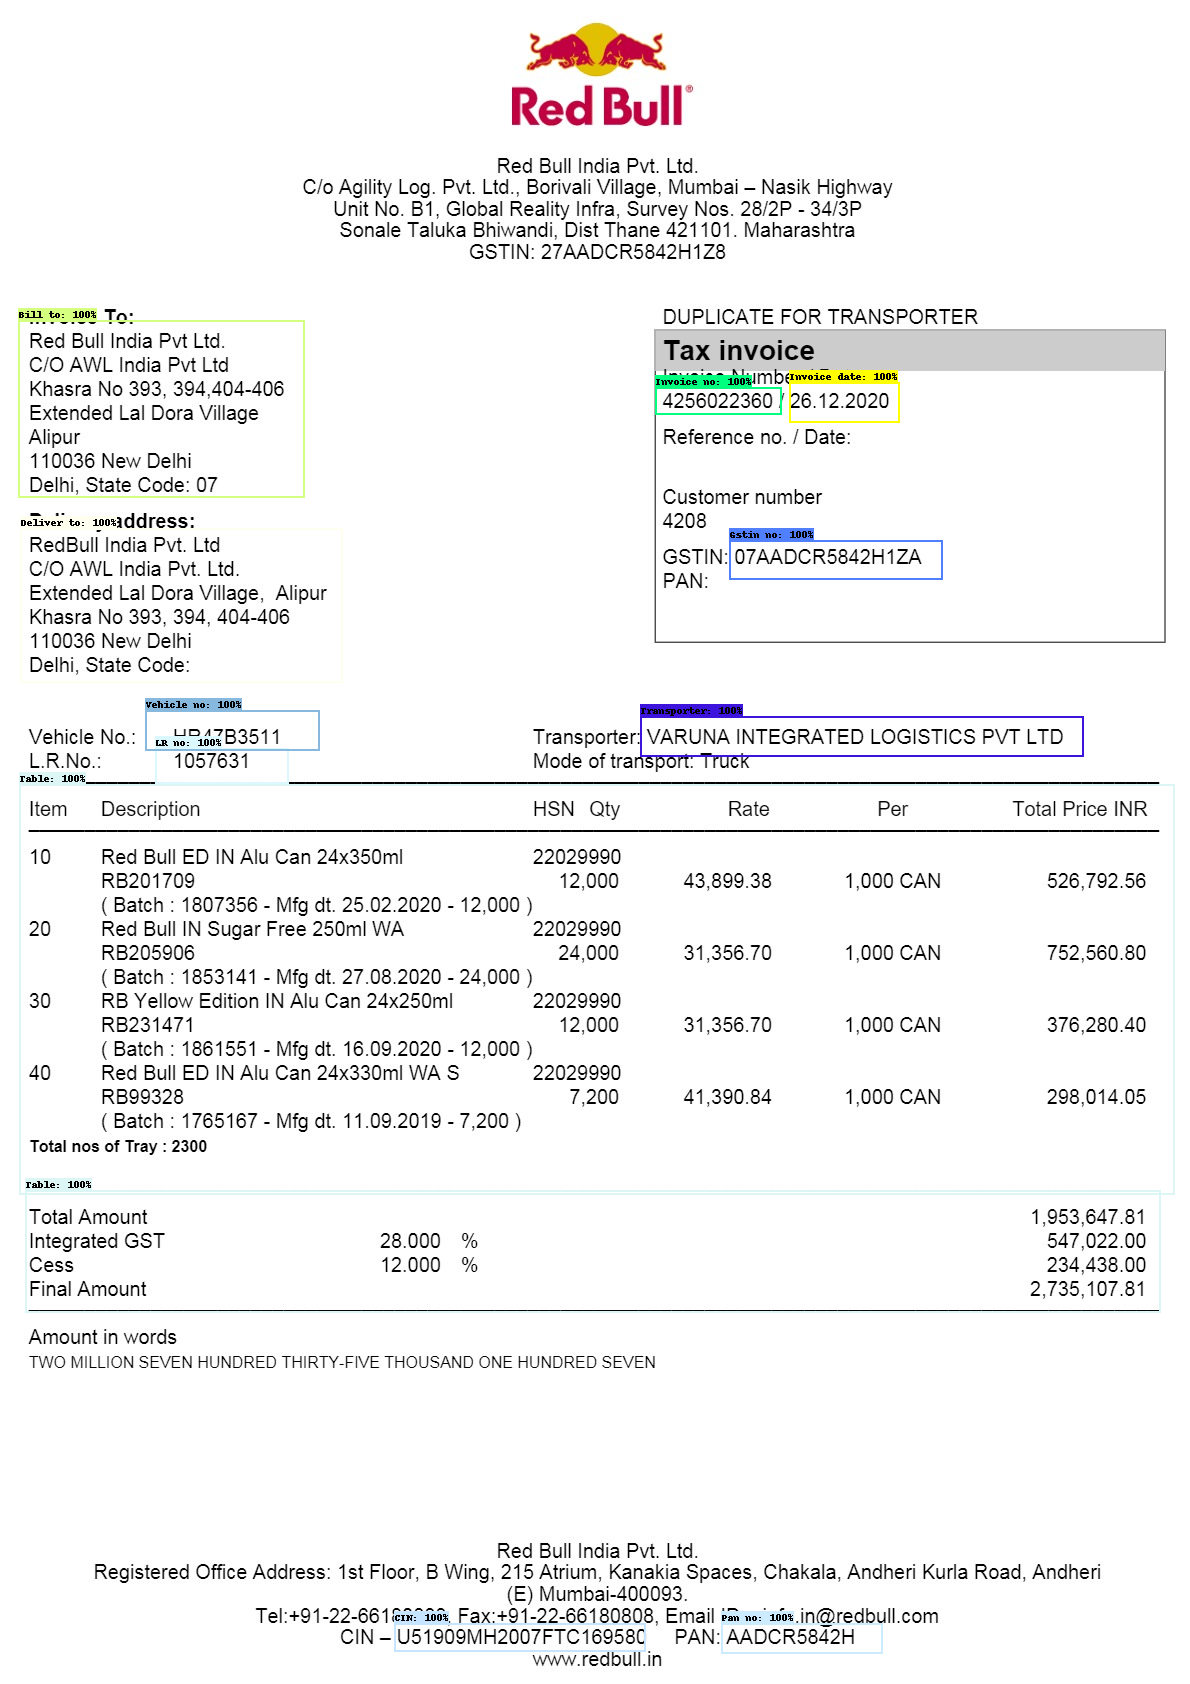

In [7]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import tensorflow as tf
import sys

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'test1.jpg'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 26

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=2,
    min_score_thresh=0.60)

# All the results have been drawn on image. Now display the image.
cv2_imshow(image)

# Press any key to close the image
cv2.waitKey(0)

# Clean up
cv2.destroyAllWindows()

In [8]:
INPUT_FOLDER = "/content/gdrive/MyDrive/tensorflow10/models/research/object_detection/input_images/"
CROPPED_TABLE_FOLDER ="/content/gdrive/MyDrive/tensorflow10/models/research/object_detection/cropped_table_images/"
CROPPED_TABLE_CSV ="/content/gdrive/MyDrive/tensorflow10/models/research/object_detection/cropped_table_csv/"

In [9]:
import cv2

In [10]:
for fl in os.listdir(INPUT_FOLDER):
  print(fl)
  image = cv2.imread(INPUT_FOLDER + fl)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_expanded = np.expand_dims(image_rgb, axis=0)
  (boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})
  
  height=image.shape[0]
  breath=image.shape[1]
  print(breath,height)
  i = 0 
  for box,class_,score in zip(boxes[0],classes[0],scores[0]): 
    if score>0.6:
      if class_==5.0: 

        print(box,class_,score) 
        # print(box[0]*height,box[1]*breath,box[2]*height,box[3]*breath) 
        crop_image = image[int(box[0]*height):int(box[2]*height),int(box[1]*breath):int(box[3]*breath)] 
        cv2.imwrite(CROPPED_TABLE_FOLDER + fl.replace(".jpg","") +"_"+str(i)+".jpg",crop_image)

        # extracted_text=pytesseract.image_to_string(crop_image) 
        # # print(extracted_text)
        # with open(OUTPUT_TEXT + fl.replace(".jpg","") +"_"+str(i)+".txt",'w') as txt_file:
        #           txt_file.write(extracted_text)
        i = i+1

page__8_1ExtractPage1.pdf.jpg
1700 2200
[0.5171639  0.06285772 0.58333755 0.9568325 ] 5.0 0.99999976
[0.3668267  0.05193838 0.48888648 0.9468051 ] 5.0 0.9999969


In [11]:
!nvidia-smi

Tue Jul 12 10:22:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    33W / 250W |   5145MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
!pip install torch==1.10.0+cu111 torchvision==0.11.1+cu111 torchaudio===0.10.0+cu111 -f https://download.pytorch.org/whl/cu111/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html
     |████████████▌                   | 834.1 MB 1.2 MB/s eta 0:17:26tcmalloc: large alloc 1147494400 bytes == 0x3a9f4000 @  0x7f897053e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |███████████████▉                | 1055.7 MB 1.3 MB/s eta 0:13:36tcmalloc: large alloc 1434370048 bytes == 0x7f04a000 @  0x7f897053e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     

In [13]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.10.0+cu111 True


In [14]:
!python -m pip install detectron2 -f \
  https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 1.6 MB/s 
     |████████████████████████████████| 50 kB 3.8 MB/s 
     |████████████████████████████████| 151 kB 14.1 MB/s 
     |████████████████████████████████| 130 kB 56.8 MB/s 
     |████████████████████████████████| 79 kB 9.4 MB/s 
     |████████████████████████████████| 843 kB 71.9 MB/s 
     |████████████████████████████████| 596 kB 60.3 MB/s 
     |████████████████████████████████| 117 kB 65.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=5354b20bd1075ab782004097aec50f9aa00b2b5d30a65b6ebccb94addf1757d3
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.

In [15]:
!python -m detectron2.utils.collect_env

----------------------  ----------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.6 @/usr/local/lib/python3.7/dist-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 11.1
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5, 8.0, 8.6
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.10.0+cu111 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           Yes
GPU 0                   Tesla P100-PCIE-16GB (arch=6.0)
Driver version          460.32.03
CUDA_HOME               /usr/local/cuda
Pillow                  7.1.2
torchvision             0.11.1+cu111 @/usr/local/lib/python3.7/dist-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5, 8.0, 8.6
fvcore                  0.1.5.post20220512
iopath                  0.1.9
cv2   

In [16]:
# !git clone https://github.com/nikhilsingh291/Multi-Type-TD-TSR.git
!git clone https://github.com/nikhilsingh291/multi-layout-table-extraction.git
!mv multi-layout-table-extraction multi_layout_table_extraction

Cloning into 'multi-layout-table-extraction'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 69 (delta 14), reused 66 (delta 14), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [17]:
!pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14951 sha256=718e9e7d49fee4a8ef68055213d92a8a6d842b8599b91a12e53e6b515824706f
  Stored in directory: /root/.cache/pip/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [18]:
!gdown --id 11FgFTy0MyVUMGd00T_InEDaarB4qAlP8

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=11FgFTy0MyVUMGd00T_InEDaarB4qAlP8
To: /content/gdrive/My Drive/tensorflow10/models/research/object_detection/model_final.pth
100% 1.10G/1.10G [00:16<00:00, 64.9MB/s]


In [19]:
!sudo apt install tesseract-ocr 
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 62 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,532 kB/s)
debconf: unable to initi

In [20]:
!tesseract --version
!pip install --upgrade Pillow

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!pip install pyyaml==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 8.1 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=93b9d34d96776e31e5286e1ac3c7e50fa2235ecae40ffd62a9c5e18455937c07
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [23]:
import detectron2
import multi_layout_table_extraction.google_colab.deskew as deskew
import multi_layout_table_extraction.google_colab.table_detection as table_detection
import multi_layout_table_extraction.google_colab.table_structure_recognition_all as tsra
import multi_layout_table_extraction.google_colab.table_structure_recognition_lines as tsrl
import multi_layout_table_extraction.google_colab.table_structure_recognition_wol as tsrwol
import multi_layout_table_extraction.google_colab.table_structure_recognition_lines_wol as tsrlwol
import multi_layout_table_extraction.google_colab.table_xml as txml
import multi_layout_table_extraction.google_colab.table_ocr as tocr
import pandas as pd
import os
import json
import itertools
import random
from detectron2.utils.logger import setup_logger
# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog, MetadataCatalog
from google.colab.patches import cv2_imshow
setup_logger()

<Logger detectron2 (DEBUG)>

In [24]:
#create detectron config
cfg = get_cfg()

#set yaml
cfg.merge_from_file('./multi_layout_table_extraction/All_X152.yaml')

#set model weights
cfg.MODEL.WEIGHTS = './model_final.pth' # Set path model .pth

predictor = DefaultPredictor(cfg) 

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [25]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract as tess
import pytesseract

def output_to_csv (finalboxes, img):
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    testx = 0
    # from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
    outer = []
    for i in range(len(finalboxes)):
        for j in range(len(finalboxes[i])):
            inner = ''
            if (len(finalboxes[i][j]) == 0):
                outer.append(' ')
            else:
                for k in range(len(finalboxes[i][j])):
                    y, x, w, h = finalboxes[i][j][k][0], finalboxes[i][j][k][1], finalboxes[i][j][k][2], \
                                finalboxes[i][j][k][3]

                    finalimg = img[x:x + h, y:y + w]
                    print('yo')
                    
                    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                    # border = cv2.copyMakeBorder(finalimg, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=[255, 255])
                    resizing = cv2.resize(finalimg, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                    
                    dilation = cv2.dilate(resizing, kernel, iterations=1)
                    erosion = cv2.erode(dilation, kernel, iterations=2)
                    # cv2.imwrite("/content/multi_layout_table_extraction/images/ssd"+str(i)+str(j)+str(k)+".jpg", erosion)

                    if(erosion.sum() != erosion.shape[0]*erosion.shape[1]*255):
                      out = pytesseract.image_to_string(erosion, config='')
                    else:
                        out = ""
                    # print(out)
                    if(out == ""):

                        out = pytesseract.image_to_string(erosion, config='--psm 7')
                        if(len(out[:-2]) >1):
                            out = ""

                    inner = inner + " " + out[:-2]
                outer.append(inner)

    # Creating a dataframe of the generated OCR list
    arr = np.array(outer)
    dataframe = pd.DataFrame(arr.reshape(len(finalboxes), len(finalboxes[0])))
    print(dataframe)
    return dataframe
    # data = dataframe.style.set_properties(align="left")
    # # Converting dataframe into an excel-file
    # data.to_excel("output.xlsx")

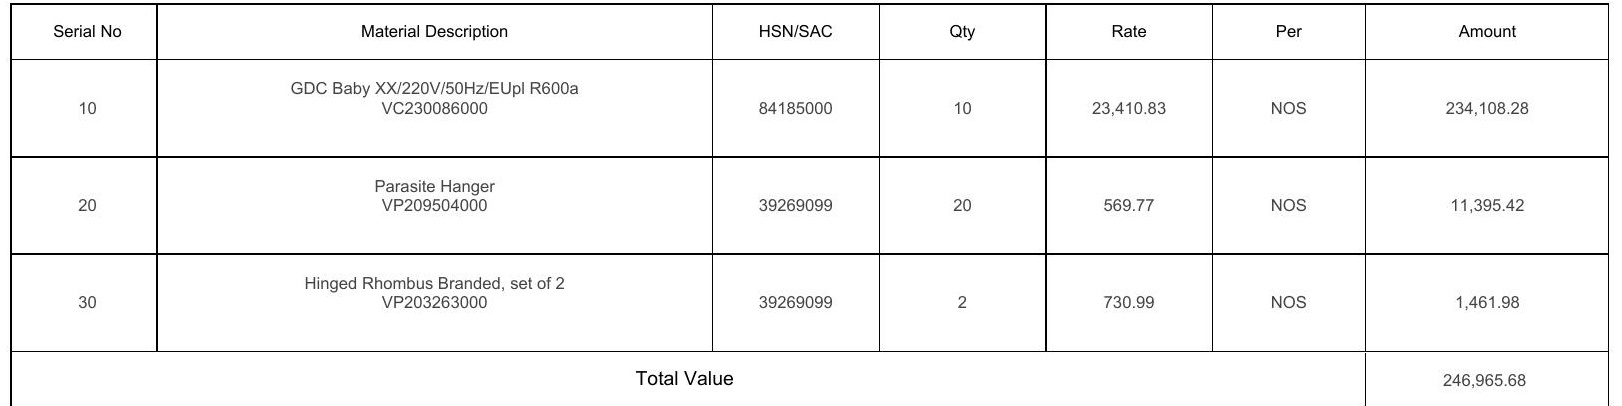

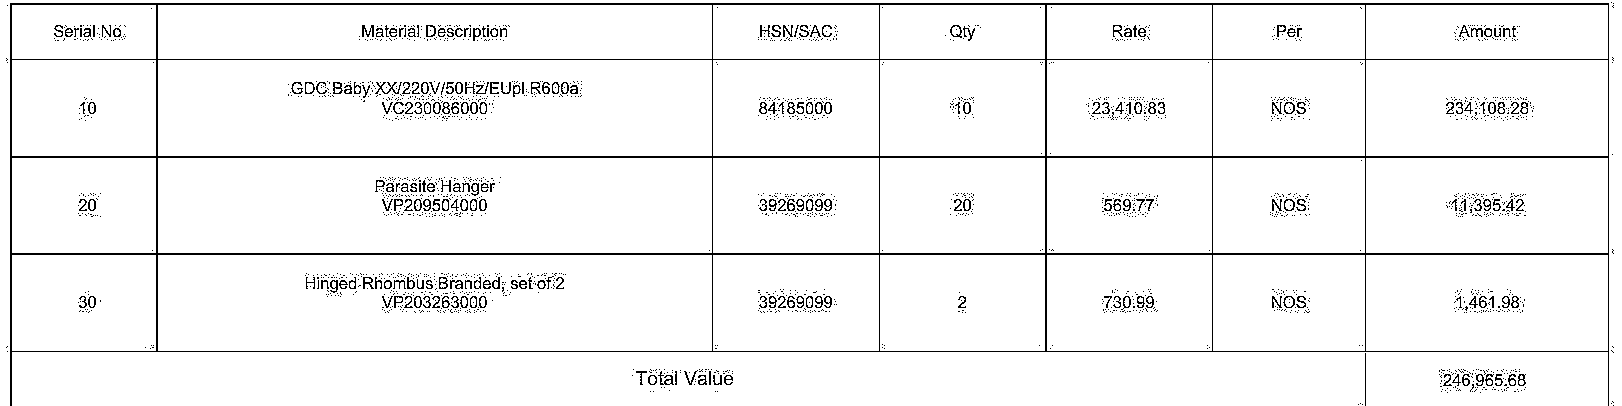

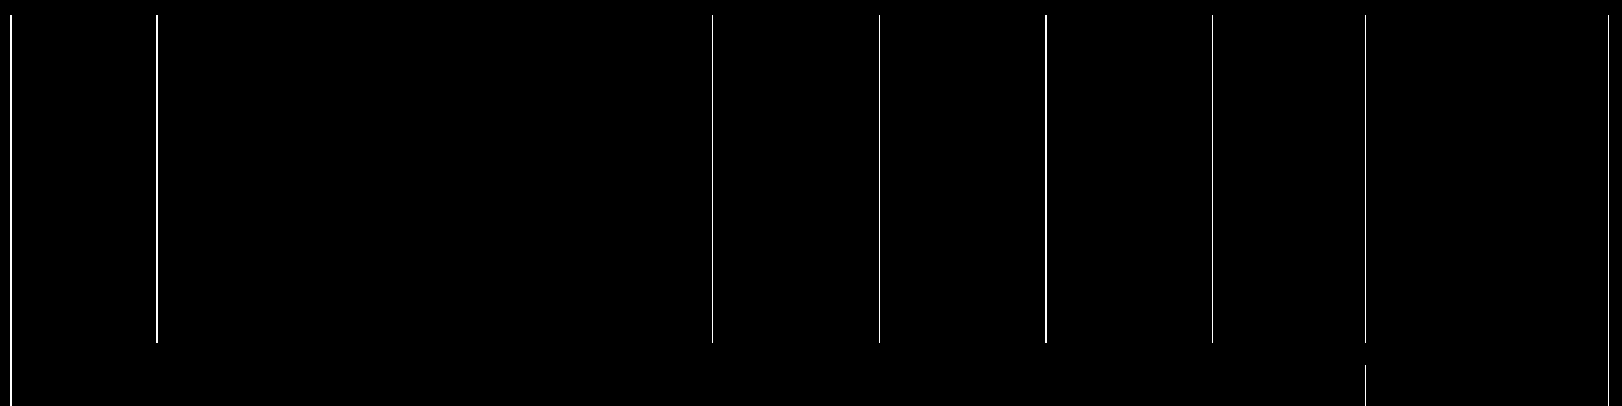

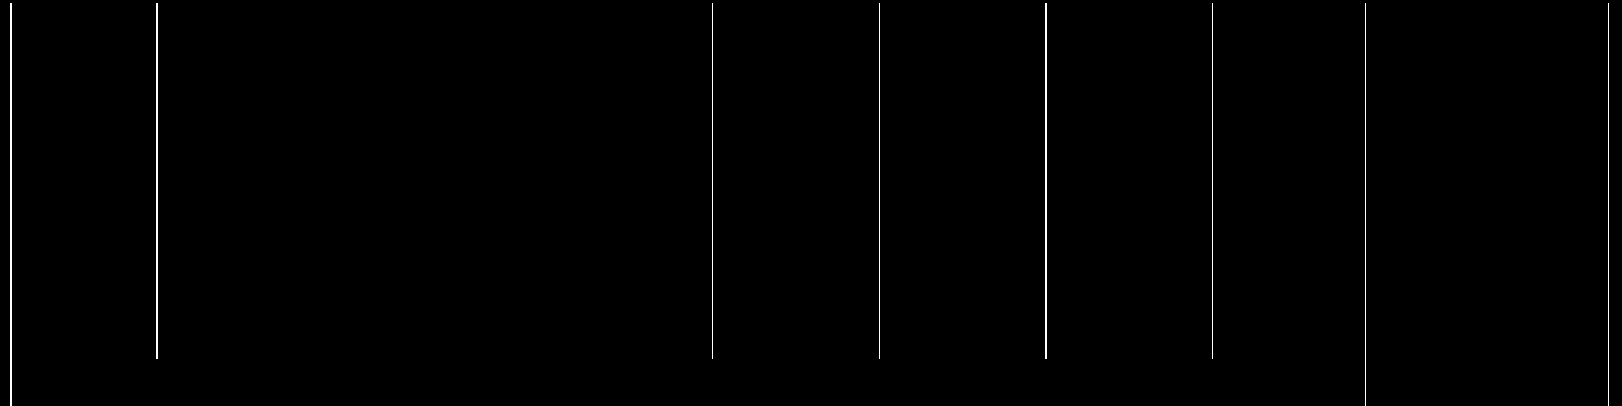

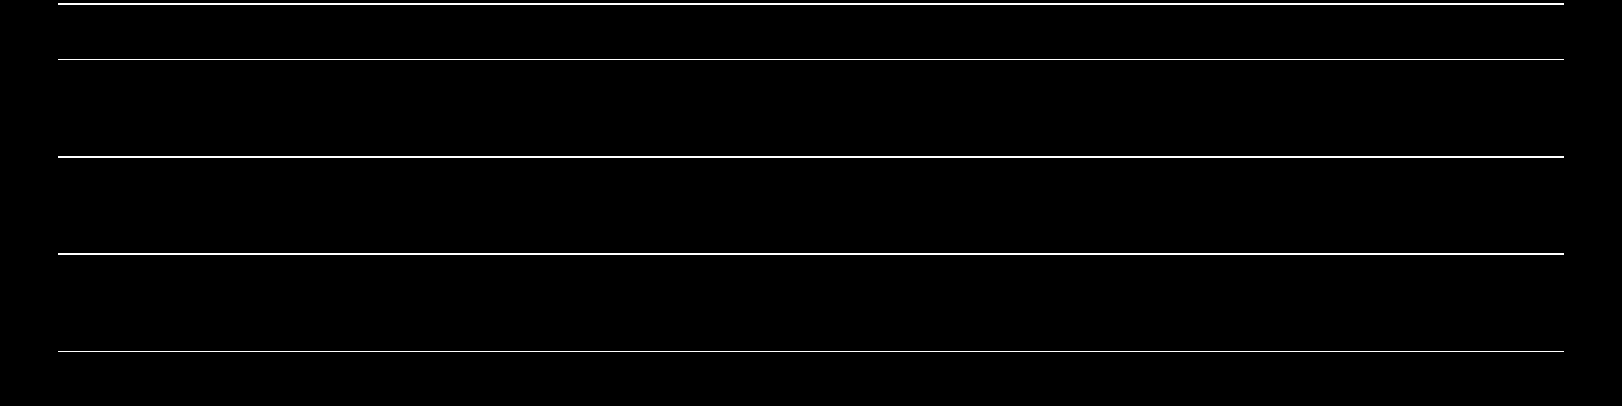

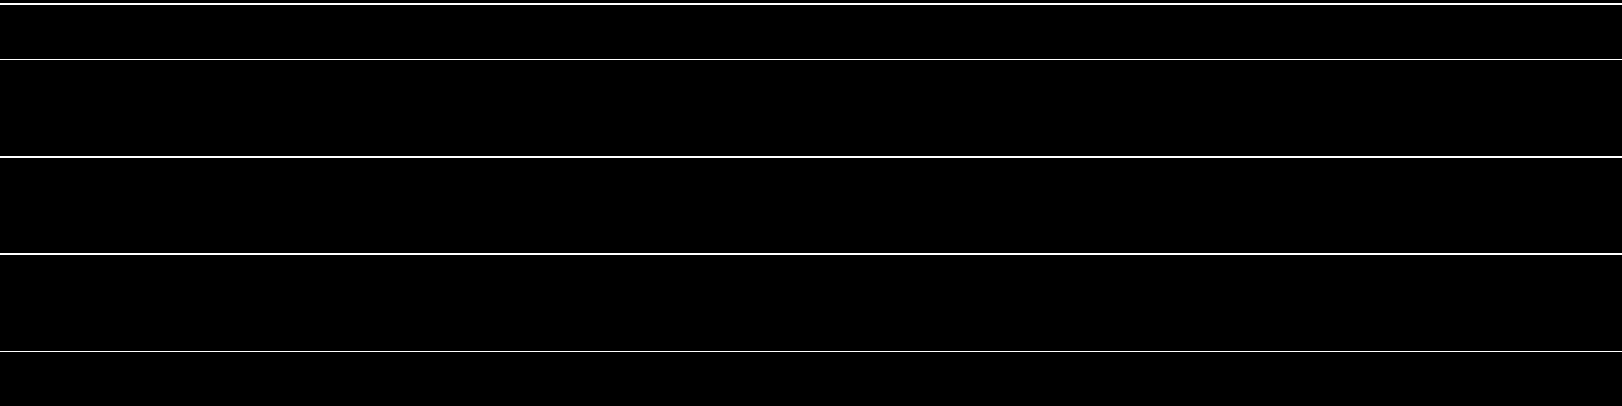

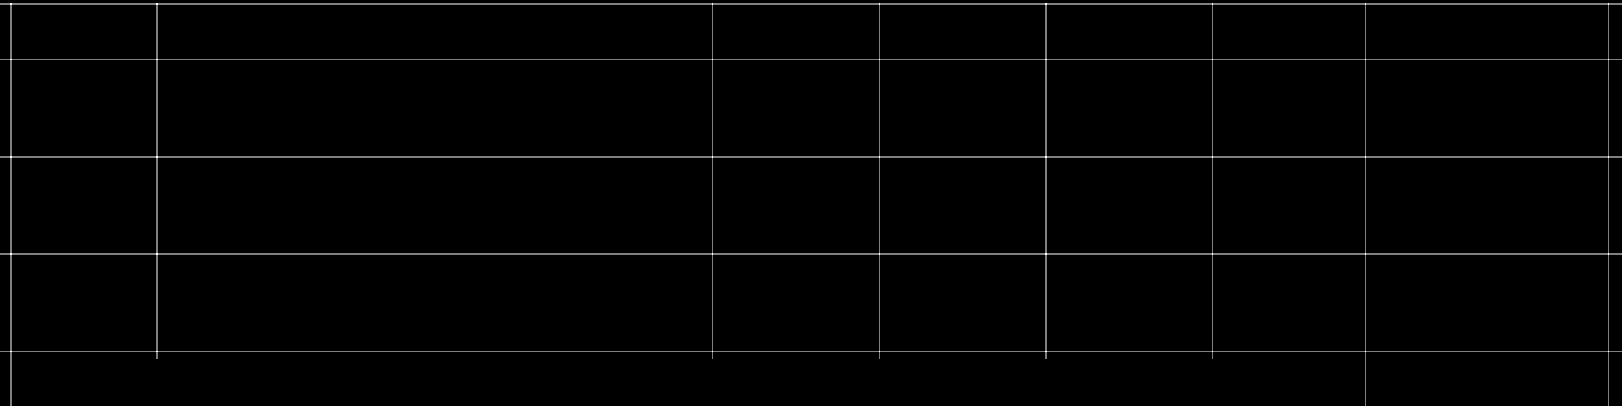

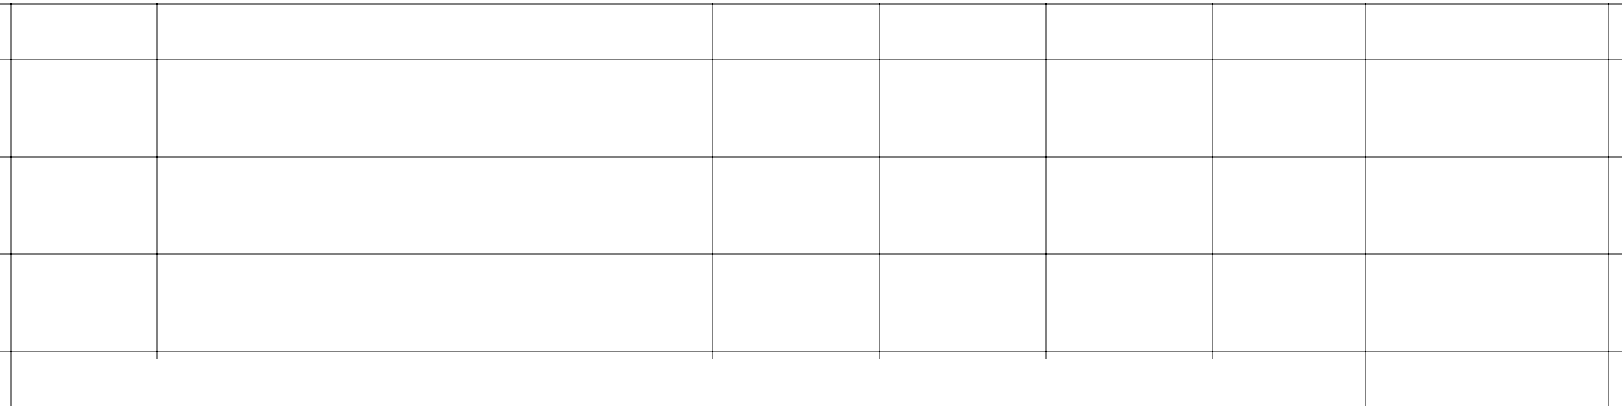

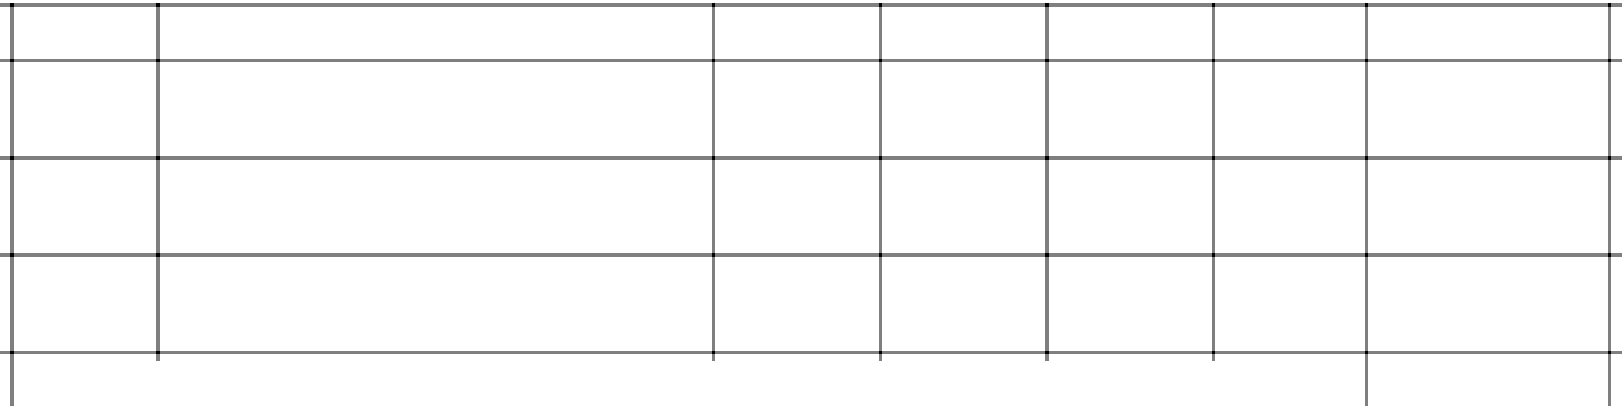

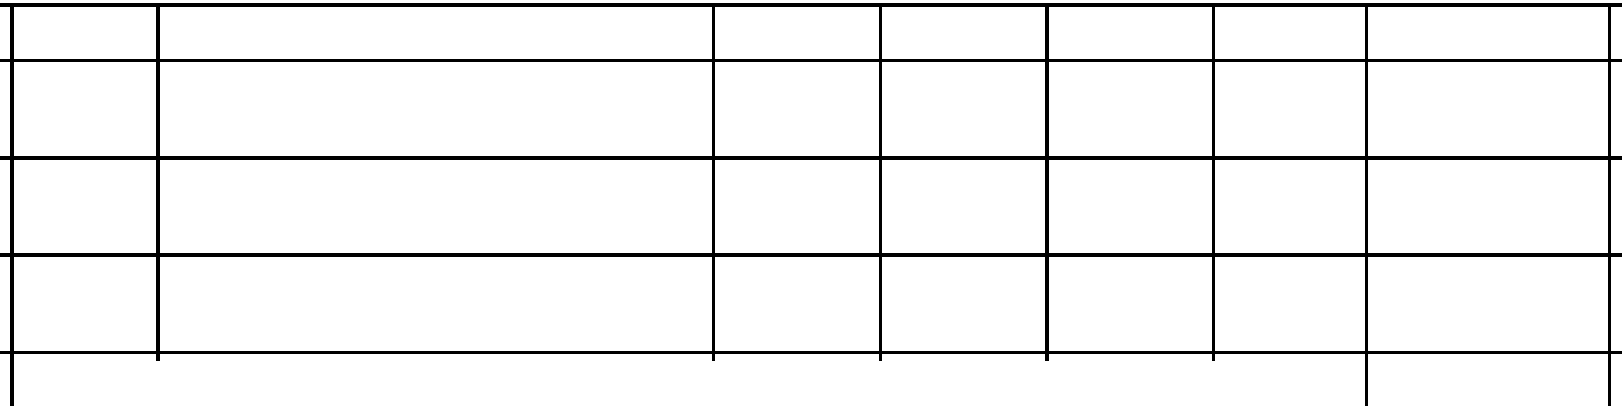

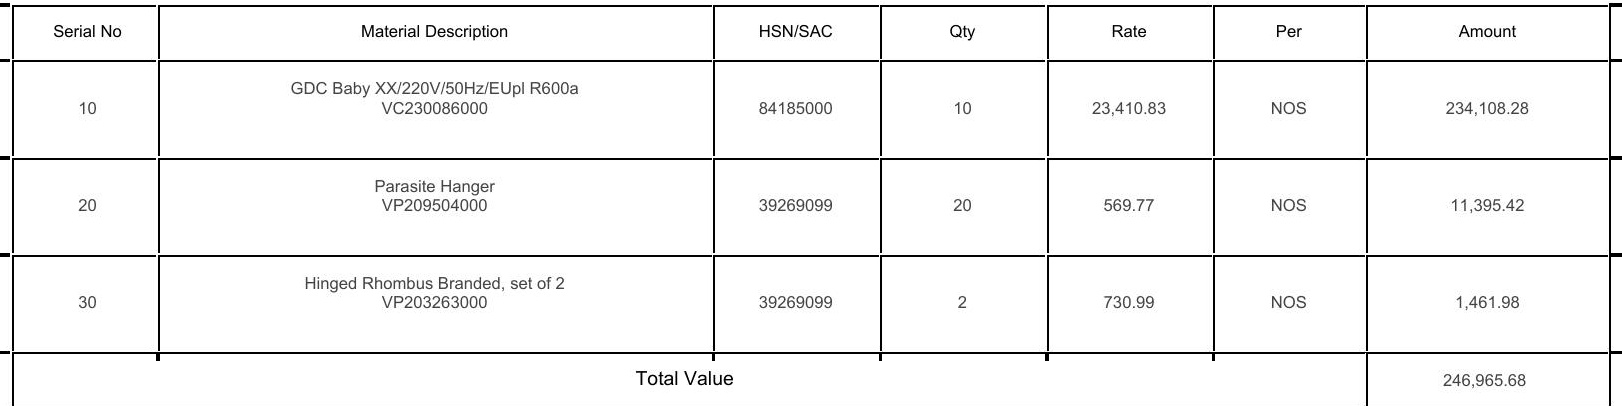

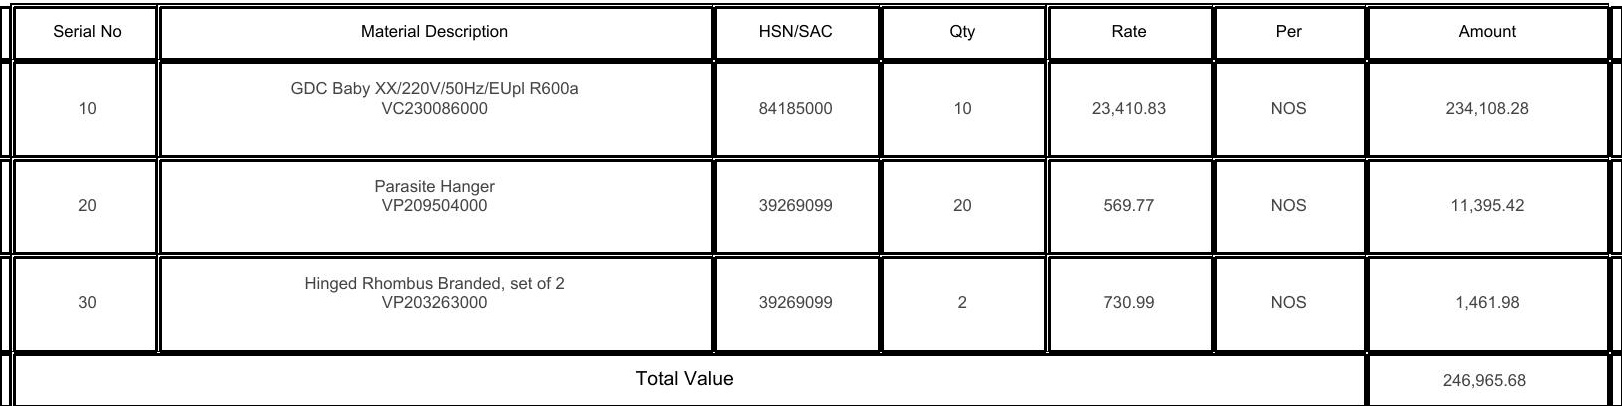

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
    0           1                                               2          3  \
0       Serial No                            Material Description    HSN/SAC   
1              10   GDC Baby XX/220V/50Hz/EUpI R600a\nVC230086000   84185000   
2              20                    Parasite Hanger\nVP209504000   39269099   
3              30   Hinged Rhombus Branded, set of 2\nVP203263000   39269099   
4                                                     Total Value              

      4           5     6            7  8  
0   Qty        Rate   Per       Amount     
1    10   23,410.83   NOS   234,108.28     
2    20      569.77   NOS    11,395.42     
3            730.99   NOS     1,461.98     
4                           246,965.68     


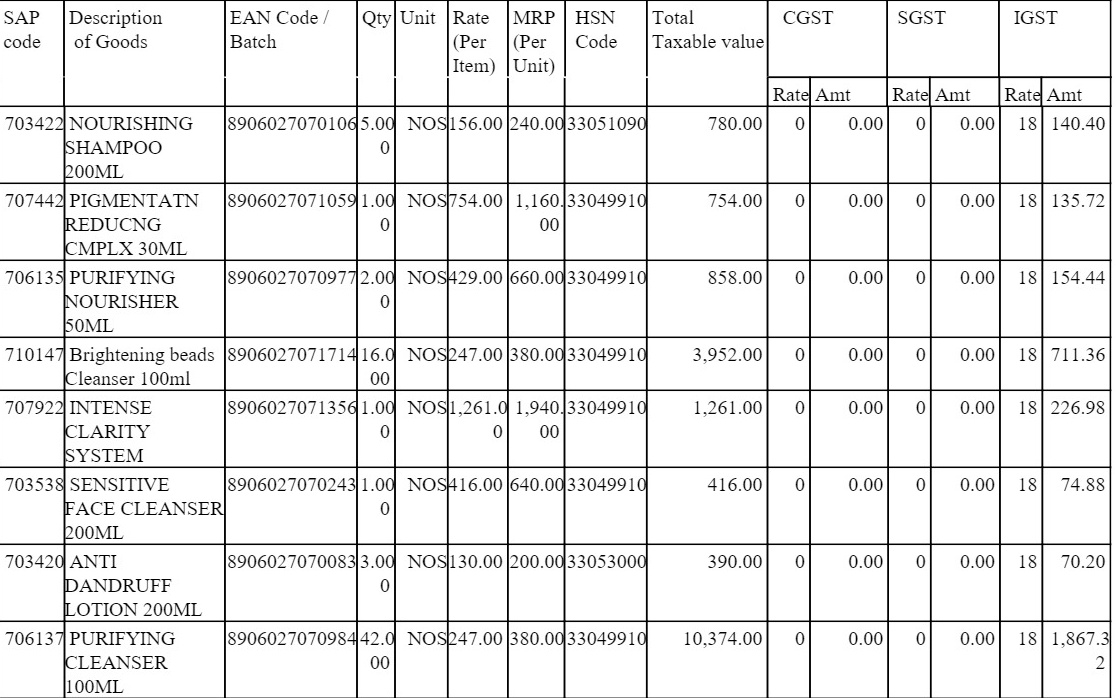

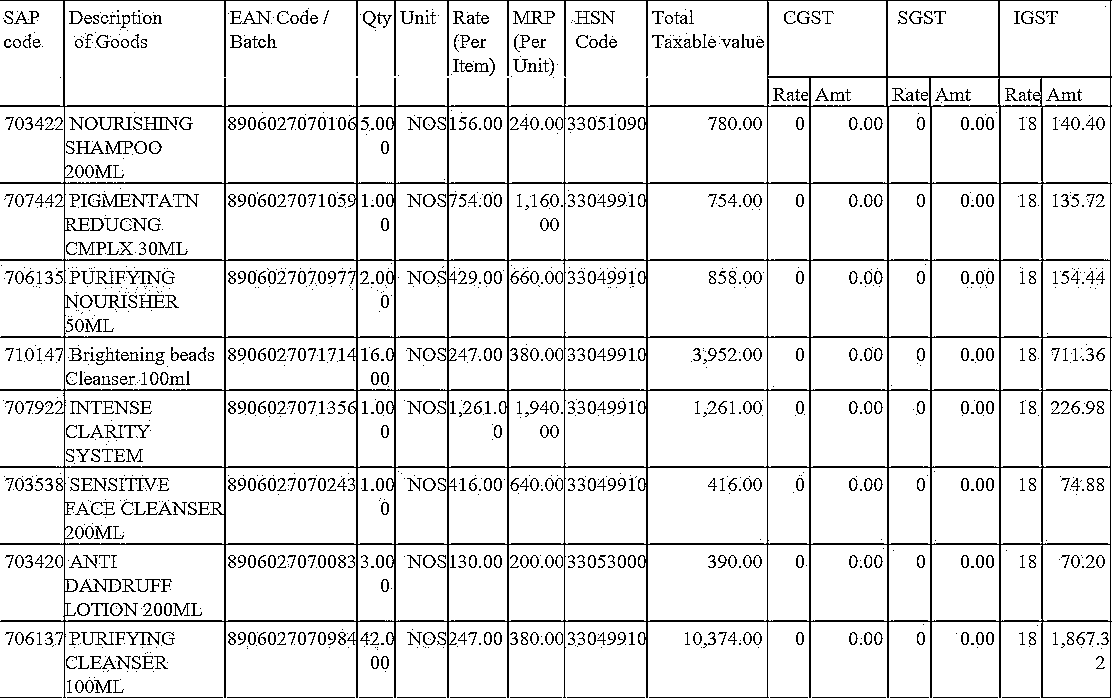

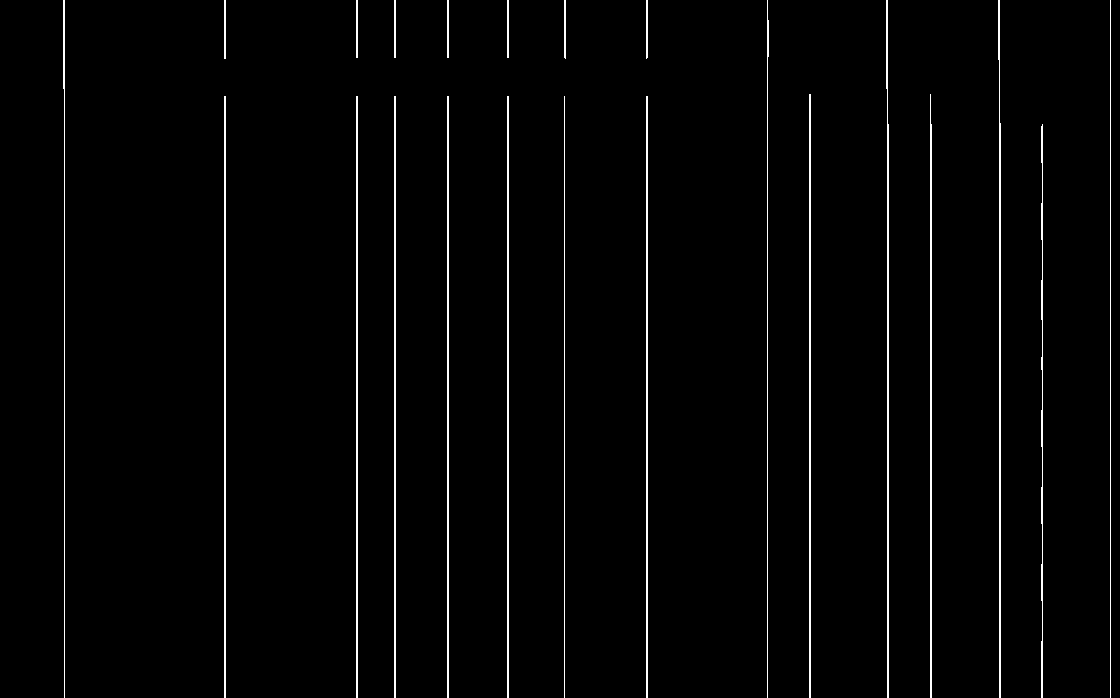

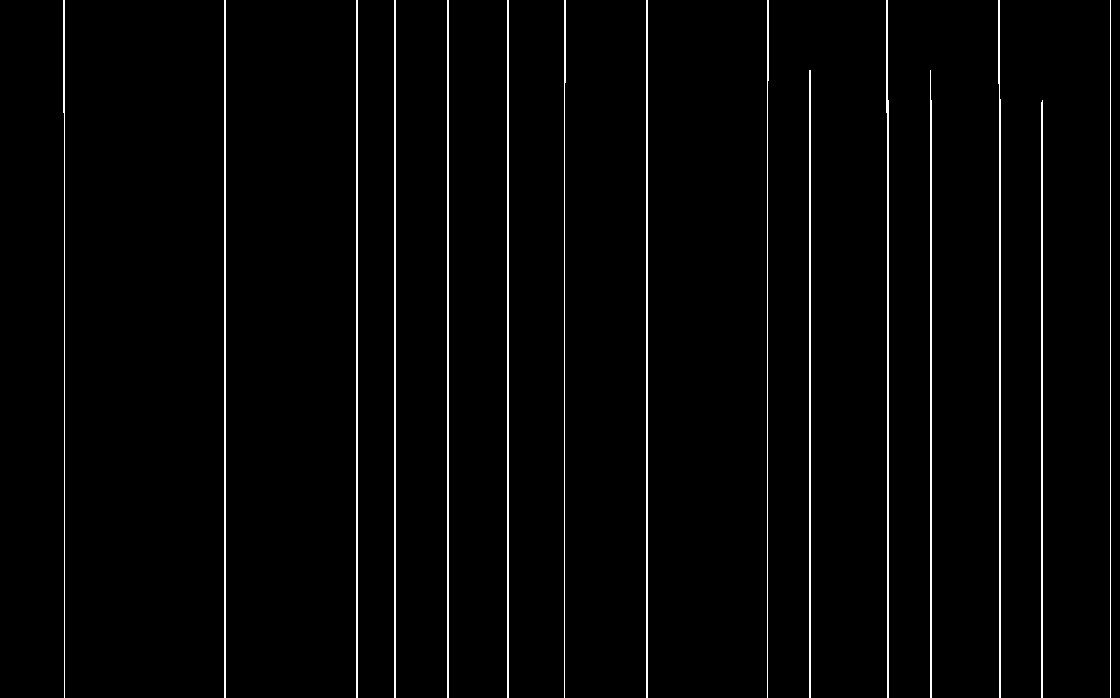

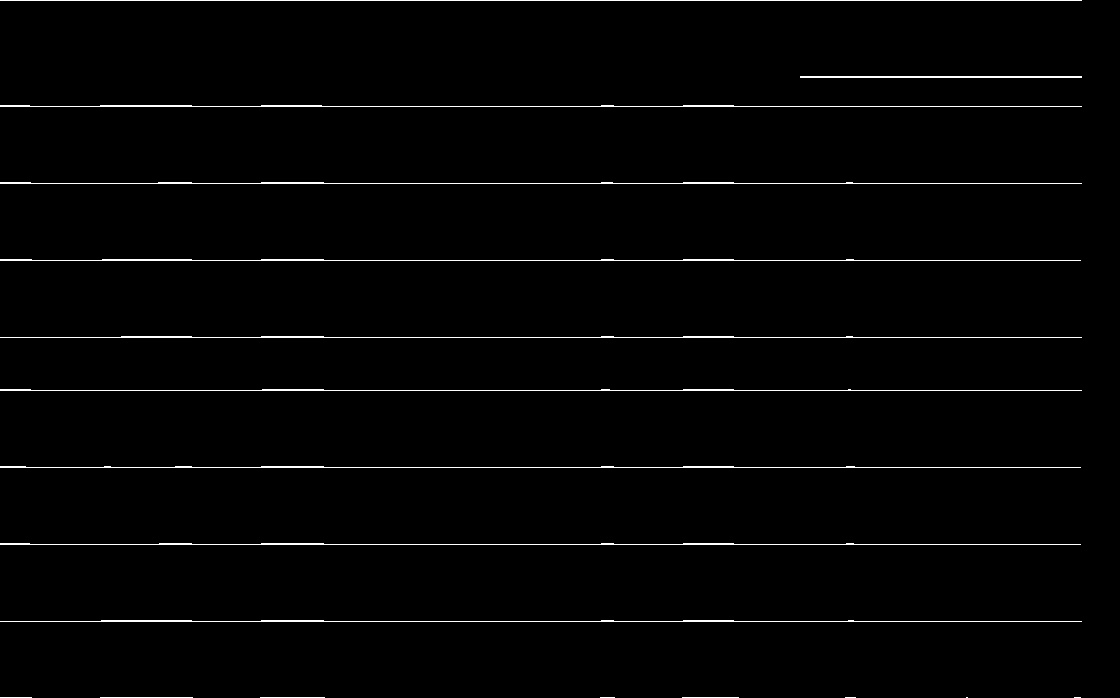

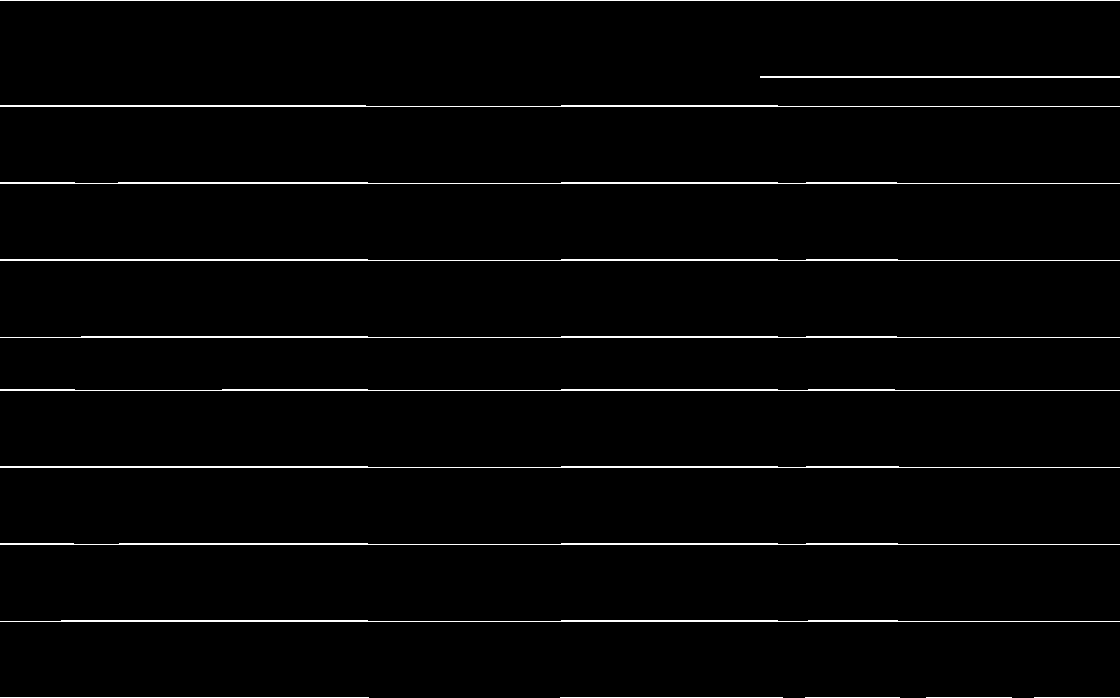

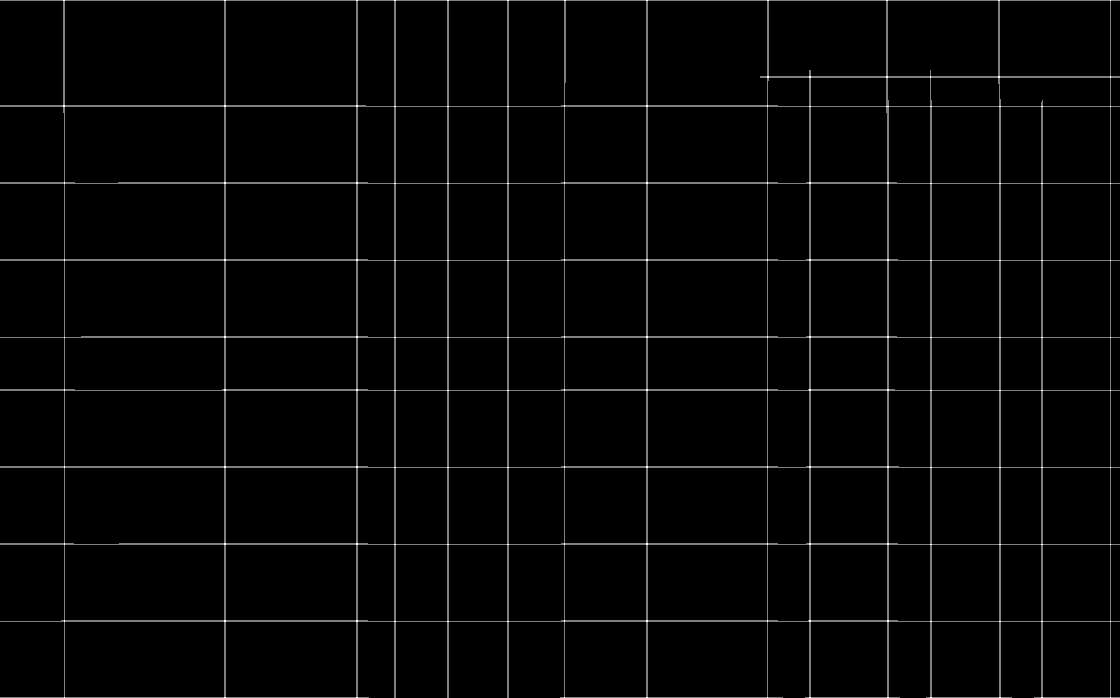

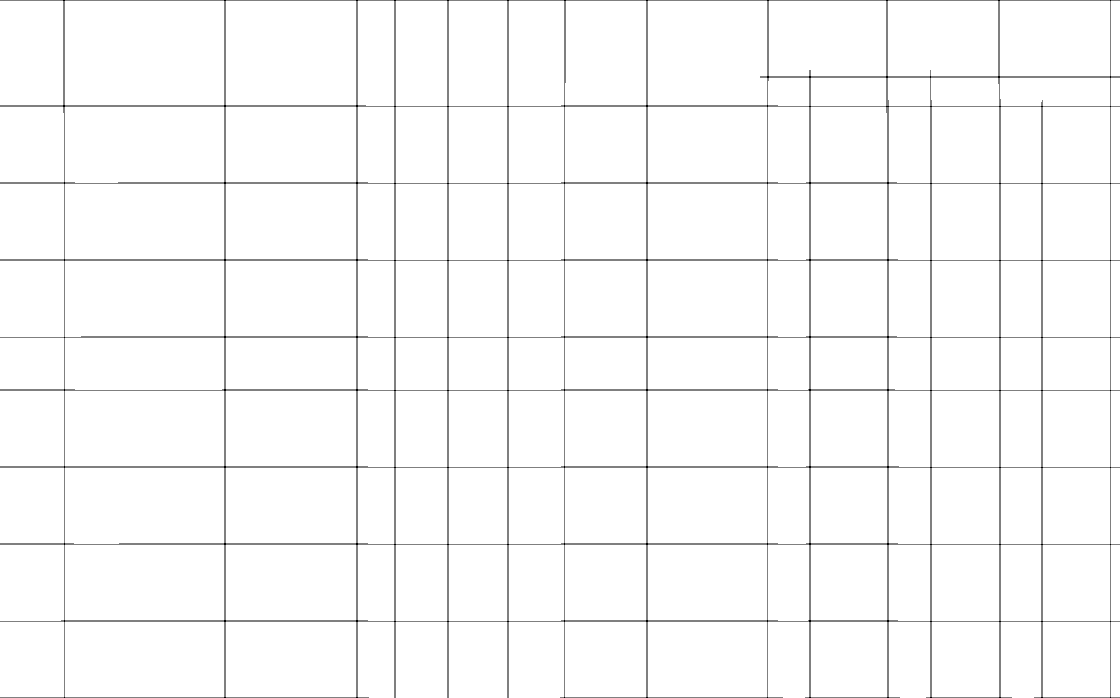

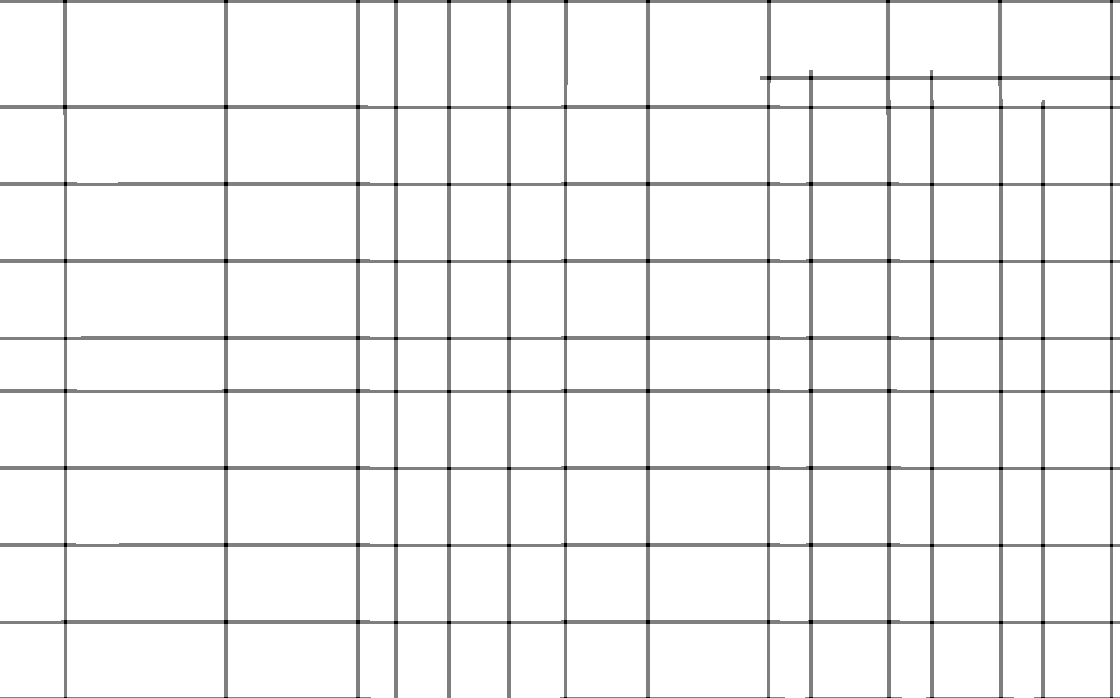

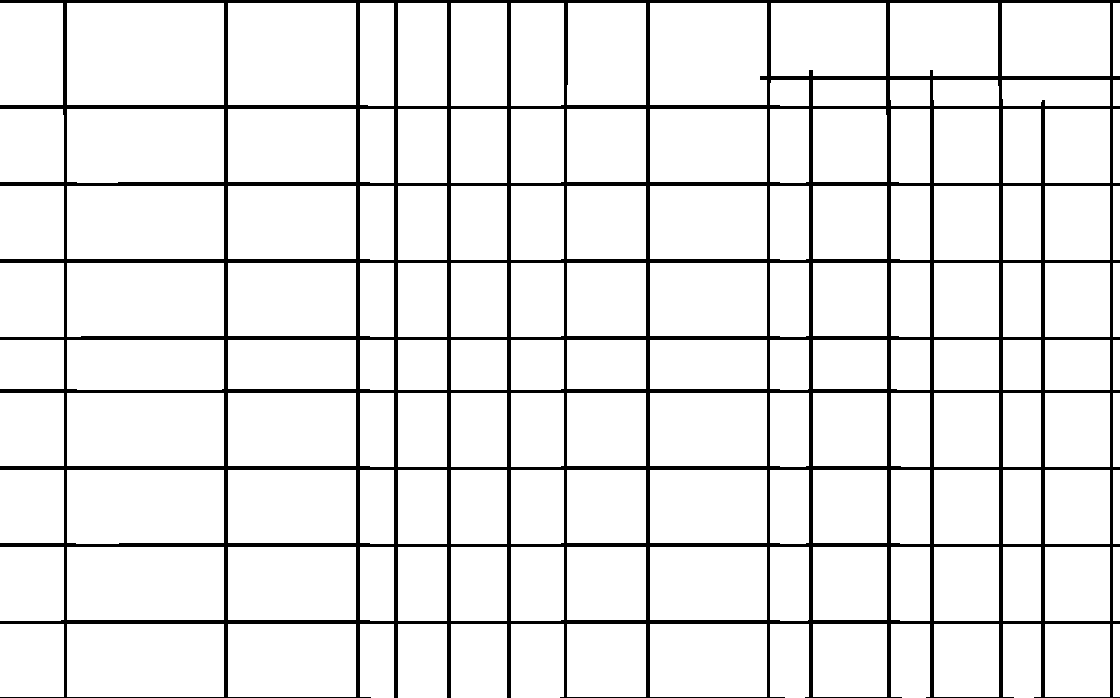

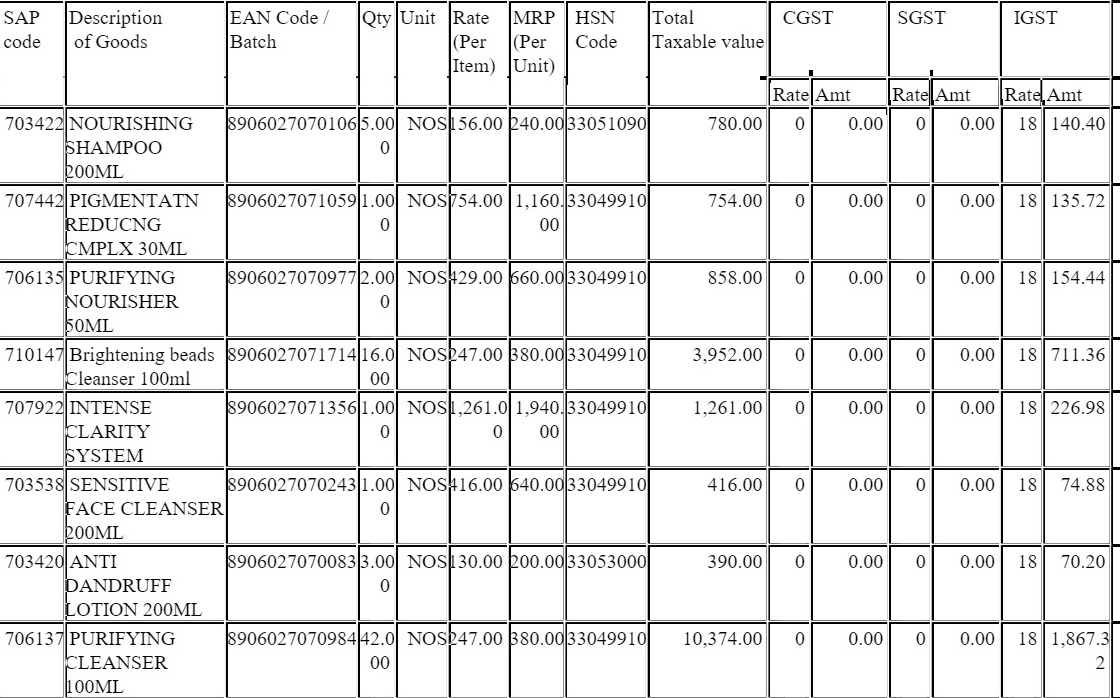

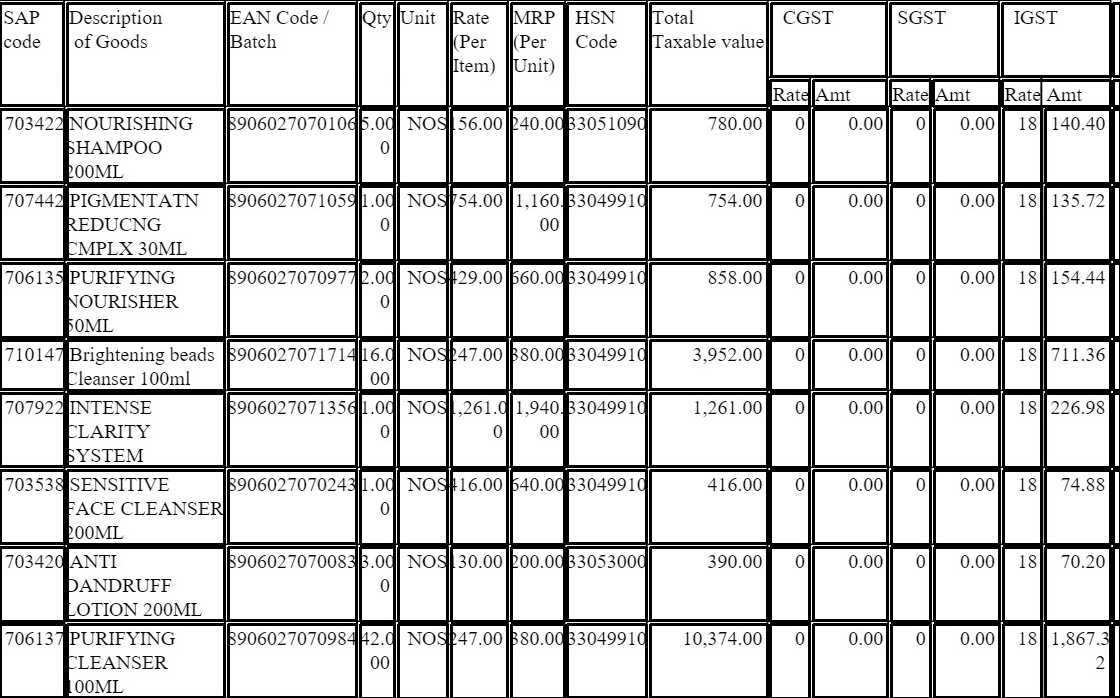

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
        0                                   1                   2          3   \
0     code               Description\nof Goods   EAN Code /\nBatch        Qty   
1    70342          NOURISHING\nSHAMPOO\n200ML       8906027070106              
2   70744:     PIGMENTATN\nREDUCNG\nCMPLX 30ML       8906027071059       1.00   
3    70613          PURIFYING\nNOURISHER\nSOML       8906027070977       2.00   
4       ae   Brightening beads\nCleanser 100ml       8906027071714       16.0   
5    70792            IN

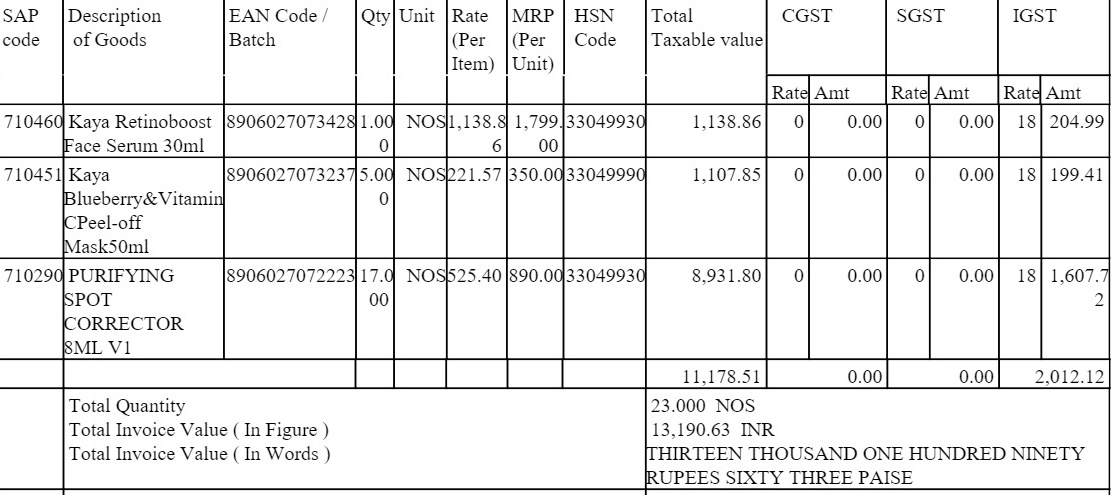

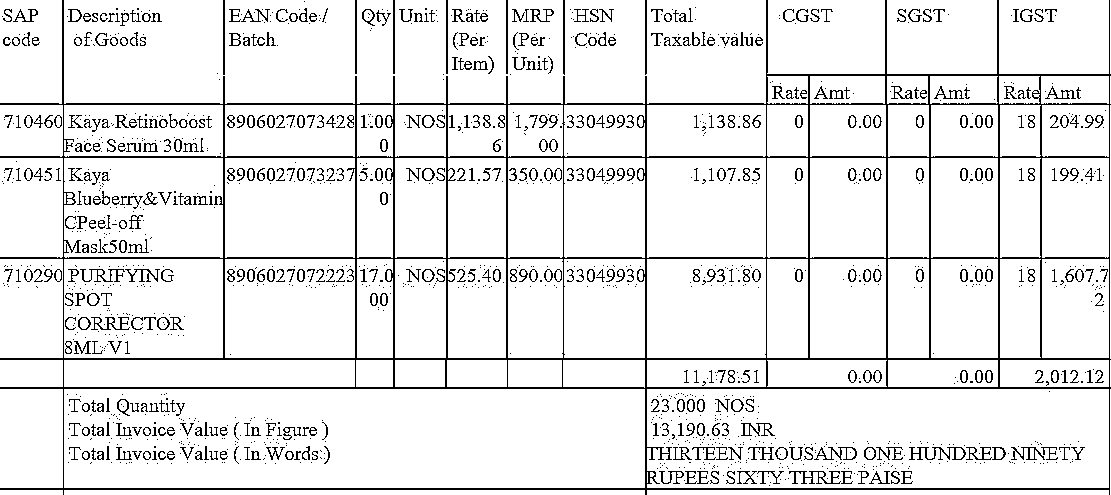

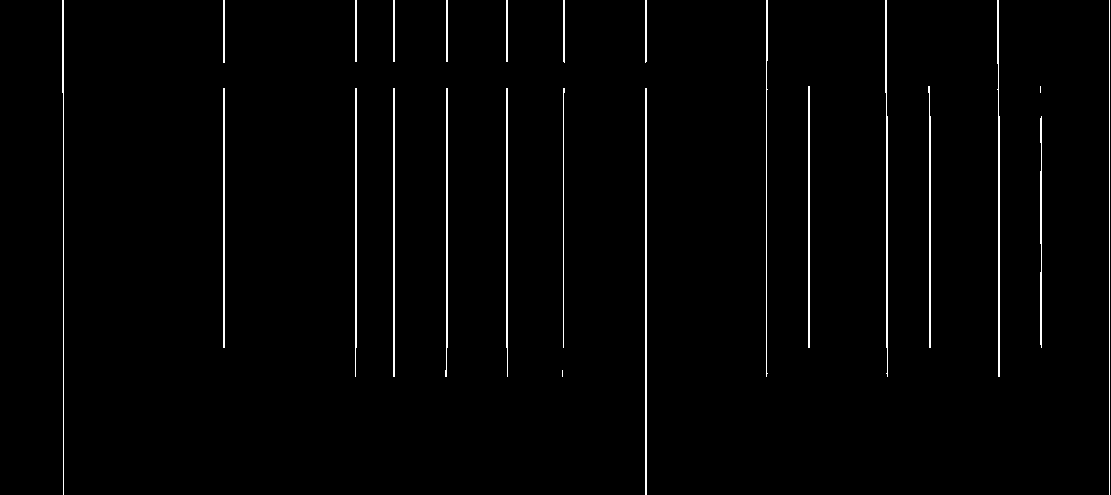

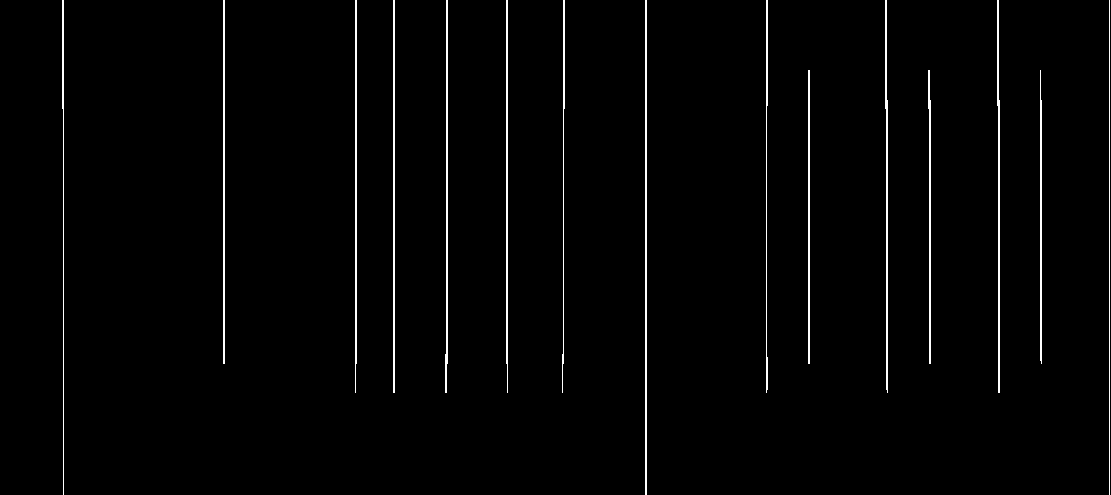

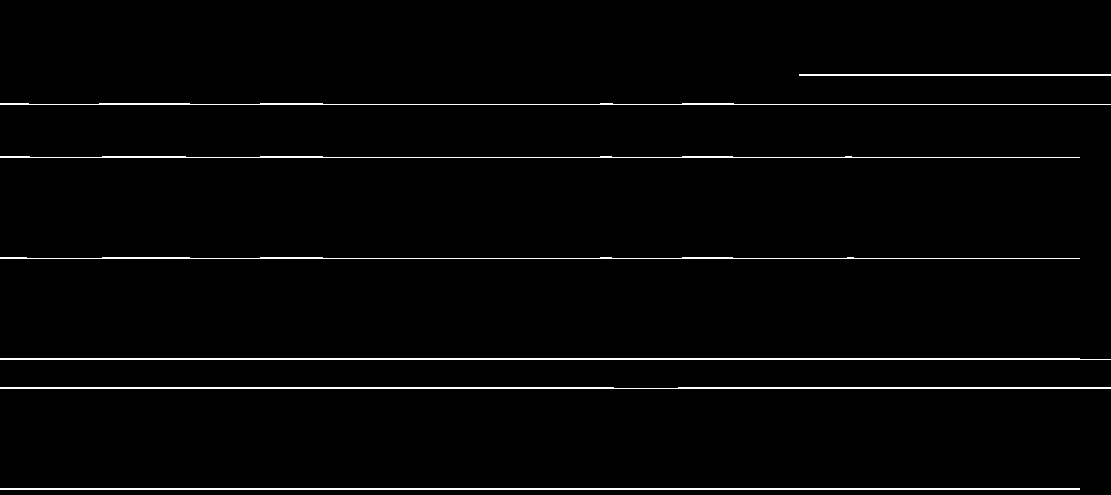

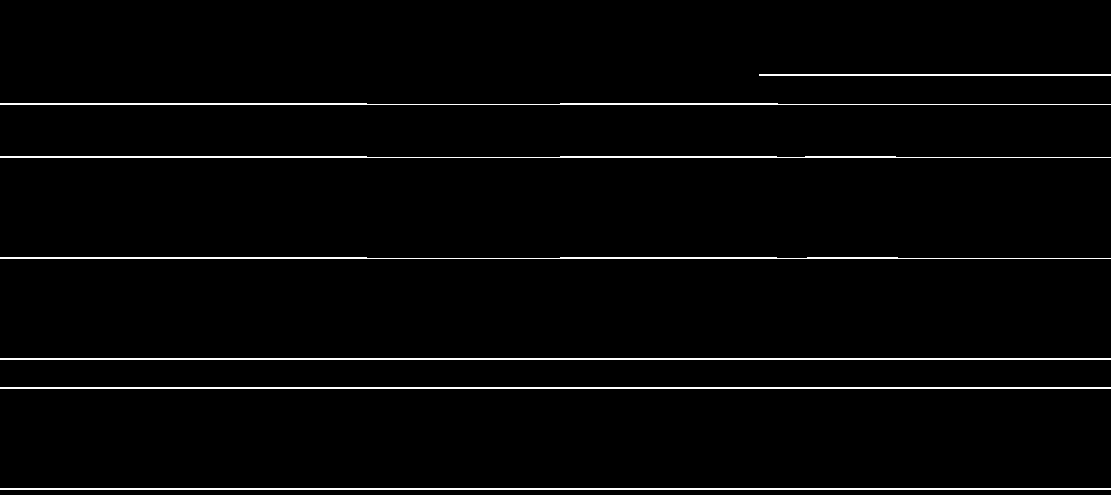

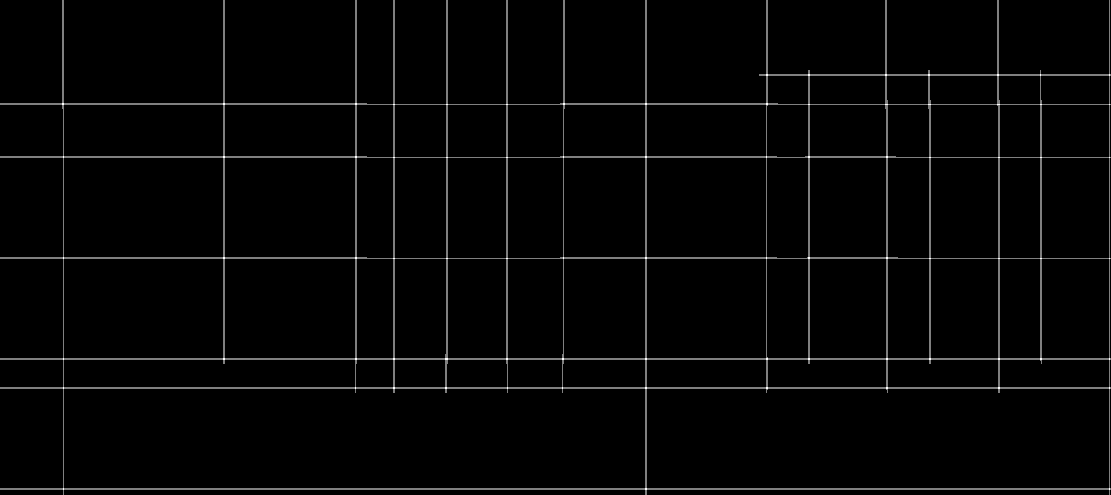

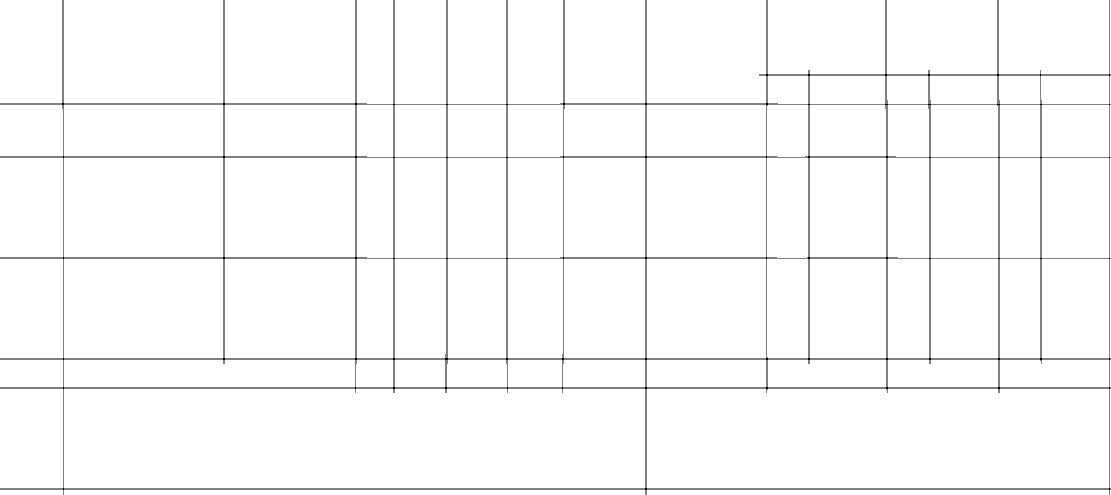

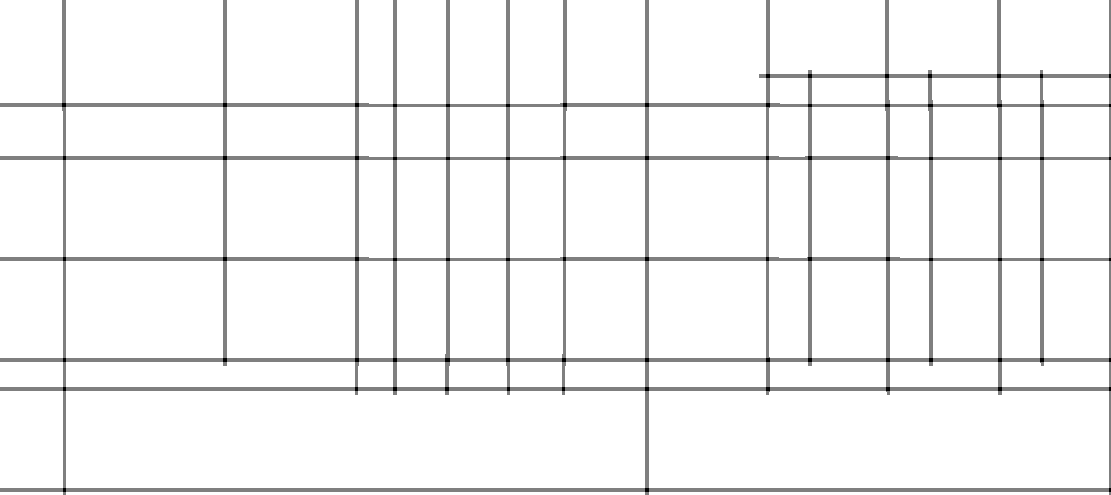

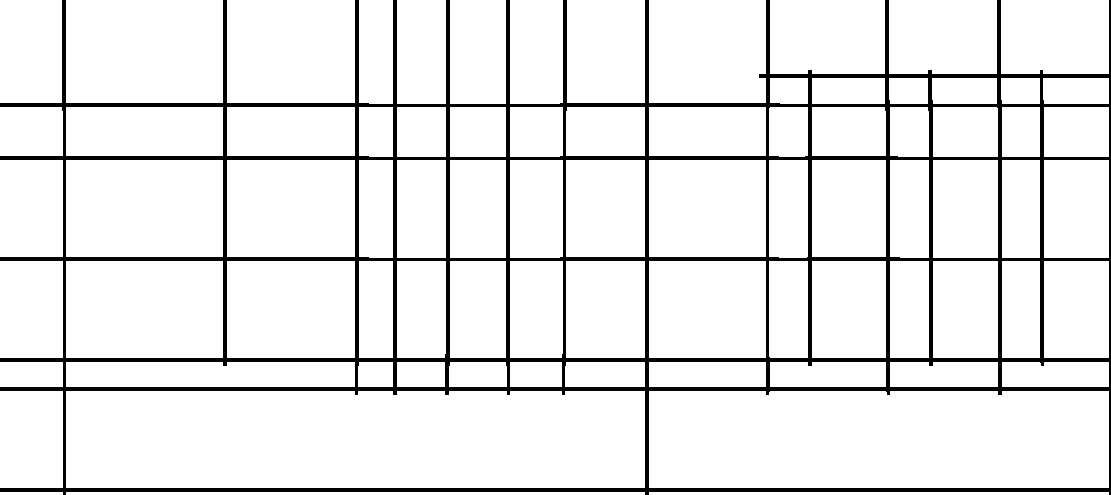

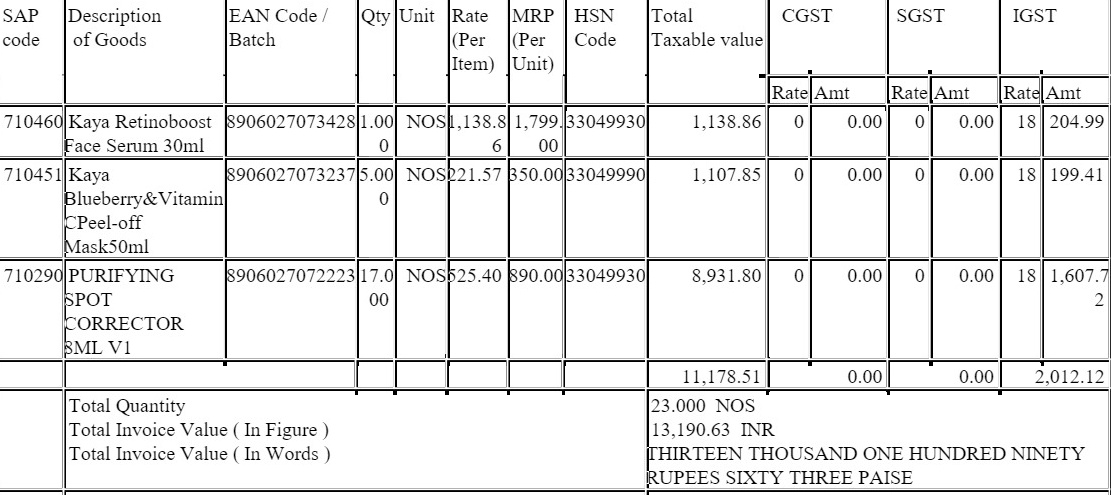

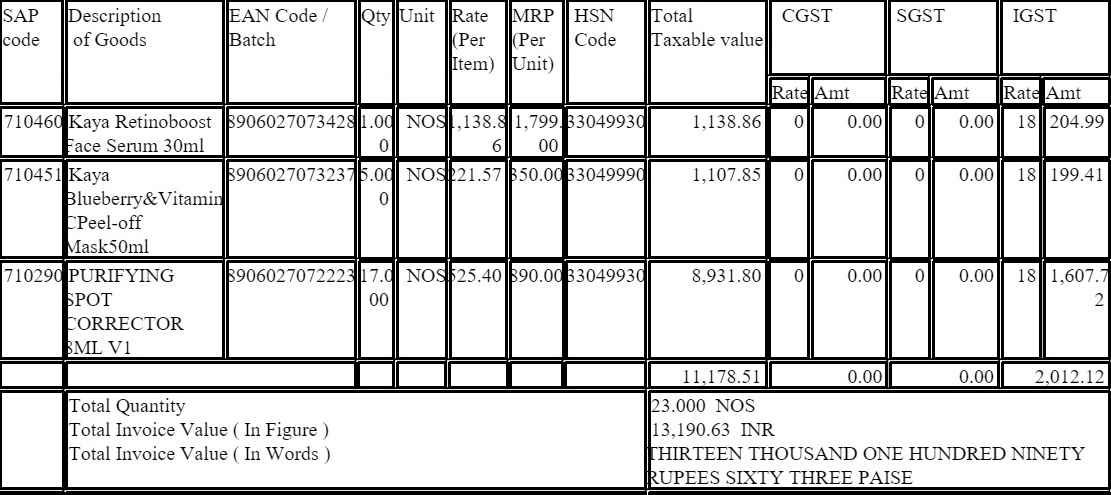

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
        0                                                  1   \
0     code                              Description\nof Goods   
1      uae                  Kaya Retinoboost\nFace Serum 30ml   
2   710451      Kaya\nBlueberry& Vitamin\nCPeel-off\nMask50ml   
3    71029                 PURIFYING\nSPOT\nCORRECTOR\nSML V1   
4             Total Quantity\nTotal Invoice Value ( In Fig...   
5                                                               

                   2          3        4                   5             6   \
0   EAN Code /\nBatch        Qty     Unit   Rate\n(Per\nItem)   (Per\nUnit)   
1       8906027073428                 NOS        1,138.8\n\n     1,799,\n00   
2       8906027073

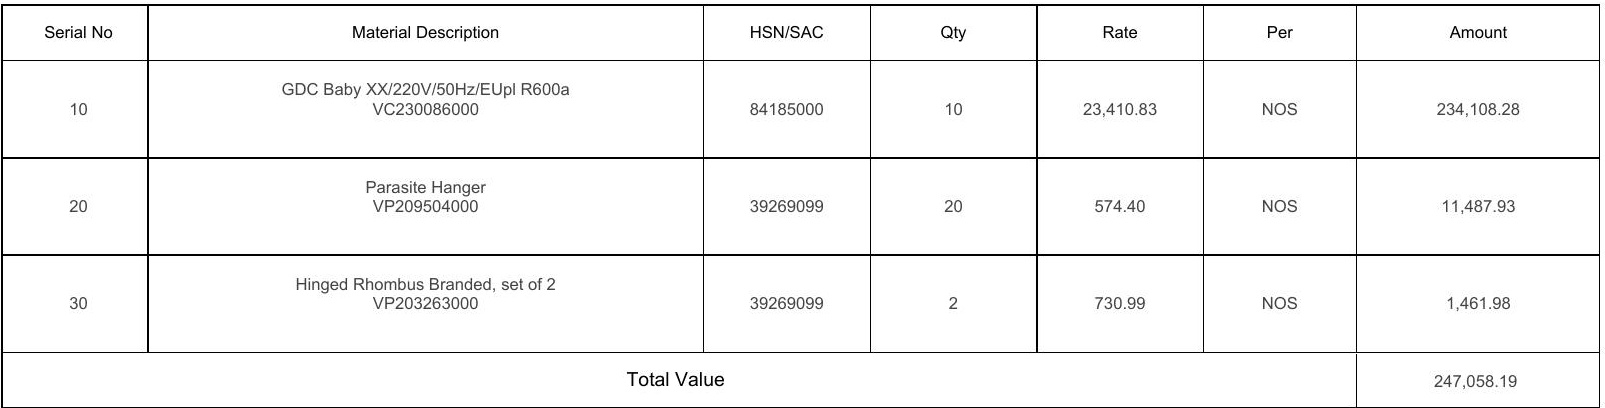

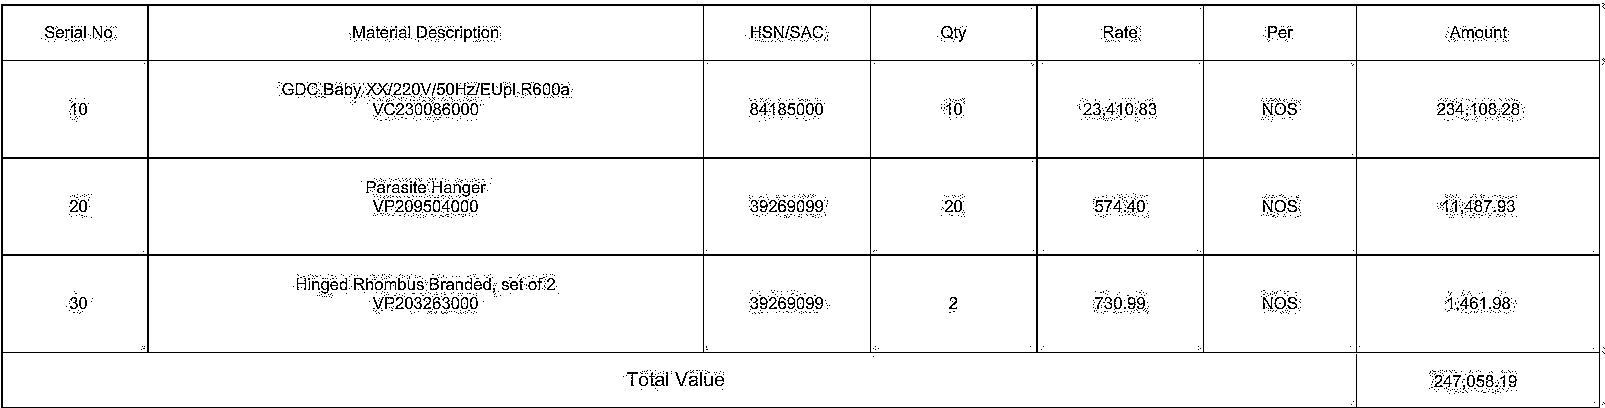

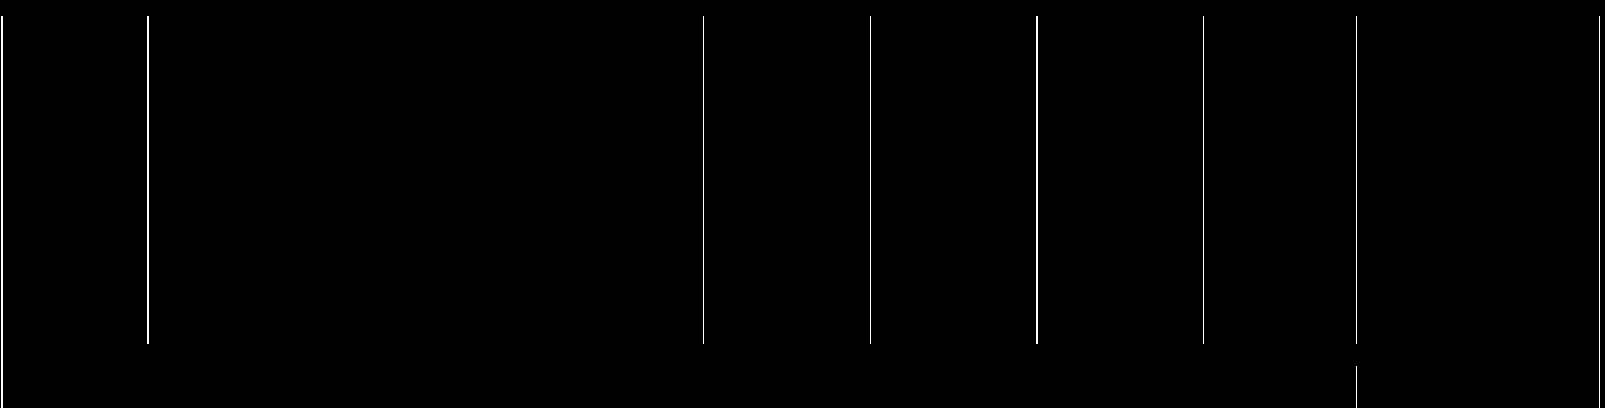

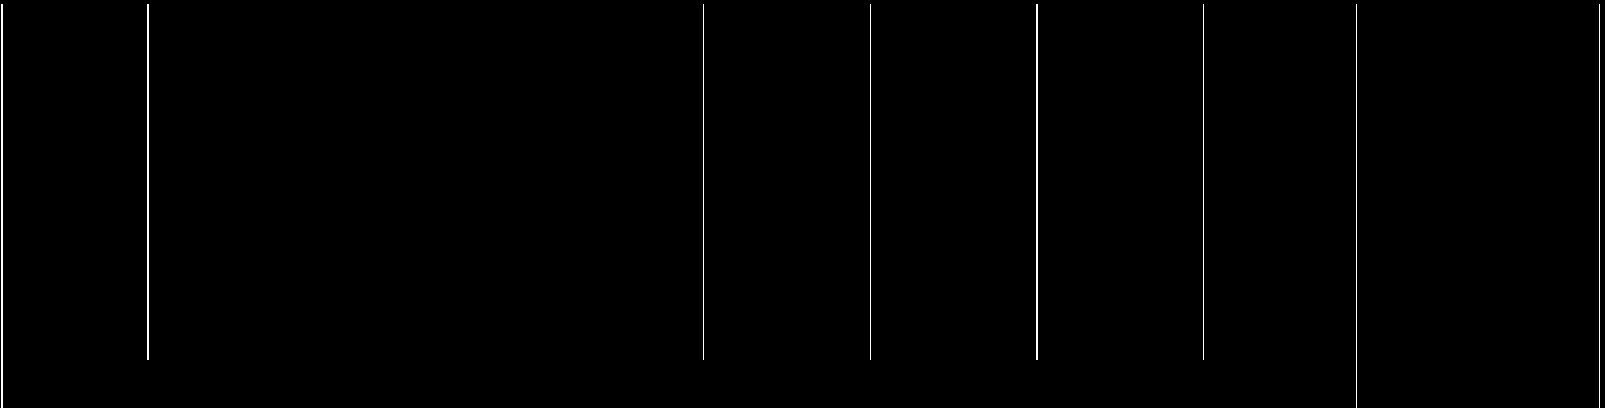

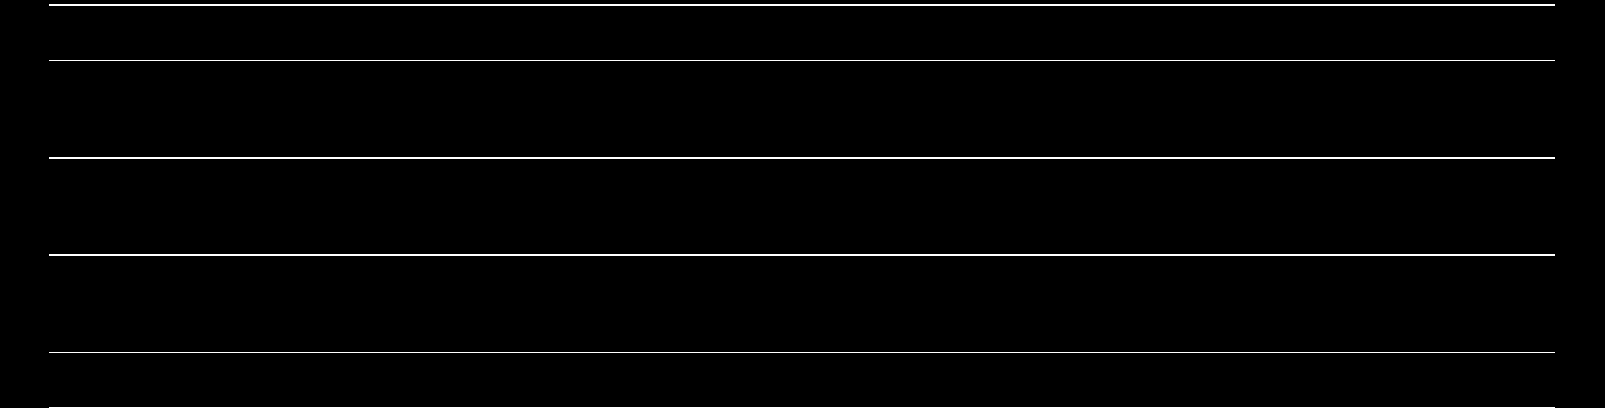

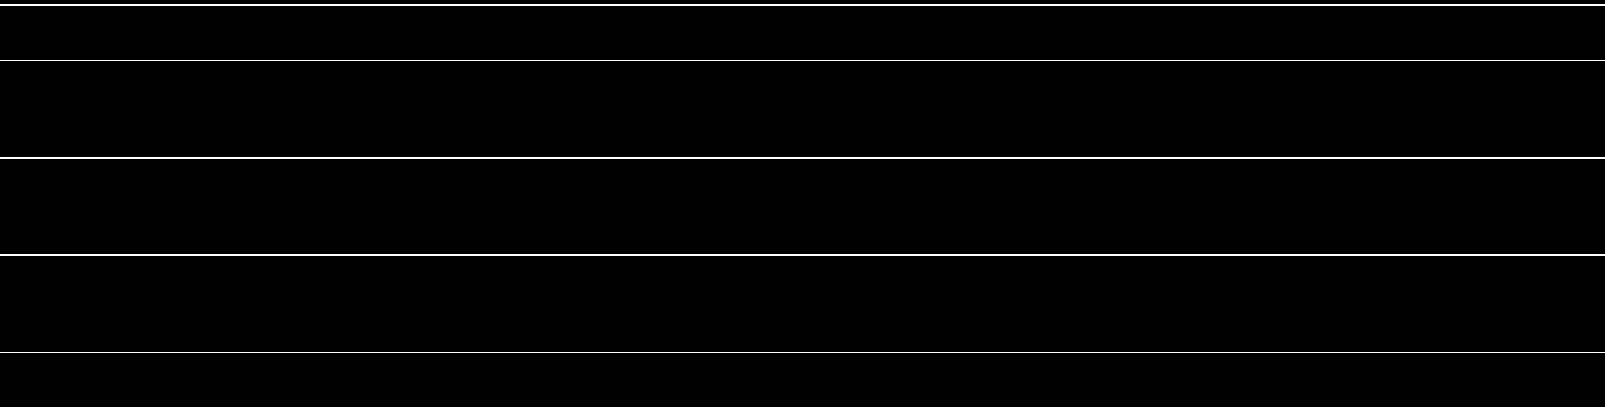

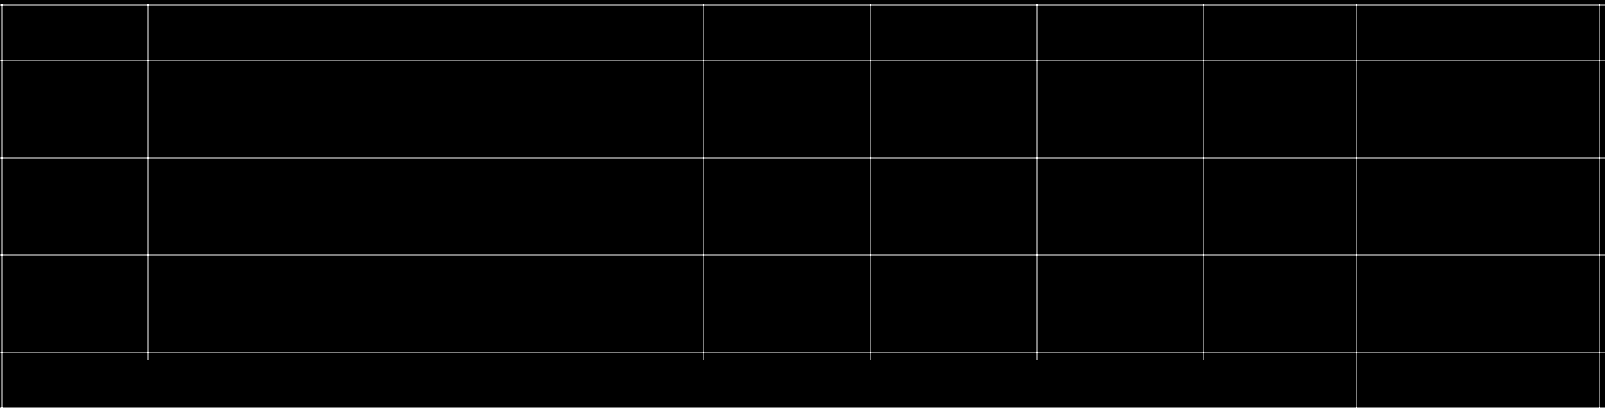

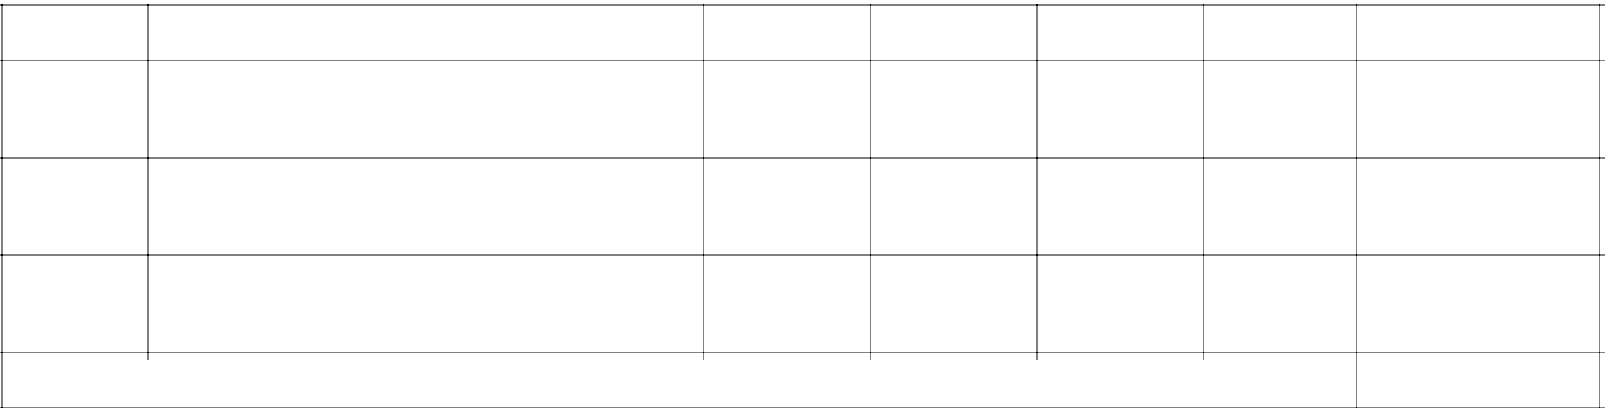

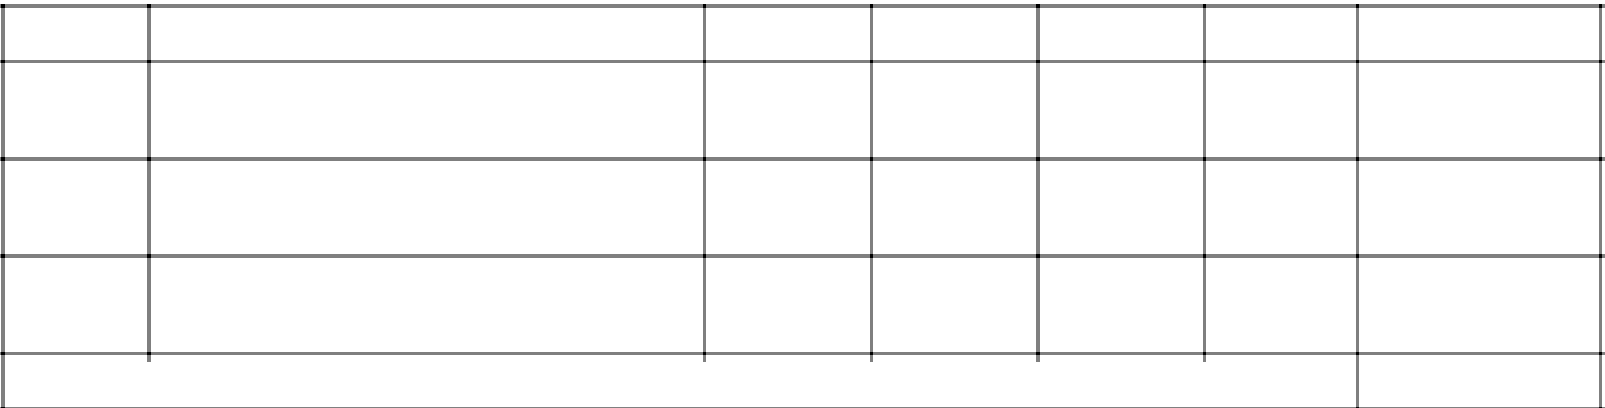

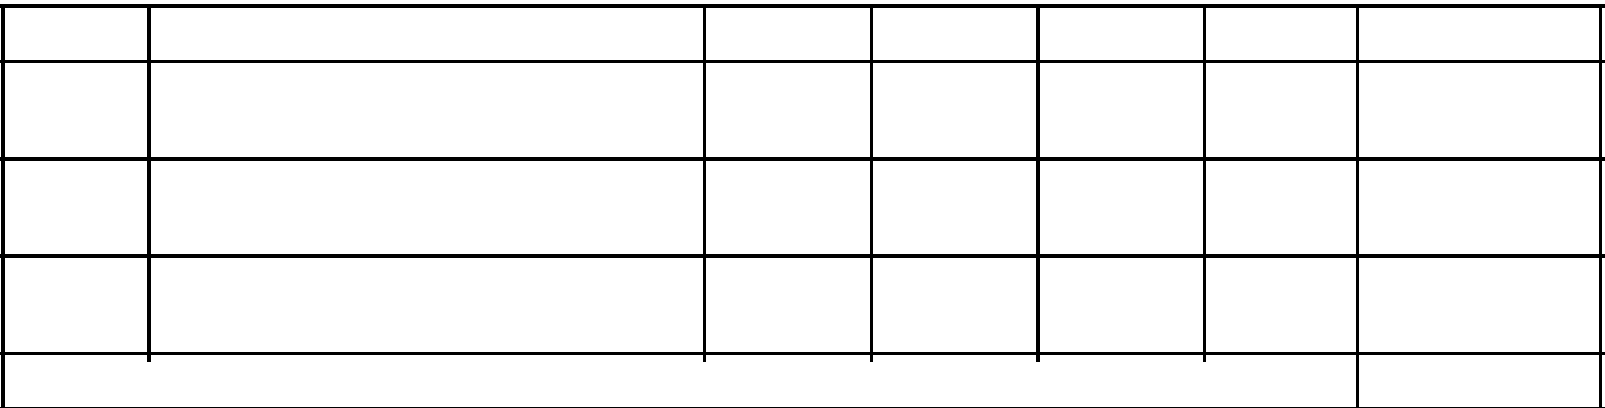

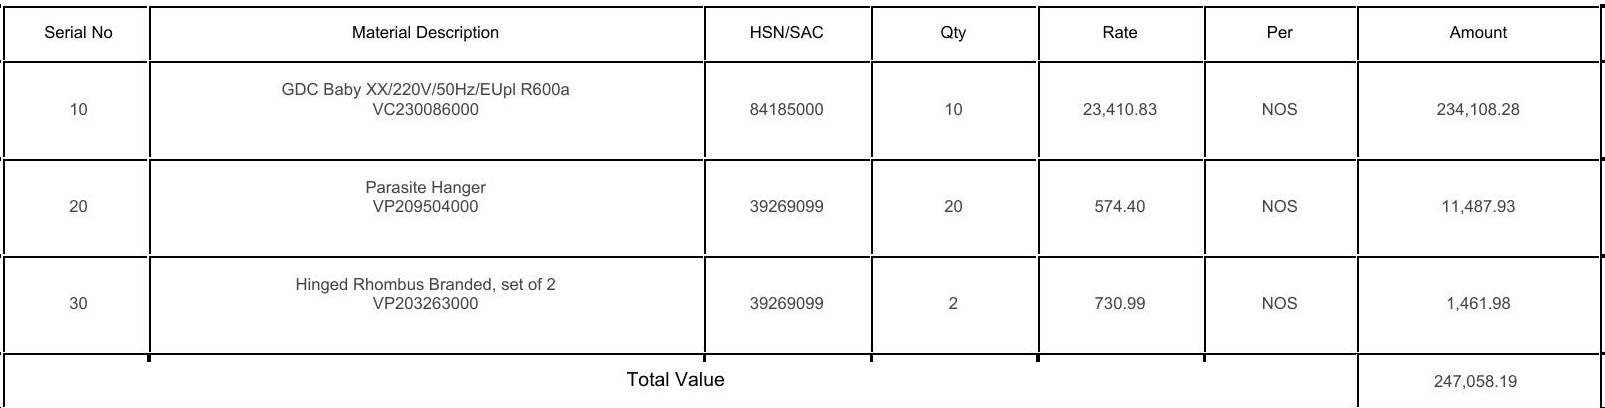

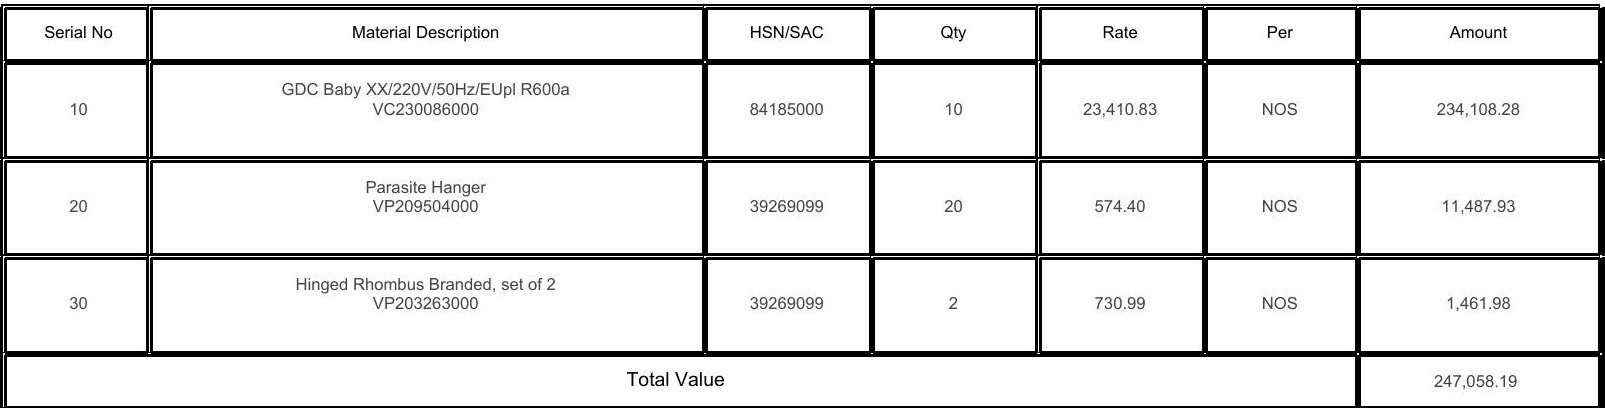

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
   0           1                                               2          3  \
0      Serial No                            Material Description    HSN/SAC   
1             10   GDC Baby XX/220V/50Hz/EUpI R600a\nVC230086000   84185000   
2             20                    Parasite Hanger\nVP209504000   39269099   
3             30   Hinged Rhombus Branded, set of 2\nVP203263000   39269099   
4                                                    Total Value              

      4           5     6            7  8  
0   Qty        Rate   Per       Amount     
1    10   23,410.83   NOS   234,108.28     
2    20      574.40   NOS    11,487.93     
3            730.99   NOS     1,461.98     
4                           247,058.19     


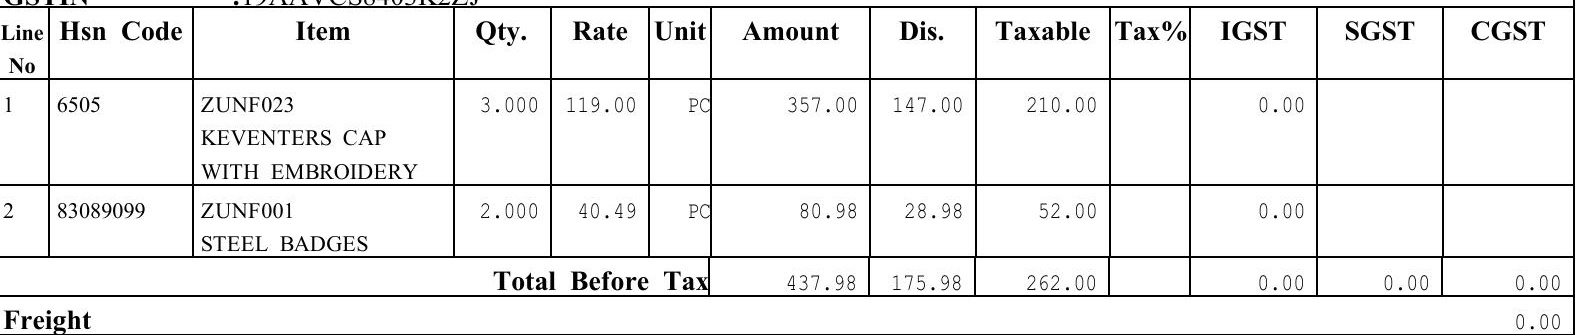

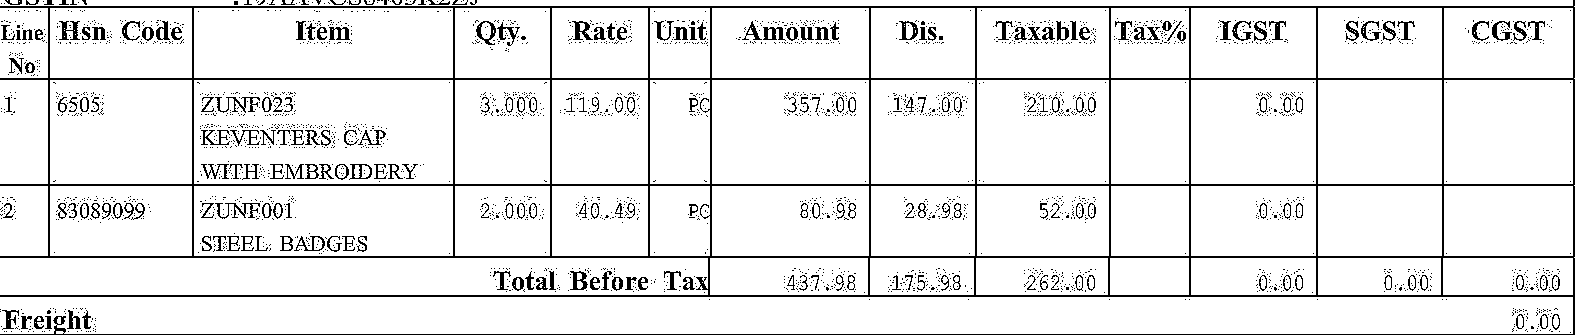

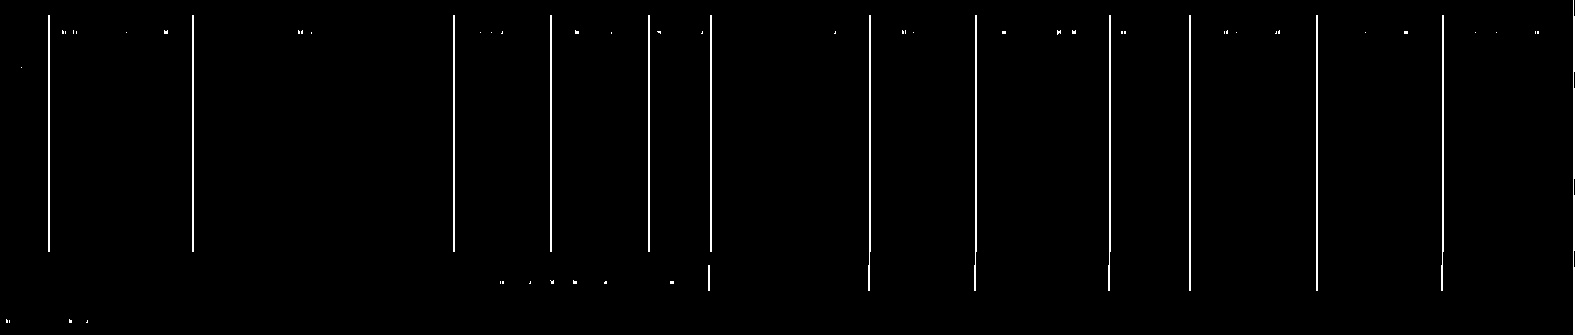

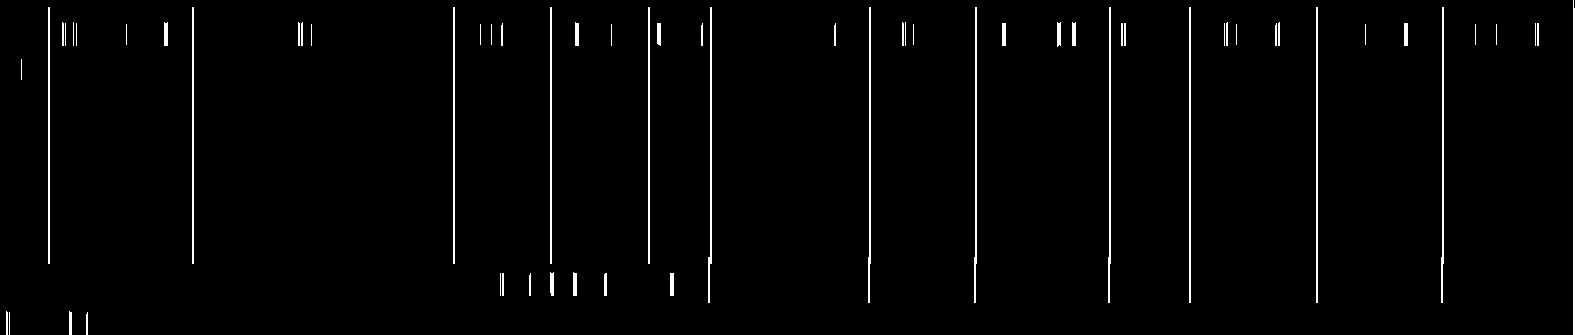

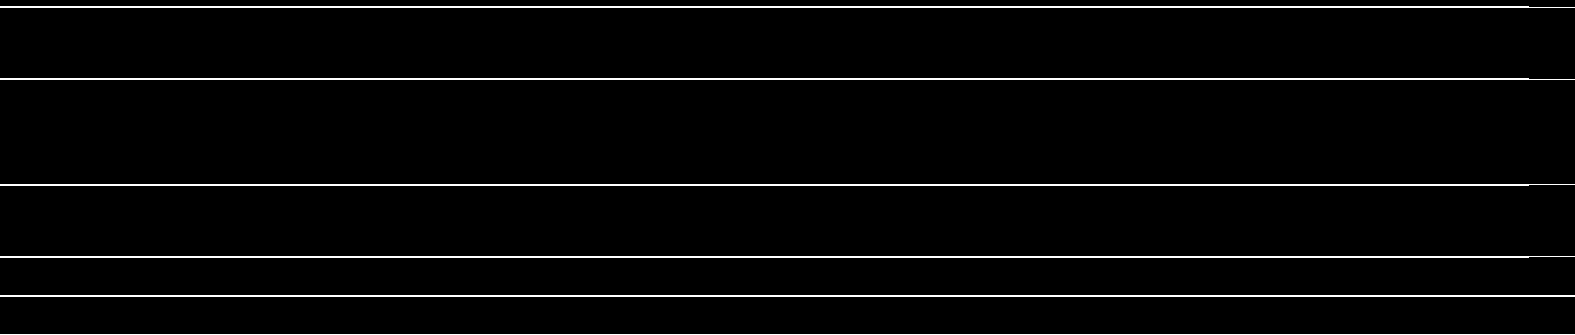

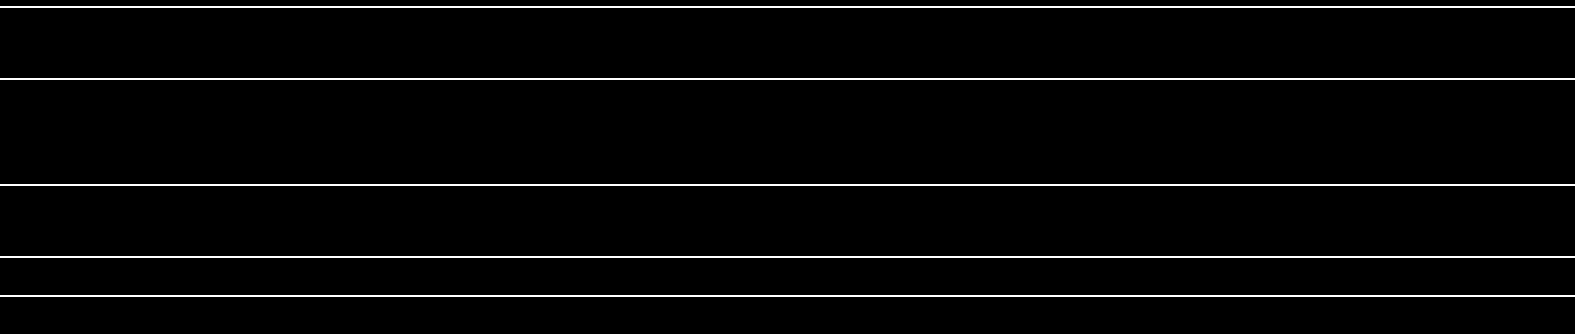

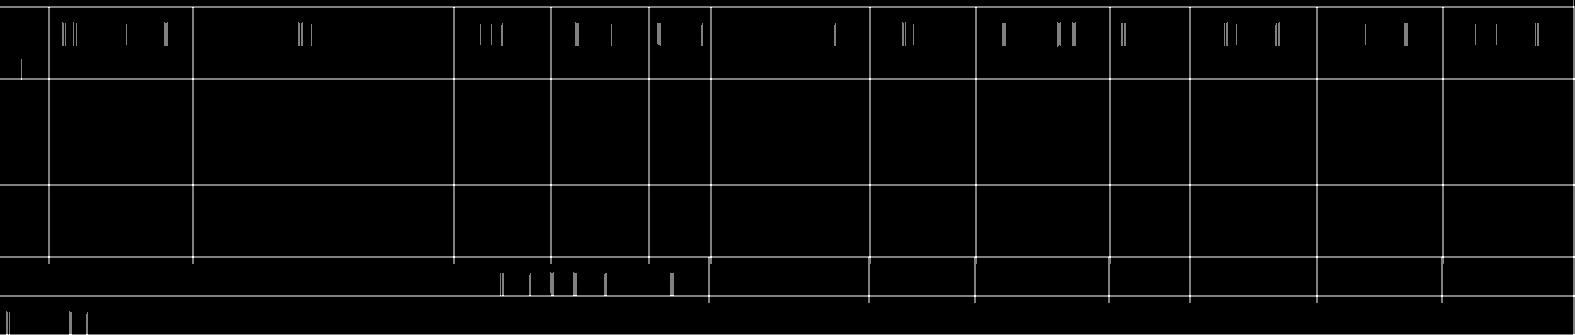

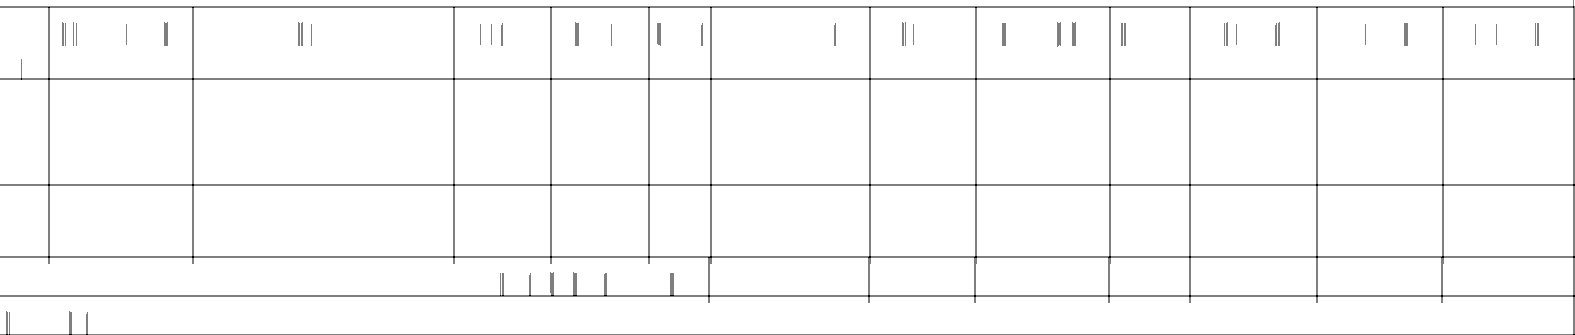

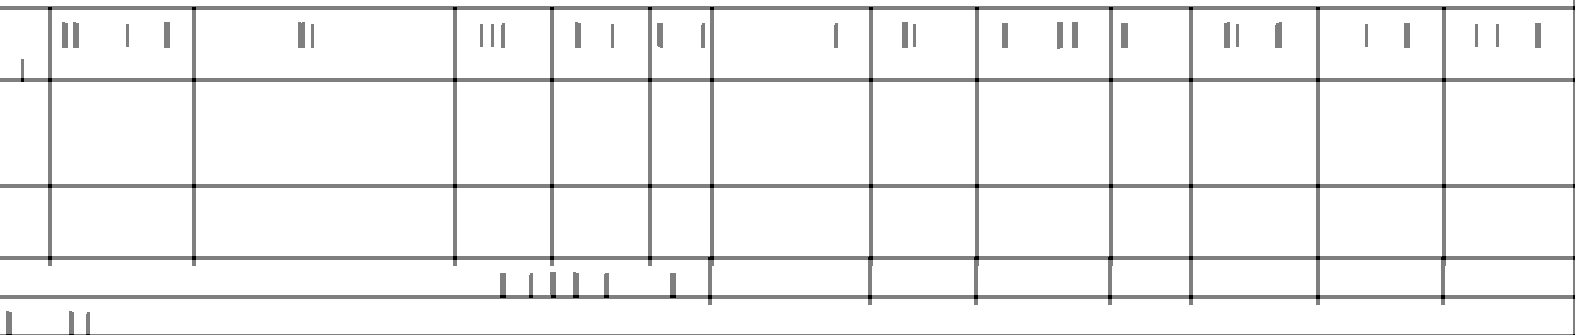

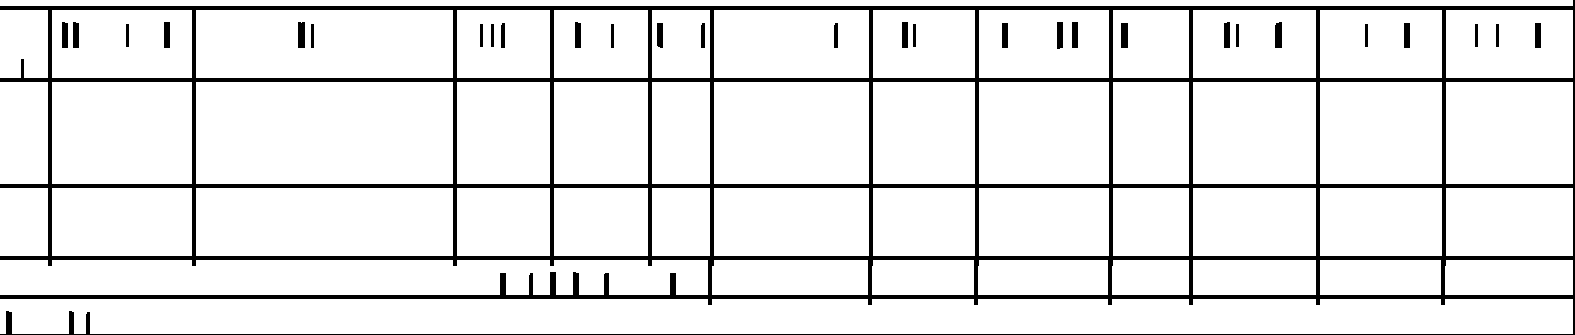

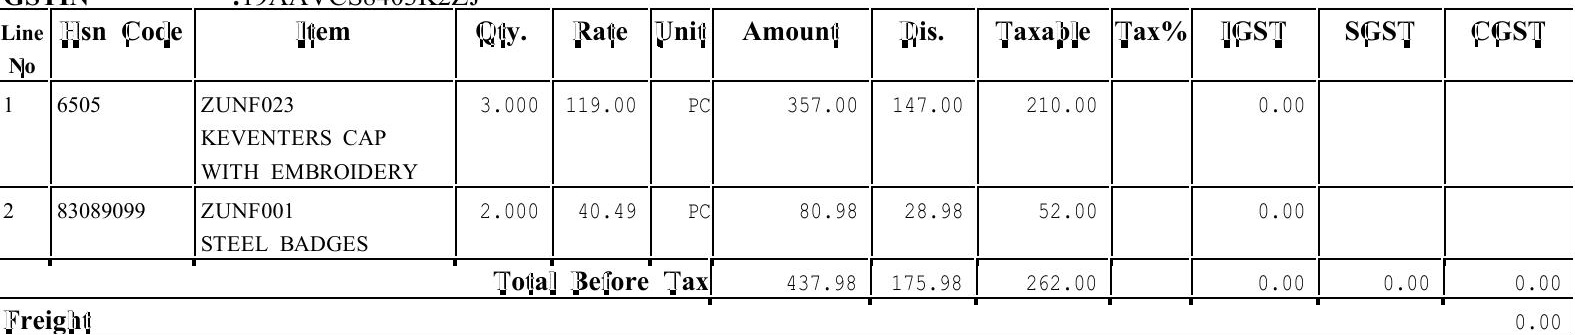

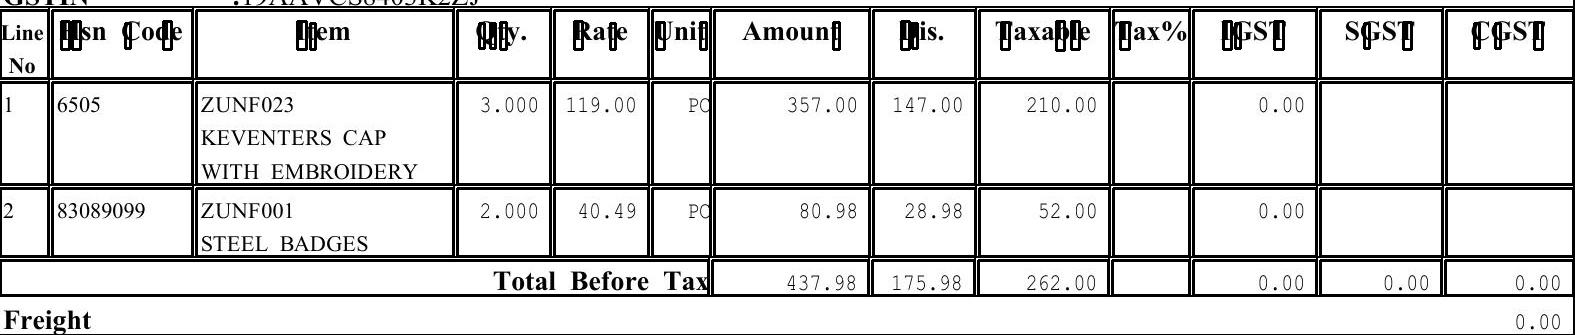

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
      0  1           2  3  4                  5   \
0   Line      Hsn Code                             
1                  6505                            
2              83089099                            
3                               Total Before Tax   

                                         6  7  8       9   ... 31 32 33  \
0                                     Item          Qty.   ...            
1   ZUNF023\nKEVENTERS CAP\nWITH EMBROIDERY         3.000  ...            
2                     ZUNF001\nSTEEL BADGES         2.000  ...            
3                                                          ...            

       34 35 36       37 38 39 40  
0   SGST           CGST            
1                

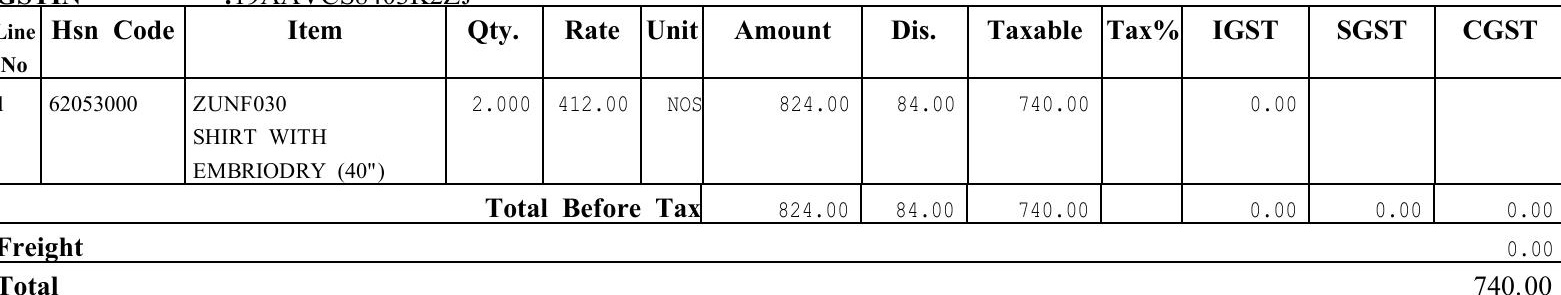

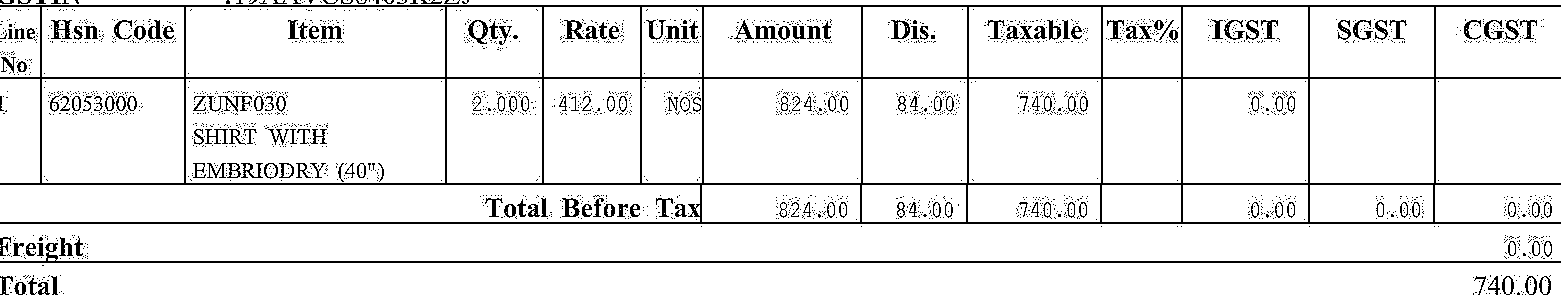

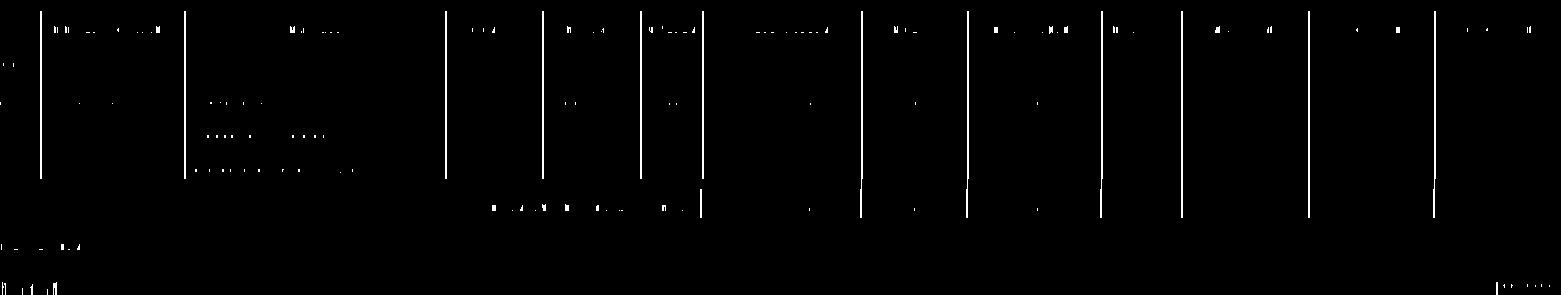

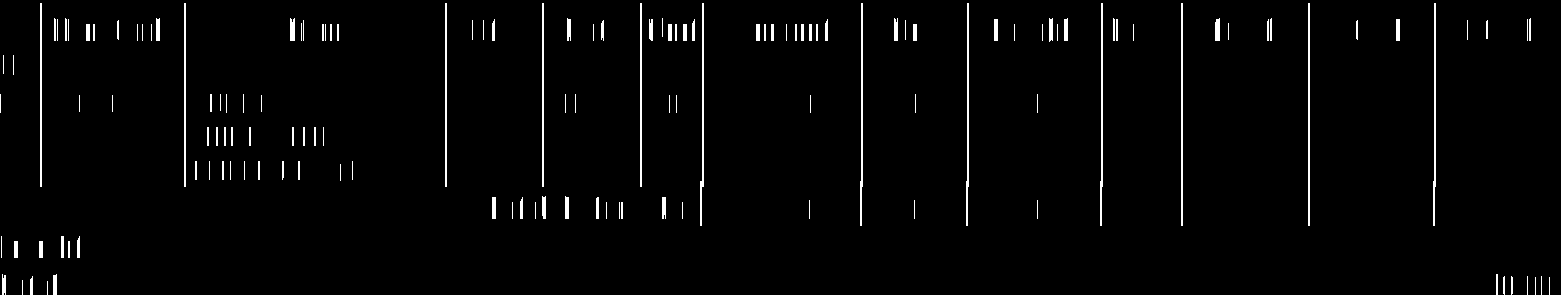

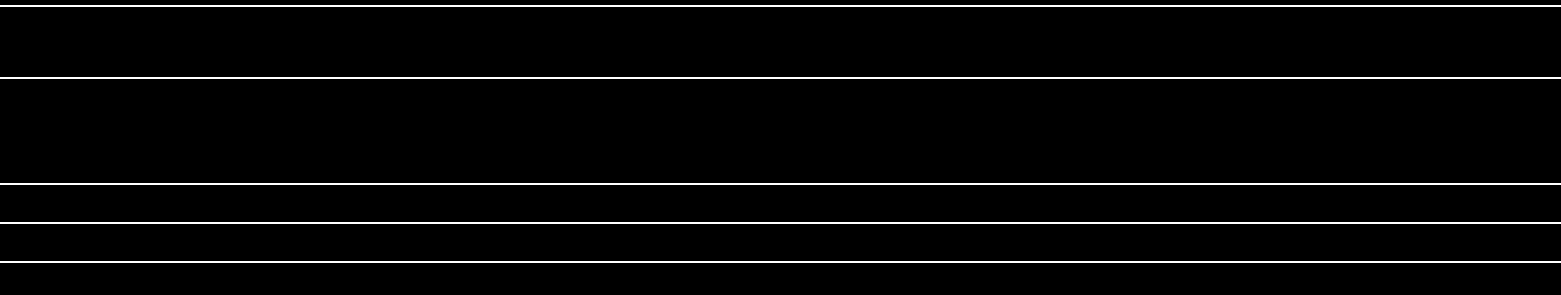

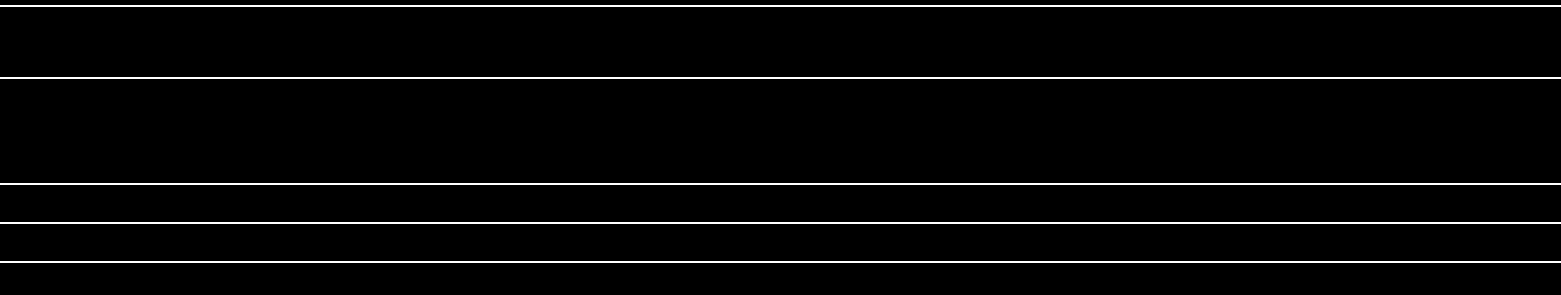

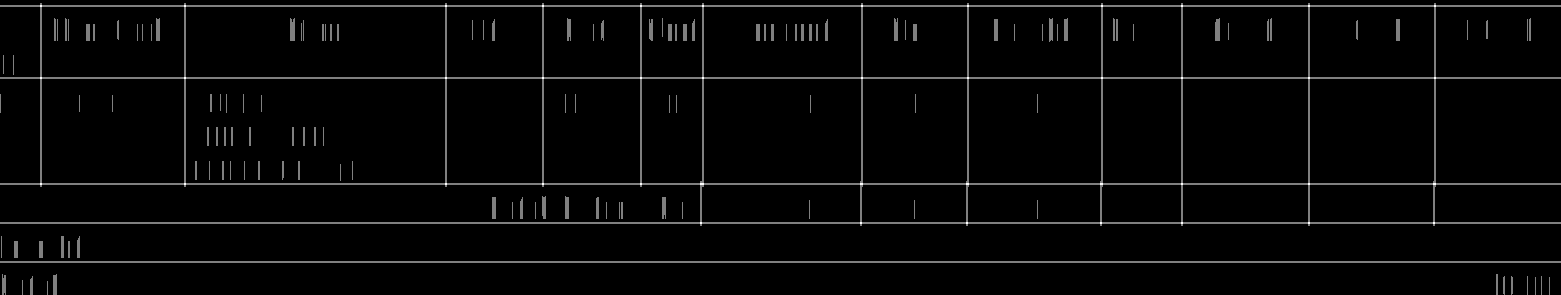

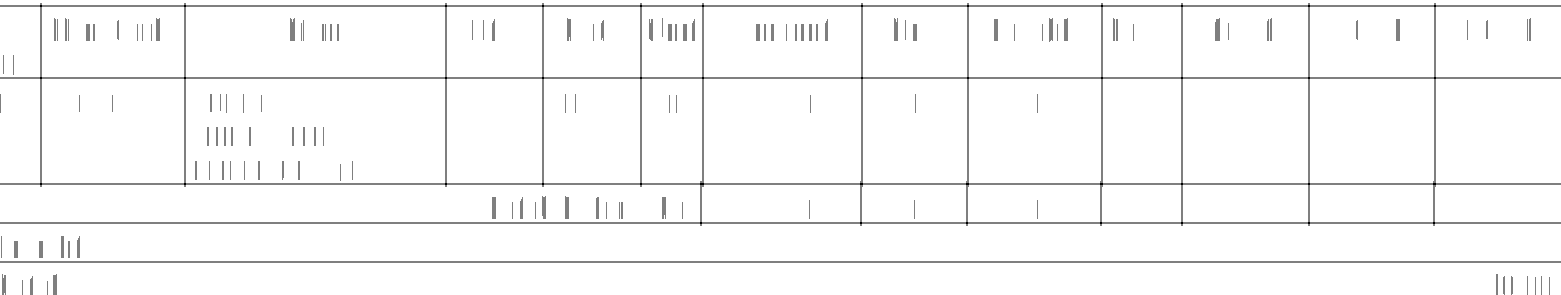

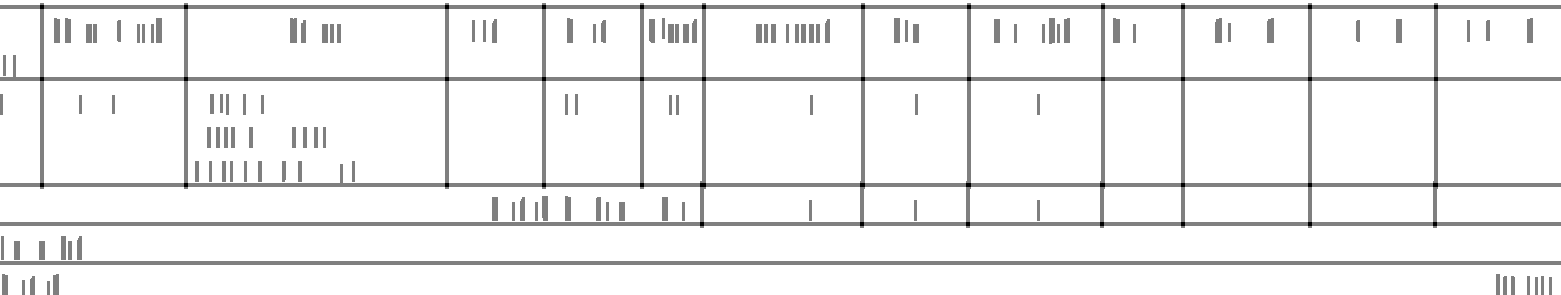

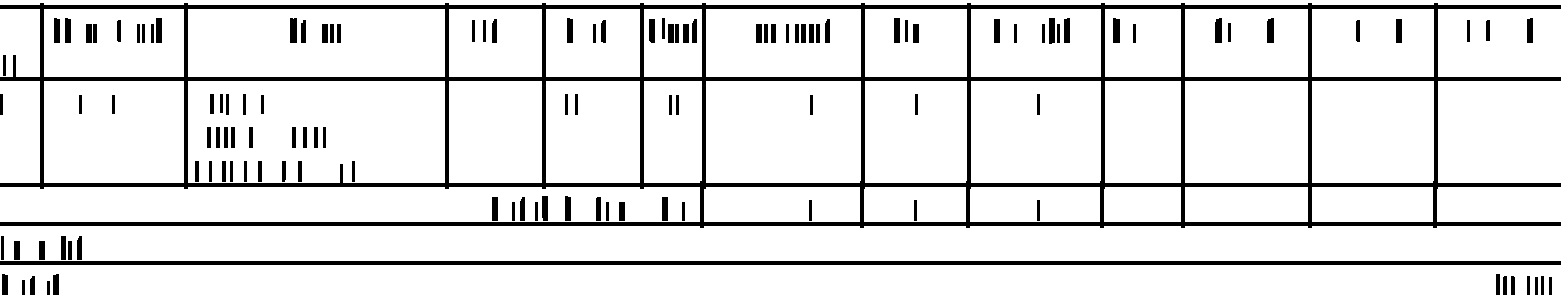

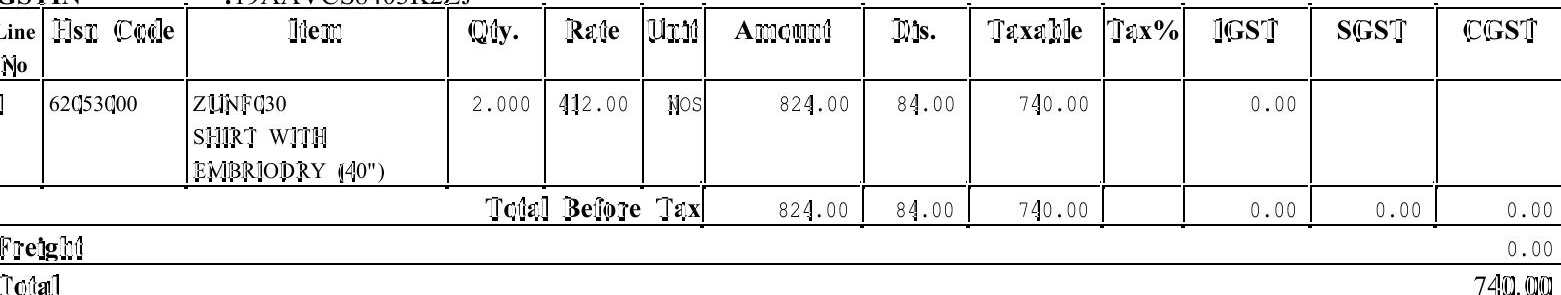

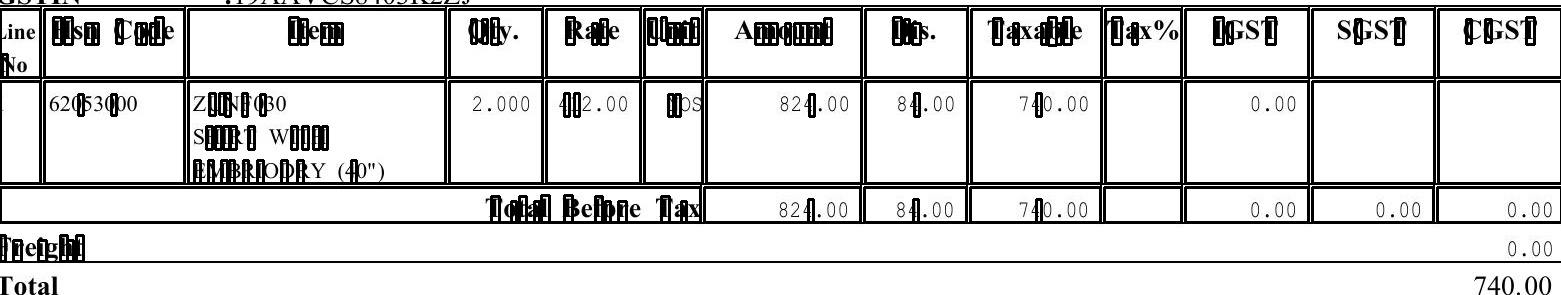

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
         0   1   2           3  4  5   6  7  8  9   ... 57 58 59       60 61  \
0   ine\nNo           Hsn Code                      ...            SGST        
1                                                   ...                        
2                     62053000                      ...                        
3                                                   ...                        
4                                                   ...                        
5                                               

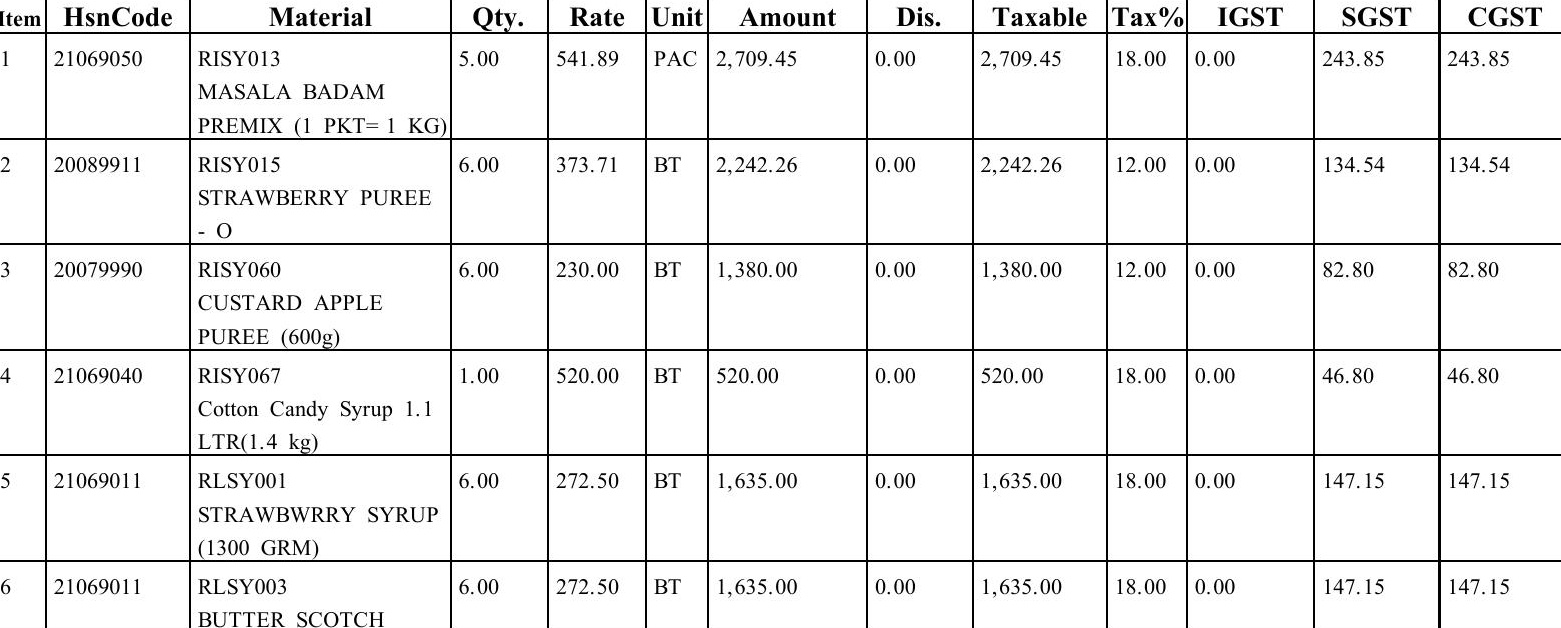

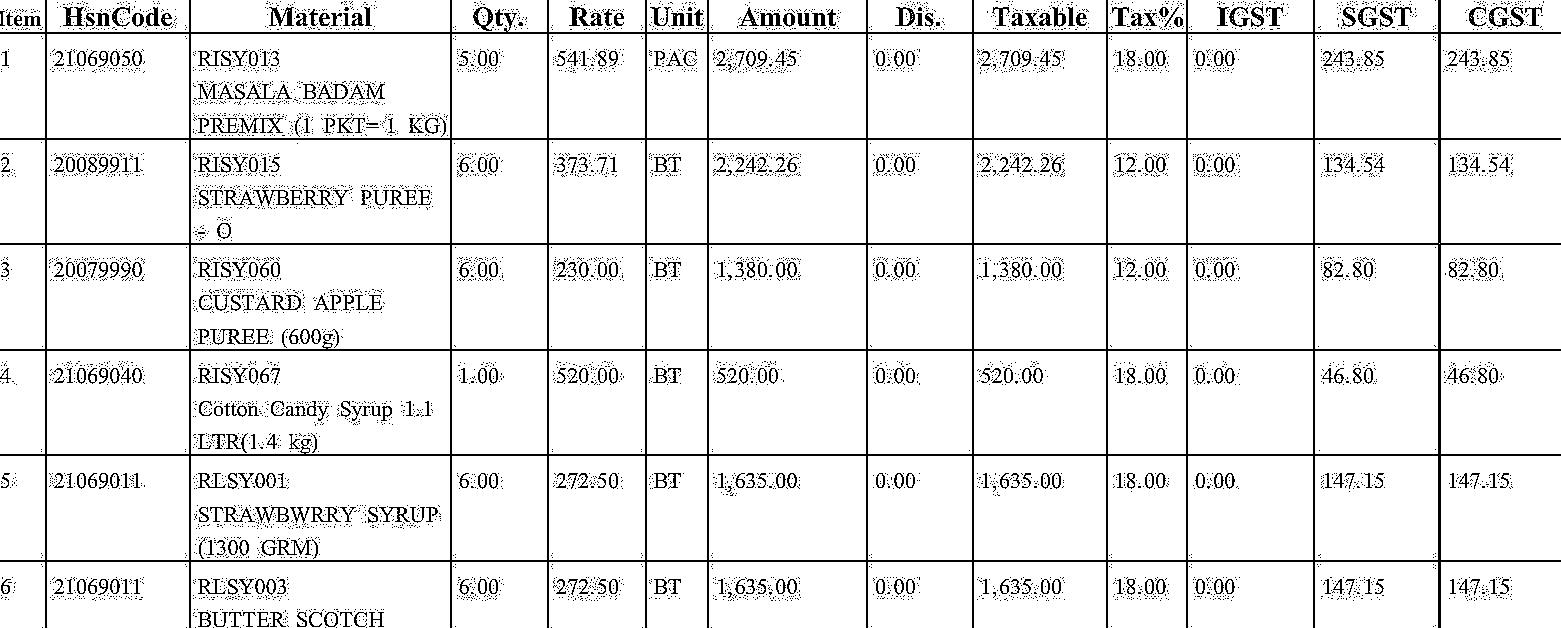

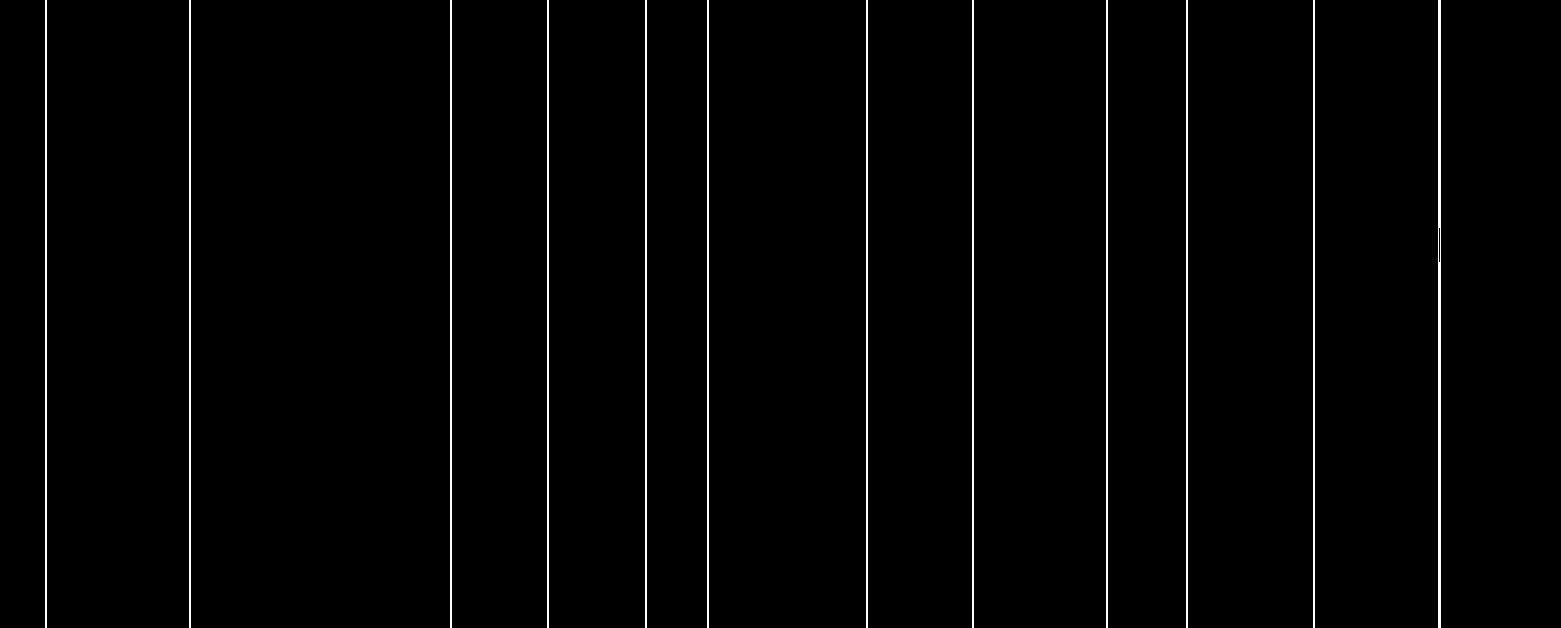

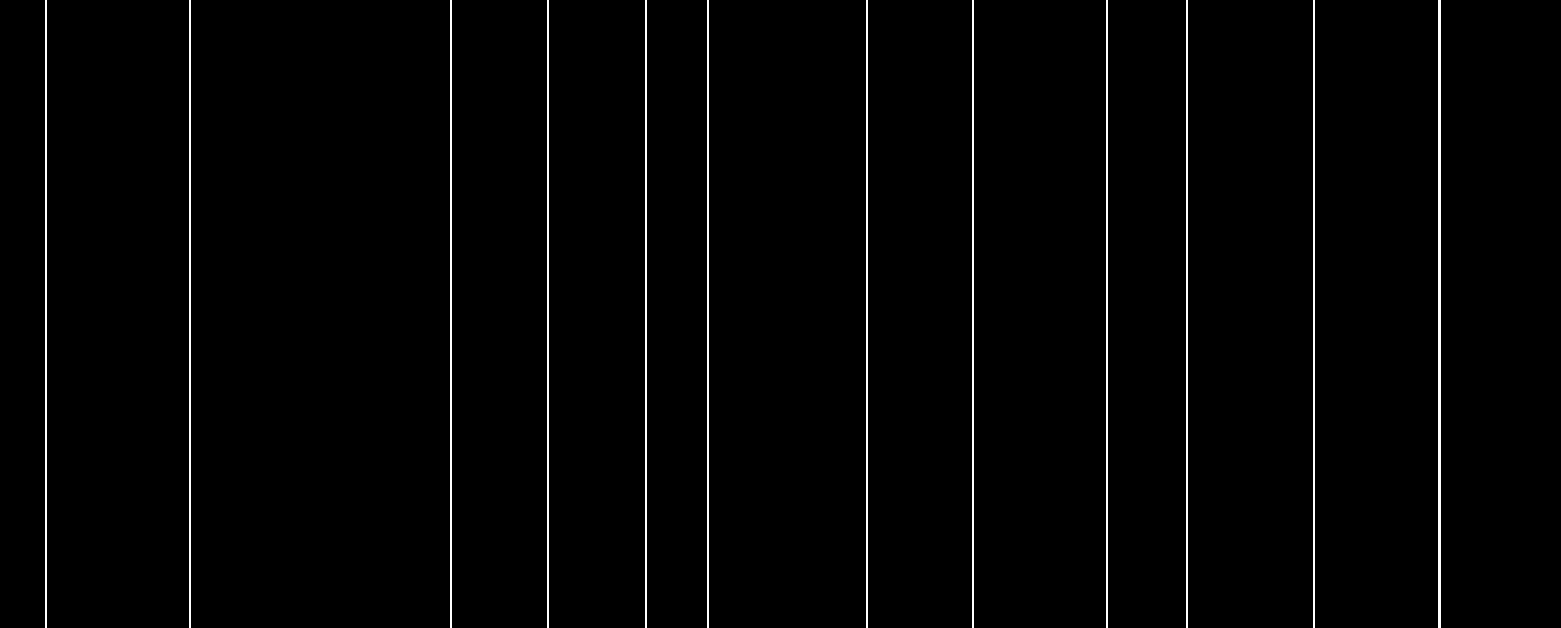

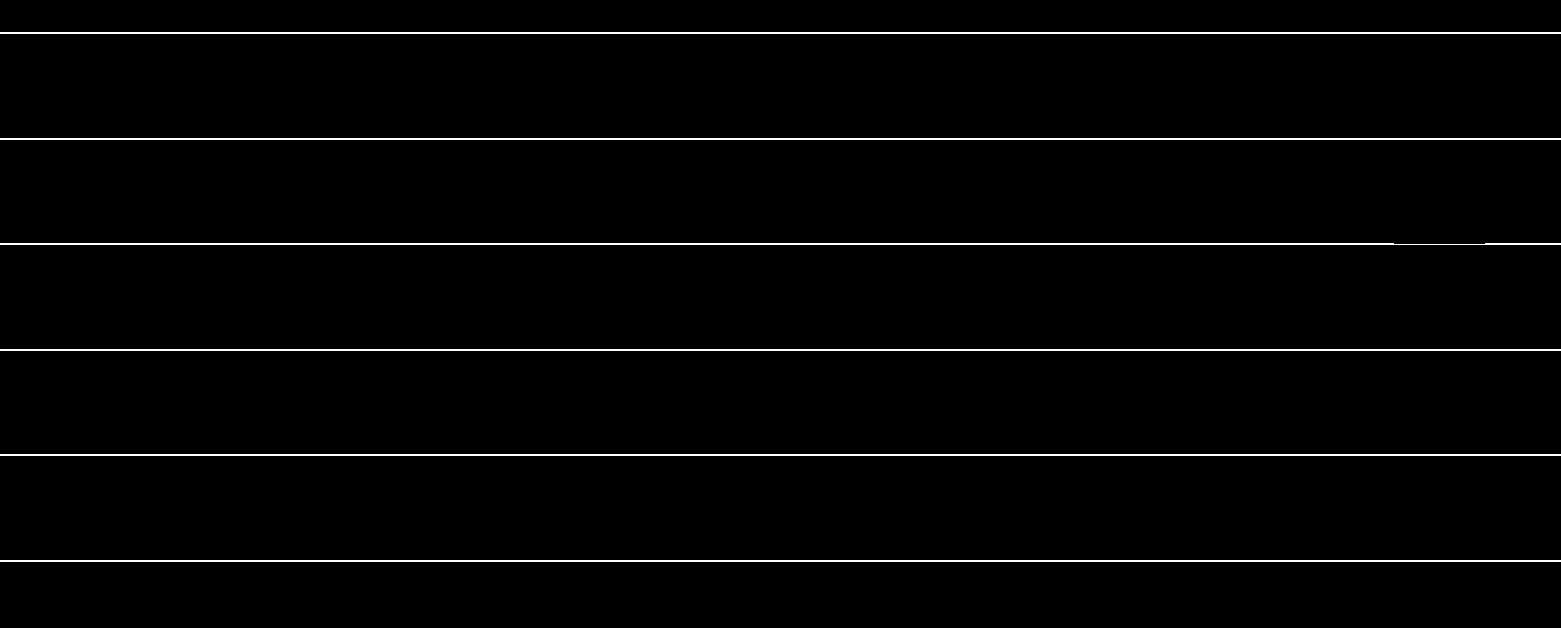

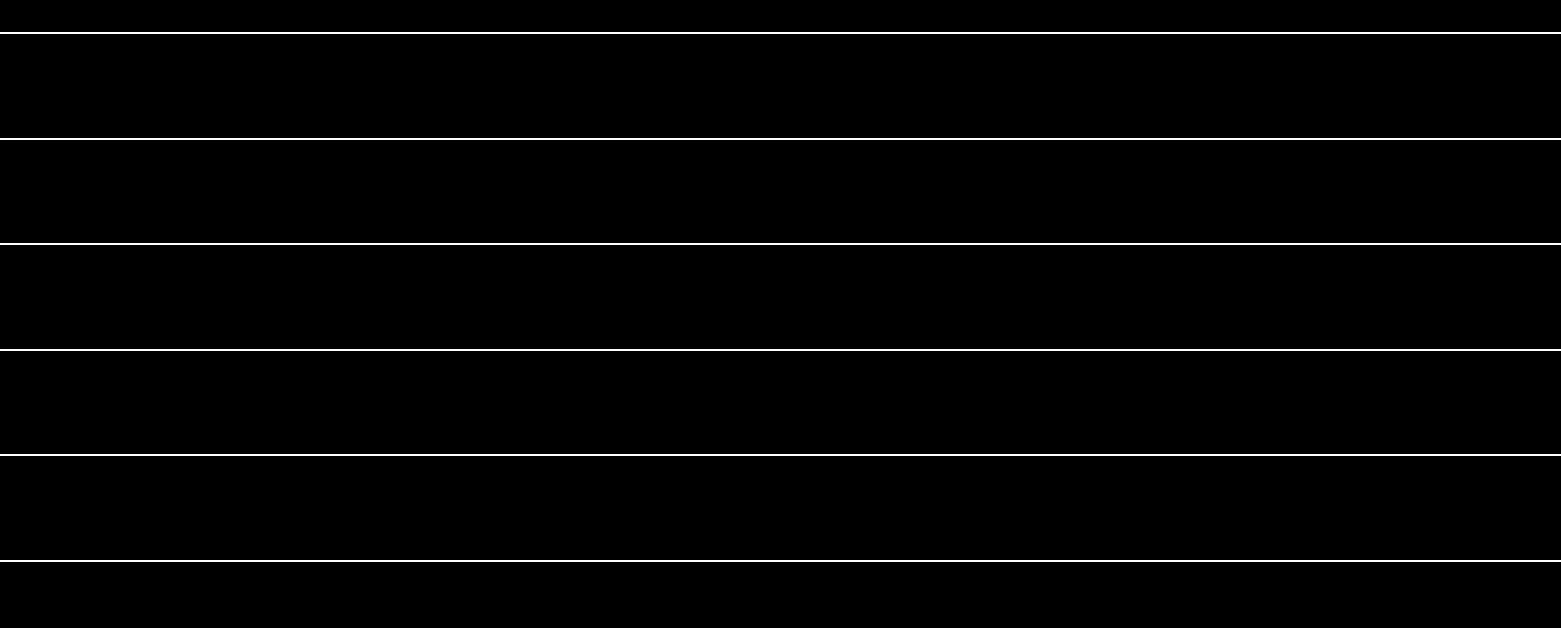

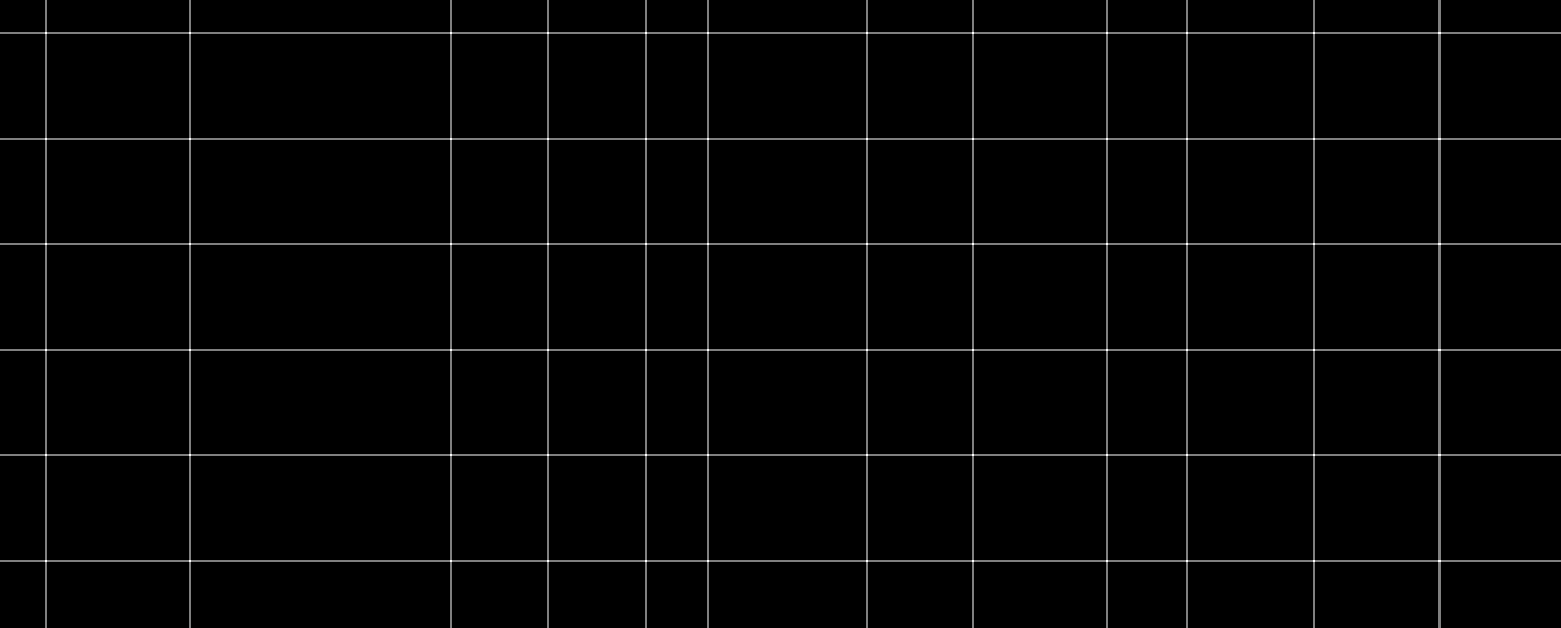

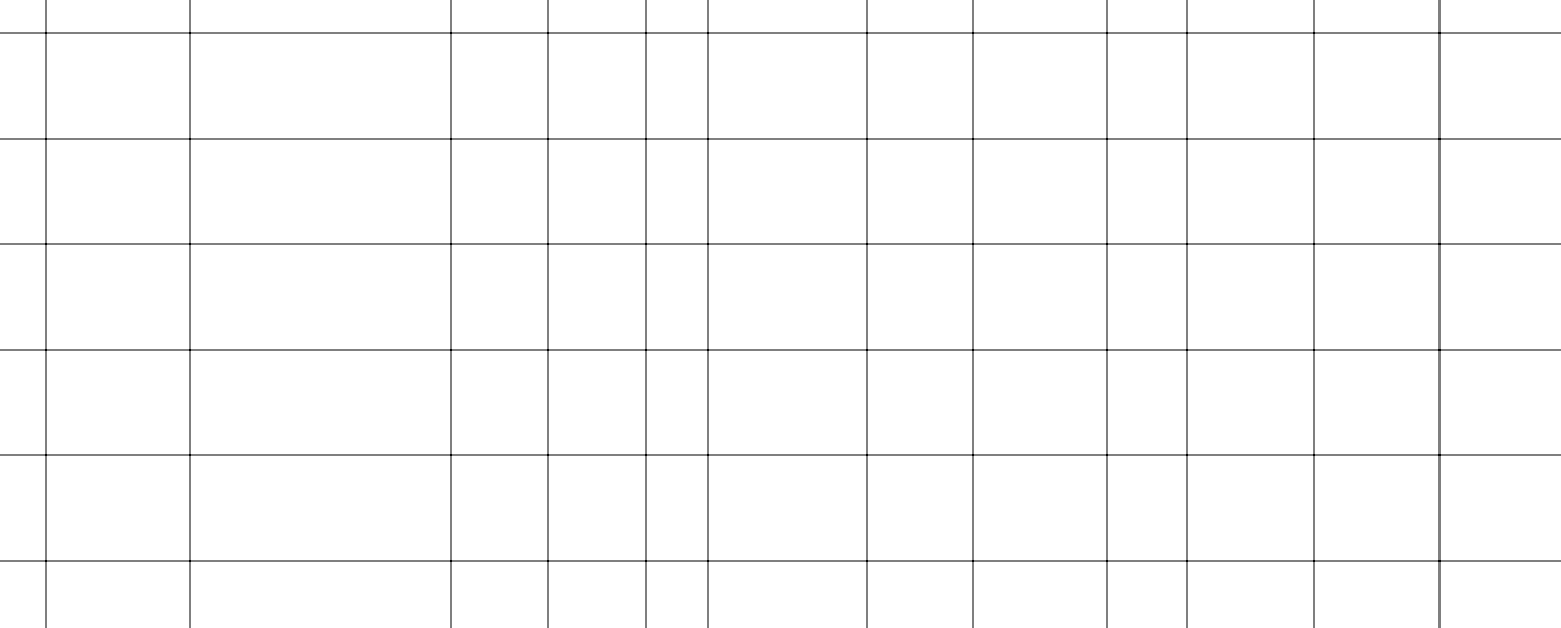

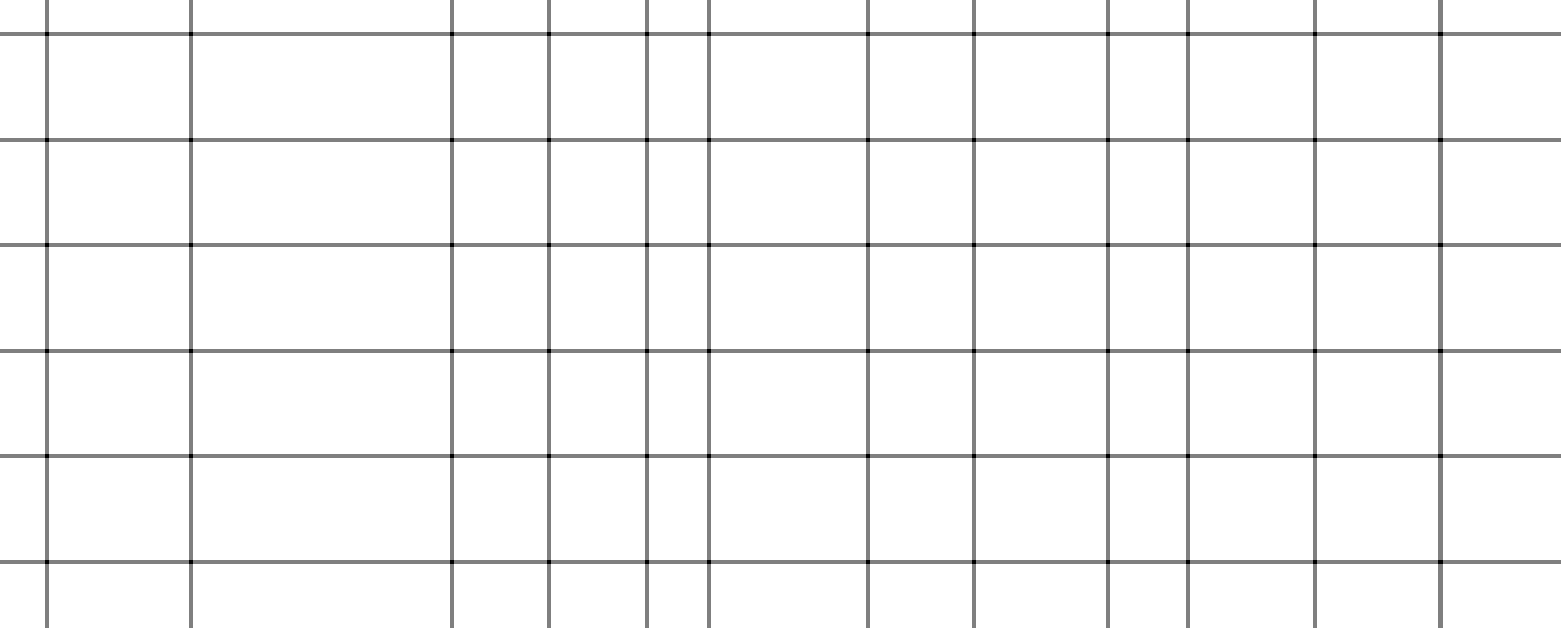

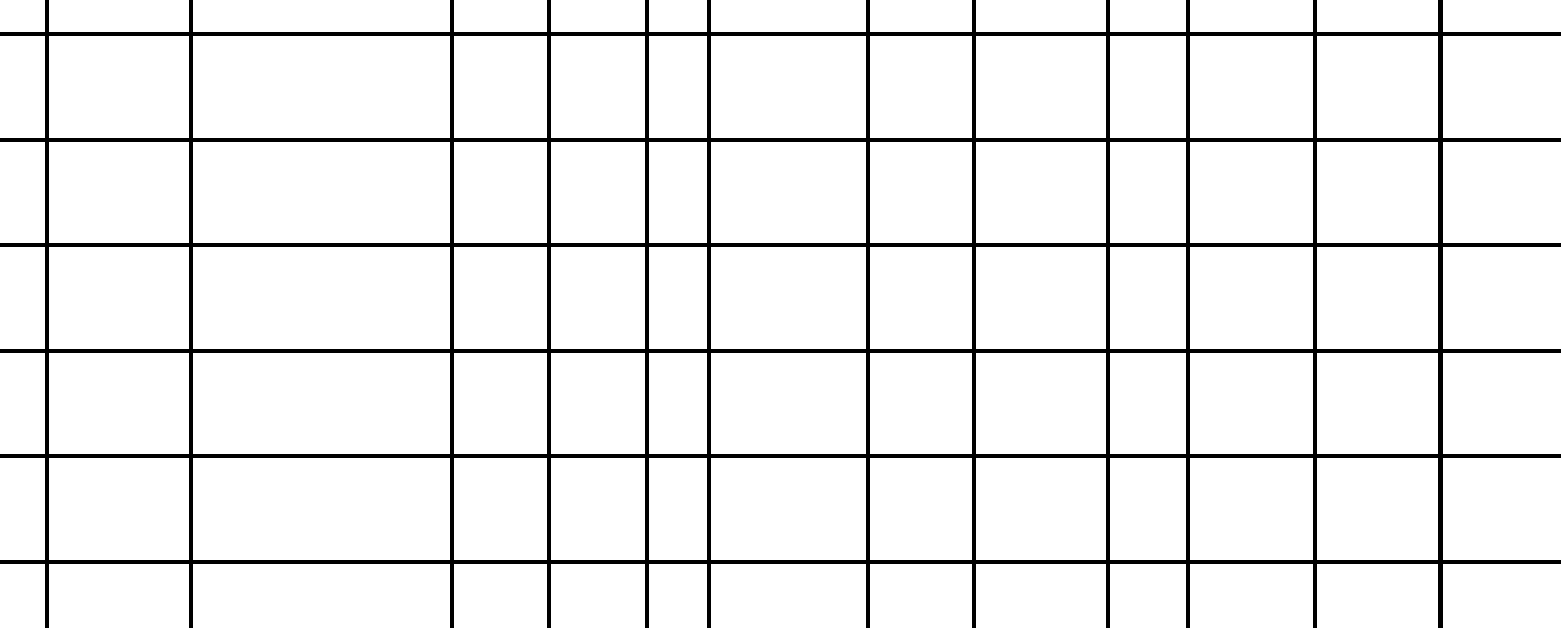

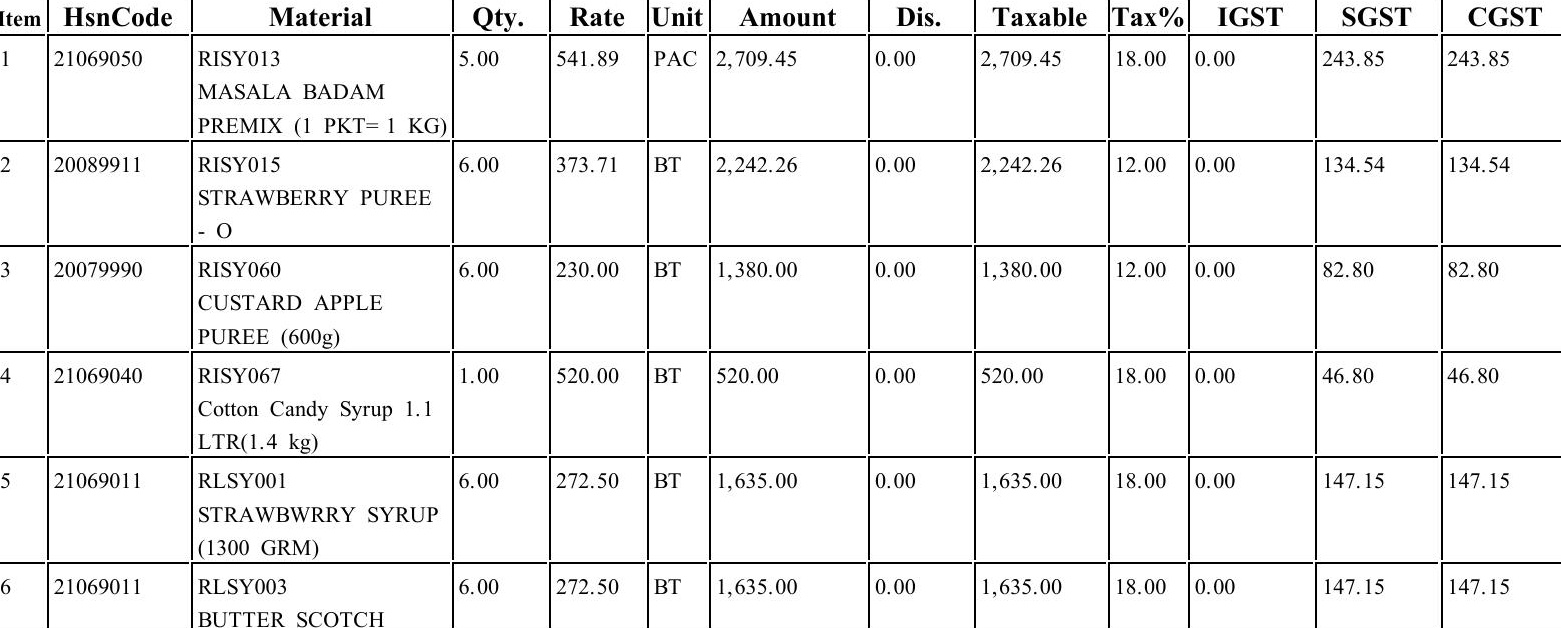

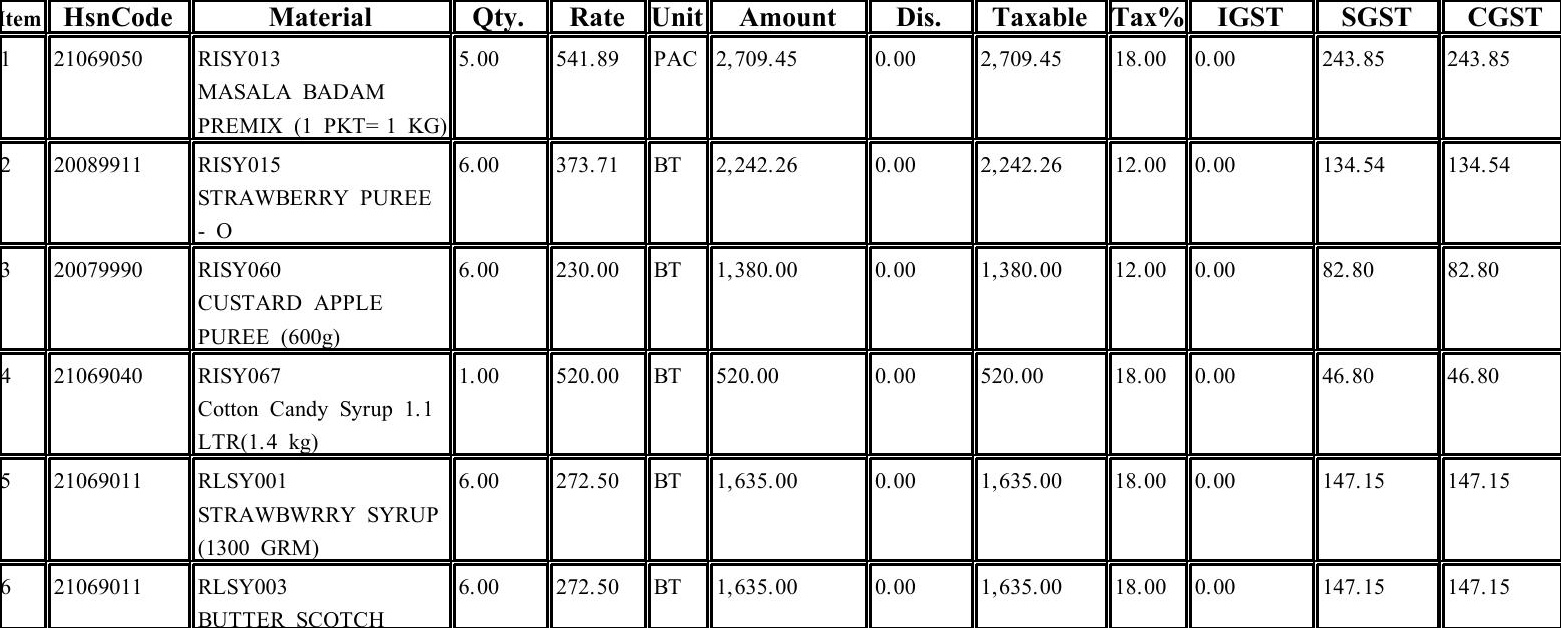

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
       0  1                  2  3   \
0   [tem       HsnCode 21069050      
1                      20089911      
2                      20079990      
3                      21069040      
4                      21069011      
5                      21069011      

                                                  4  5           6  7   \
0   Material RISY013\nMASALA BADAM\nPREMIX (1 PKT...      Qty. 5.00      
1                      RISYO15\nSTRAWBERRY PUREE\n26           6.00      
2                RISY060\nCUSTARD APPLE\nPUREE (600)           6.00      
3       RISY067\nCotton Candy Syrup 1.1\nLTR(1.4 kg)           1.00      
4              RLSY001\nSTRAWBWRRY SYRUP\

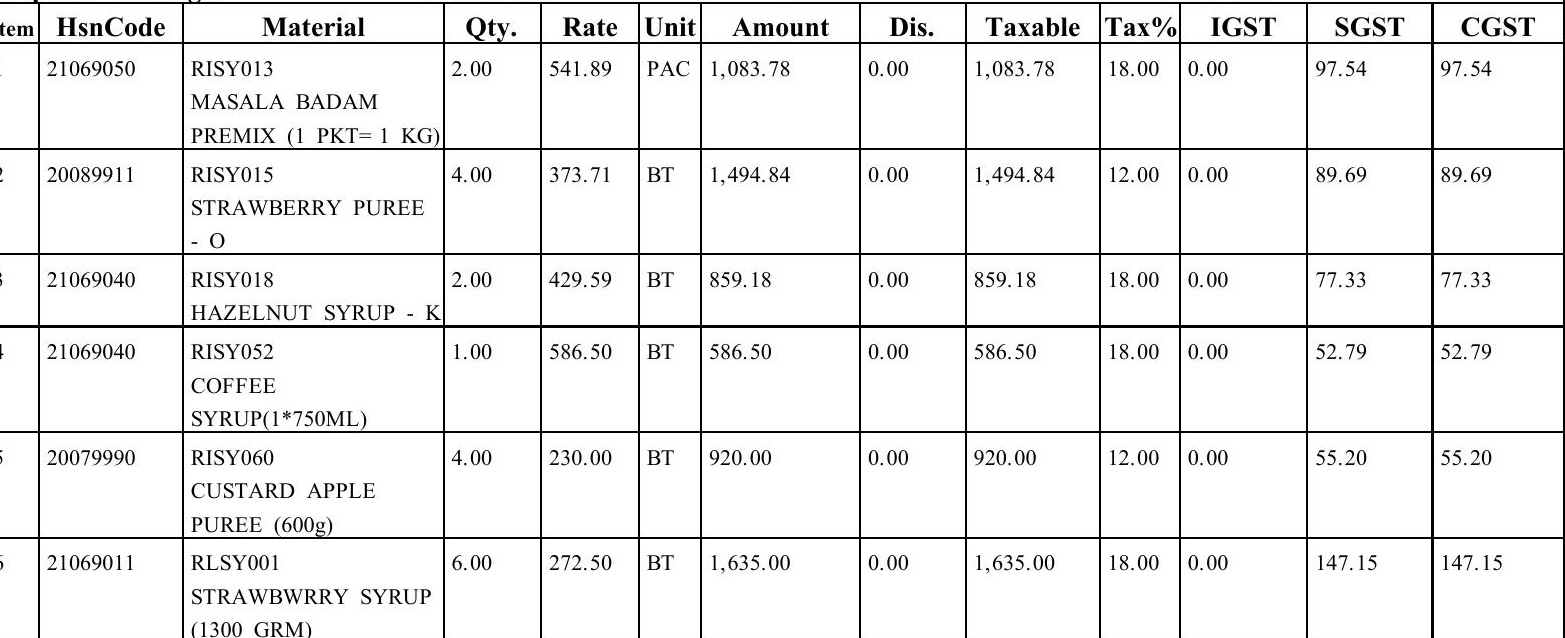

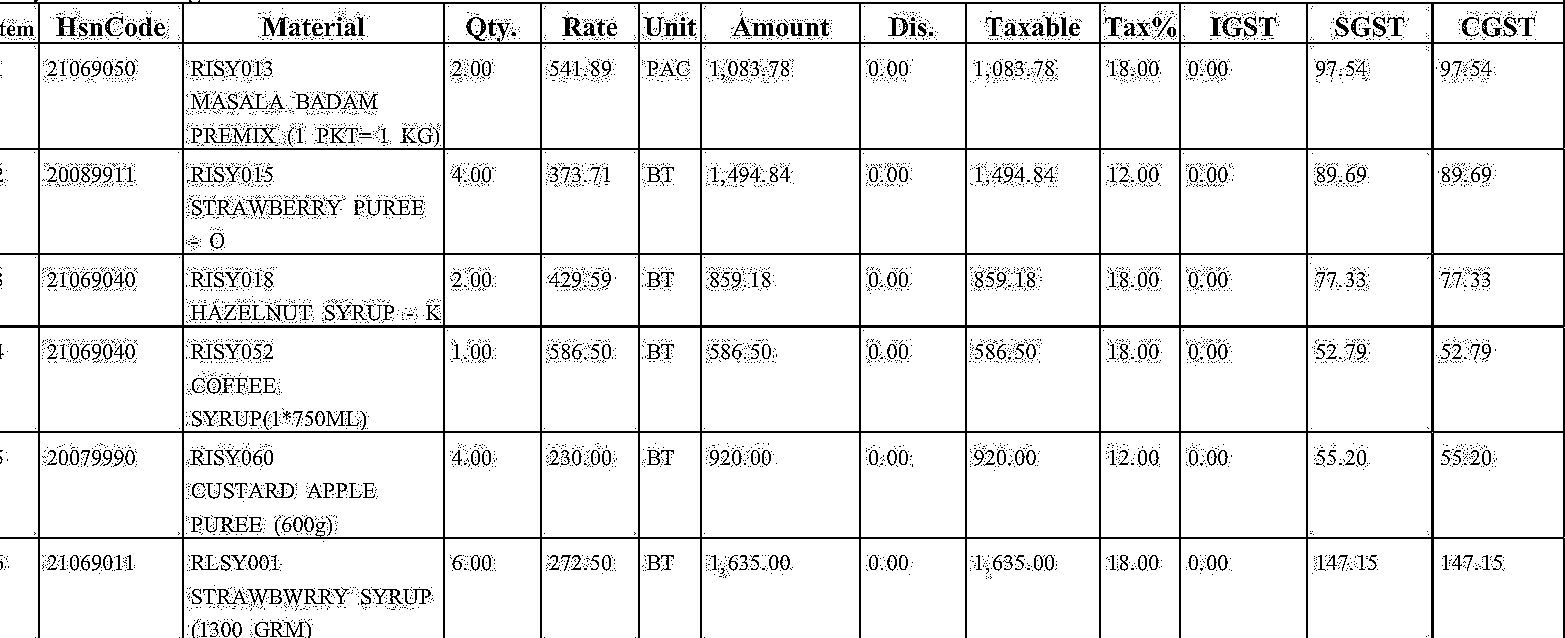

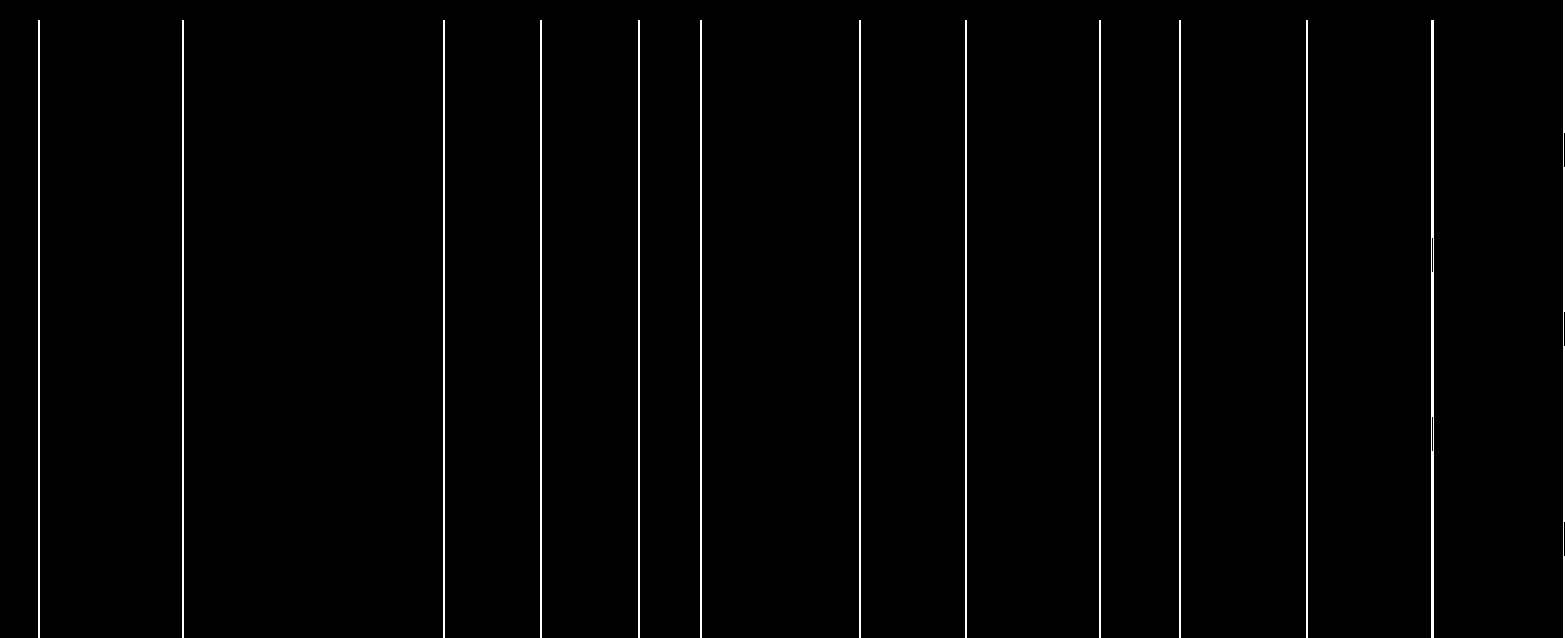

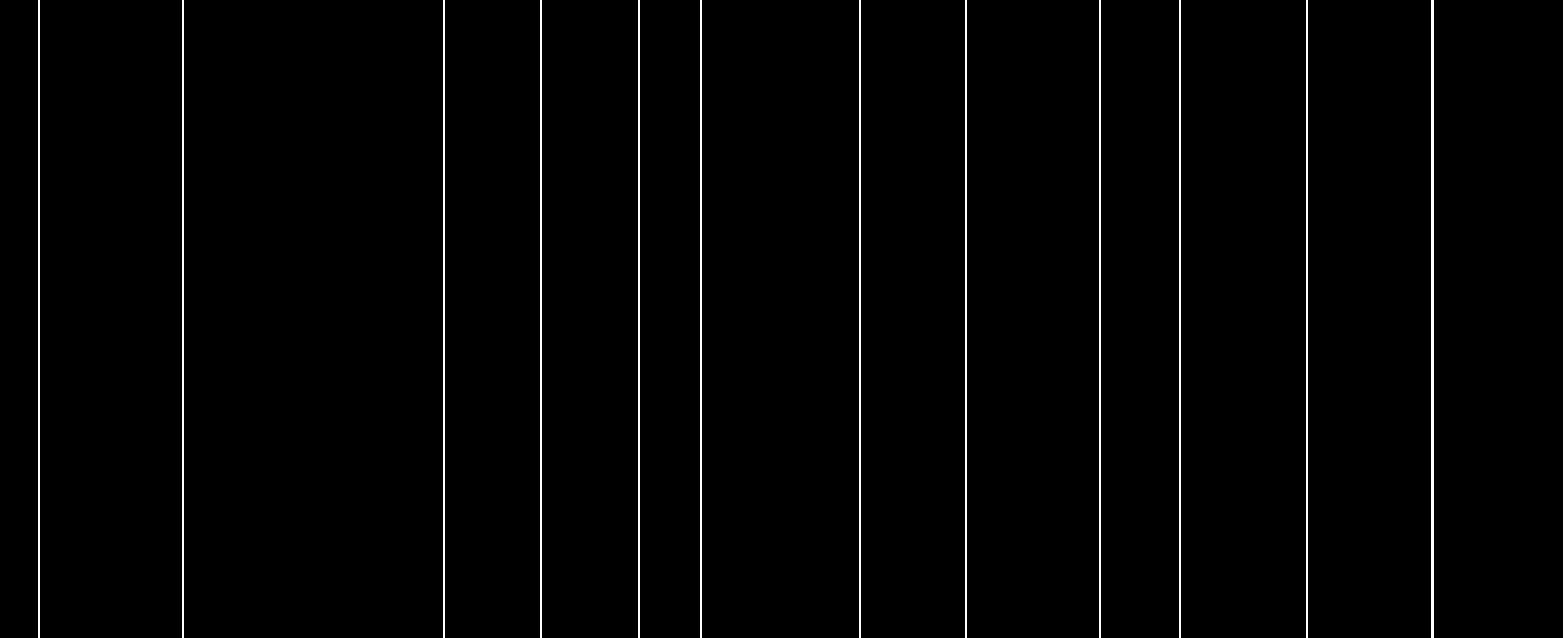

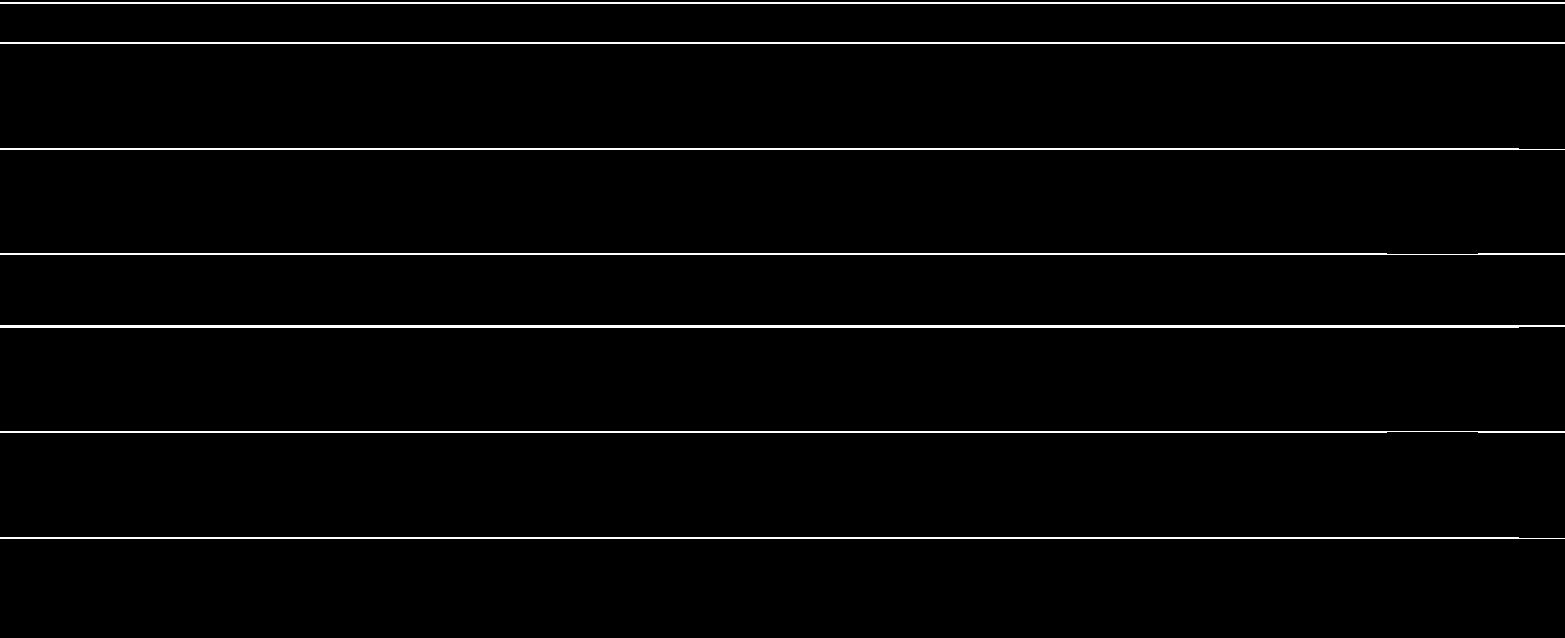

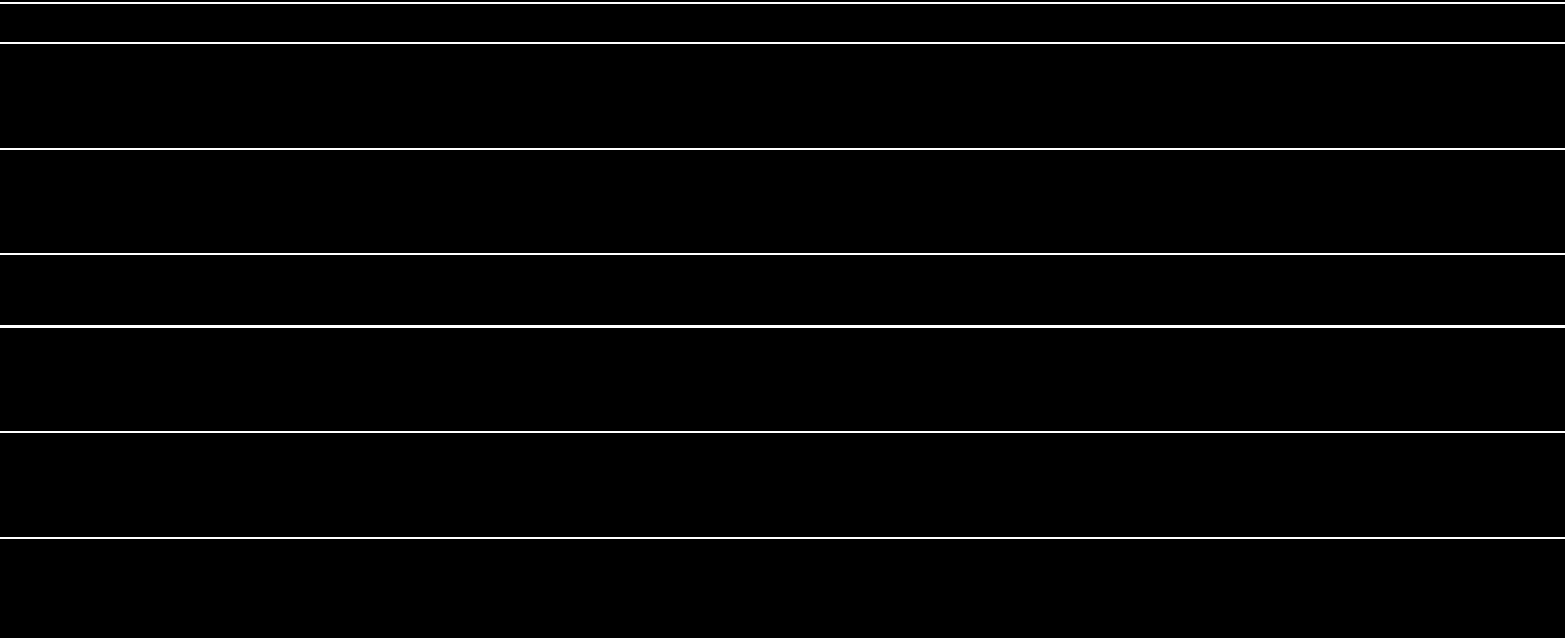

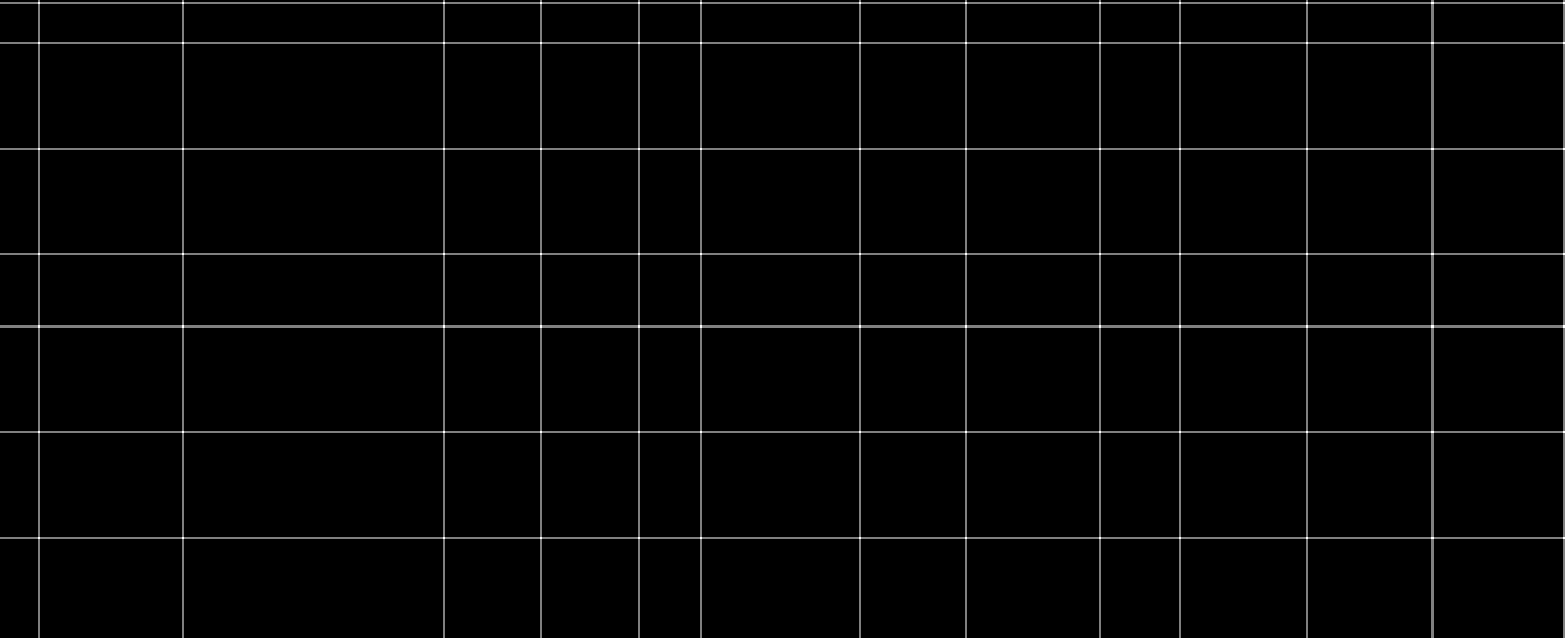

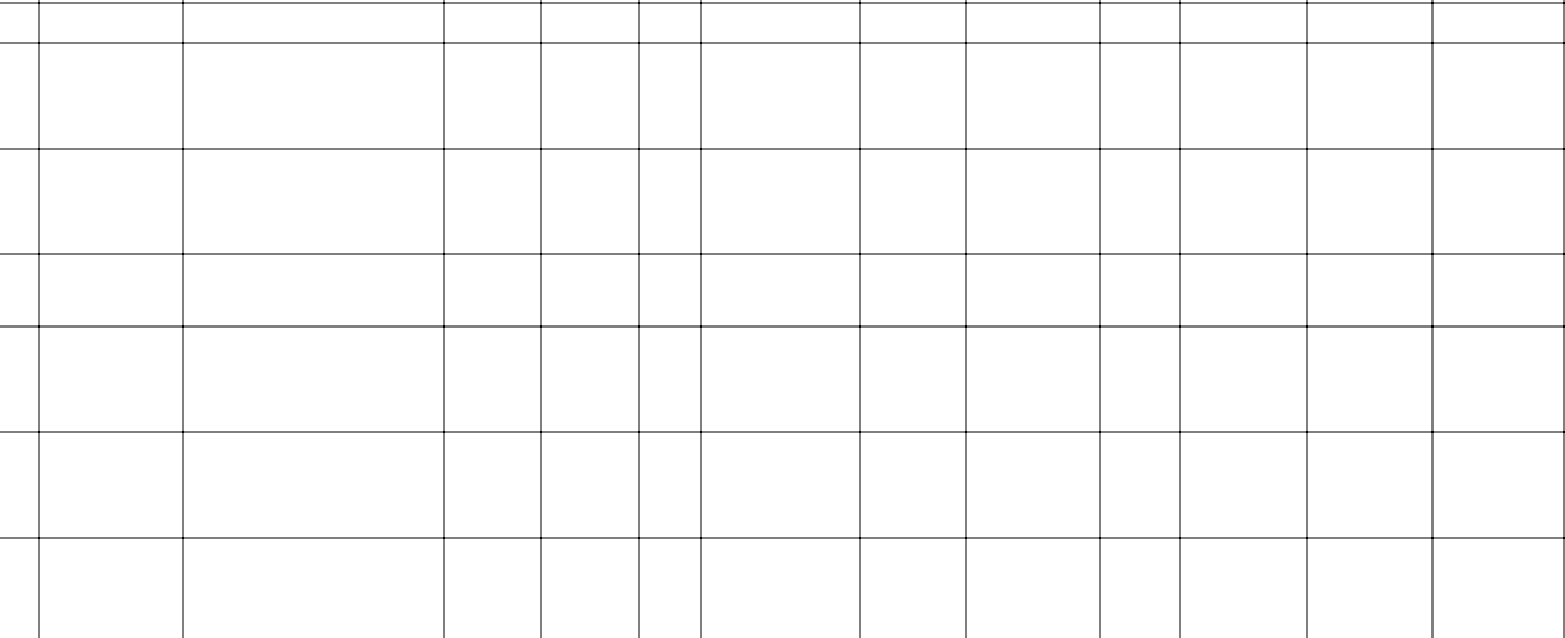

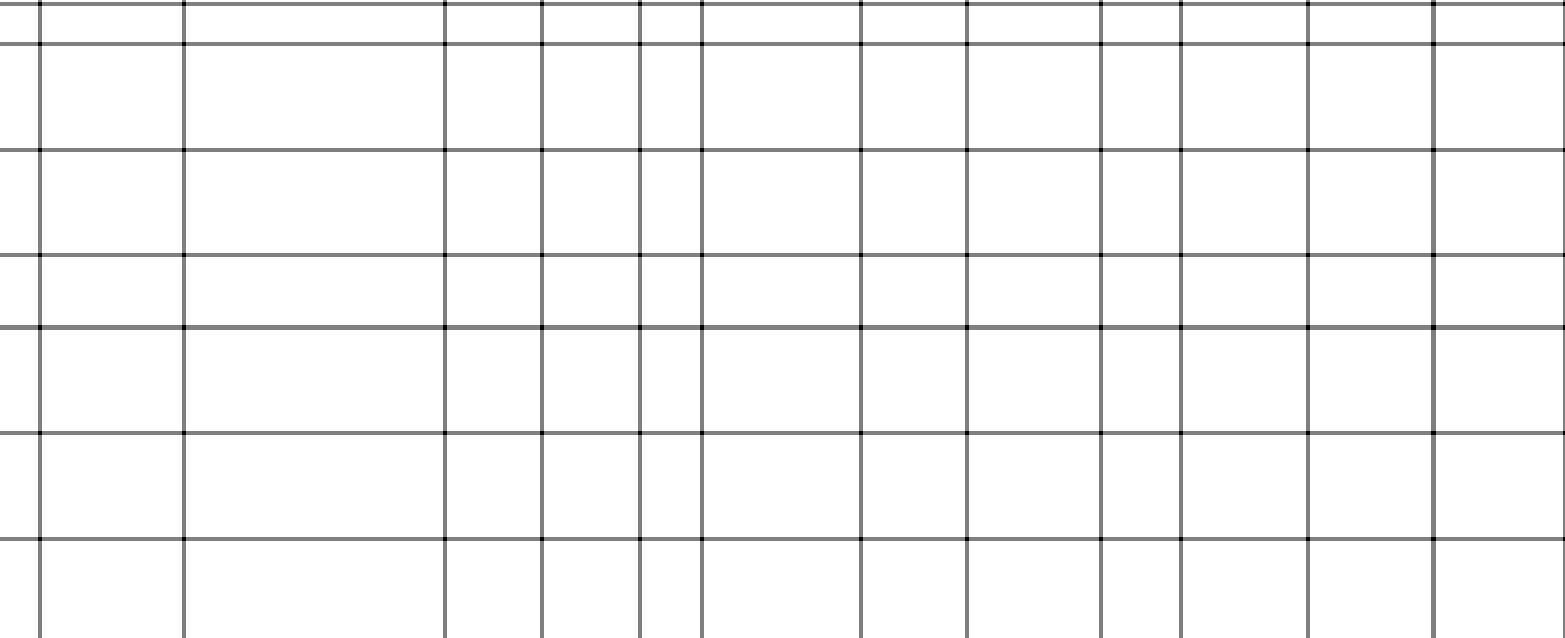

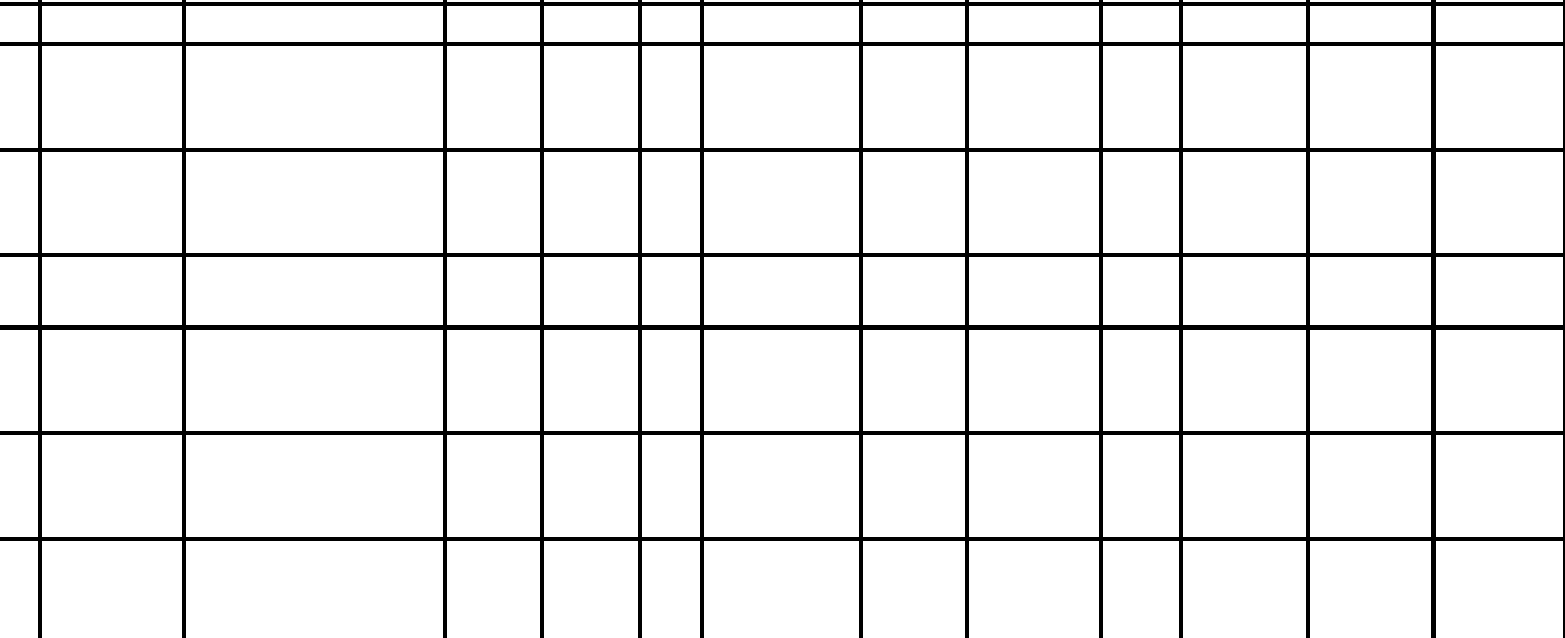

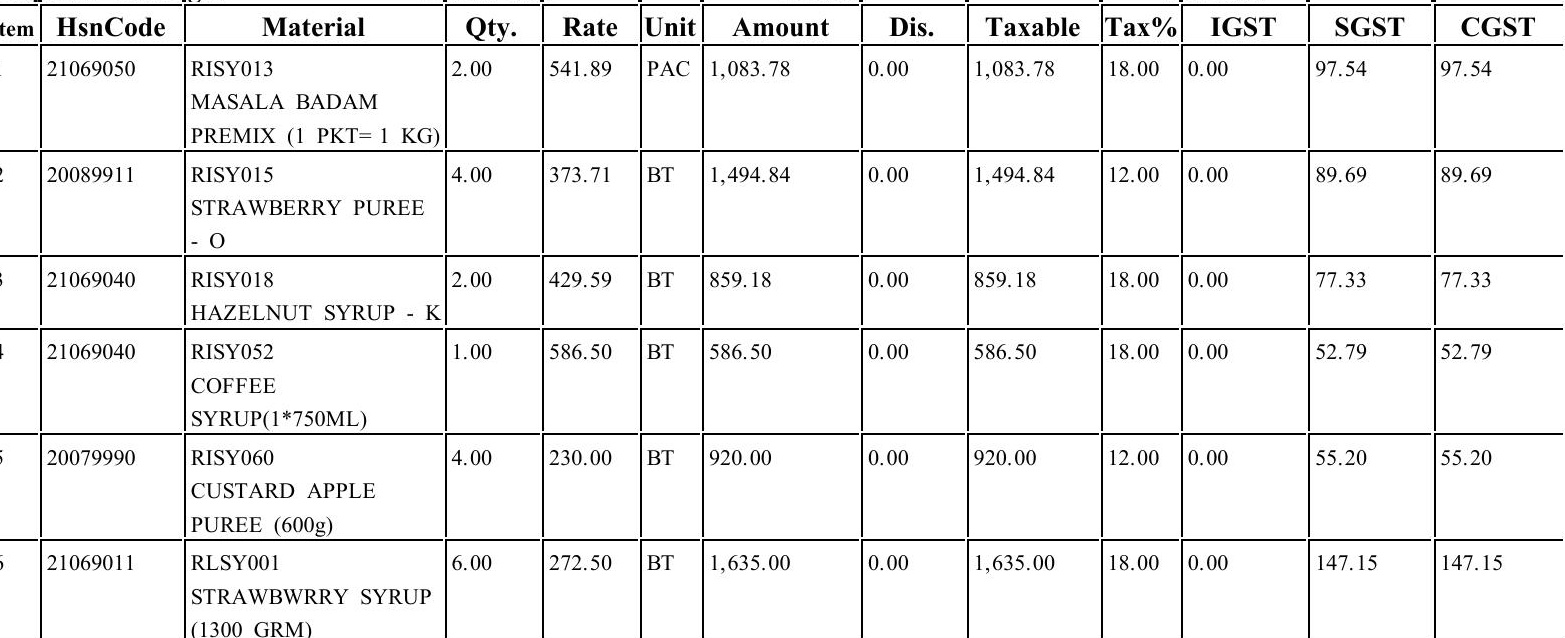

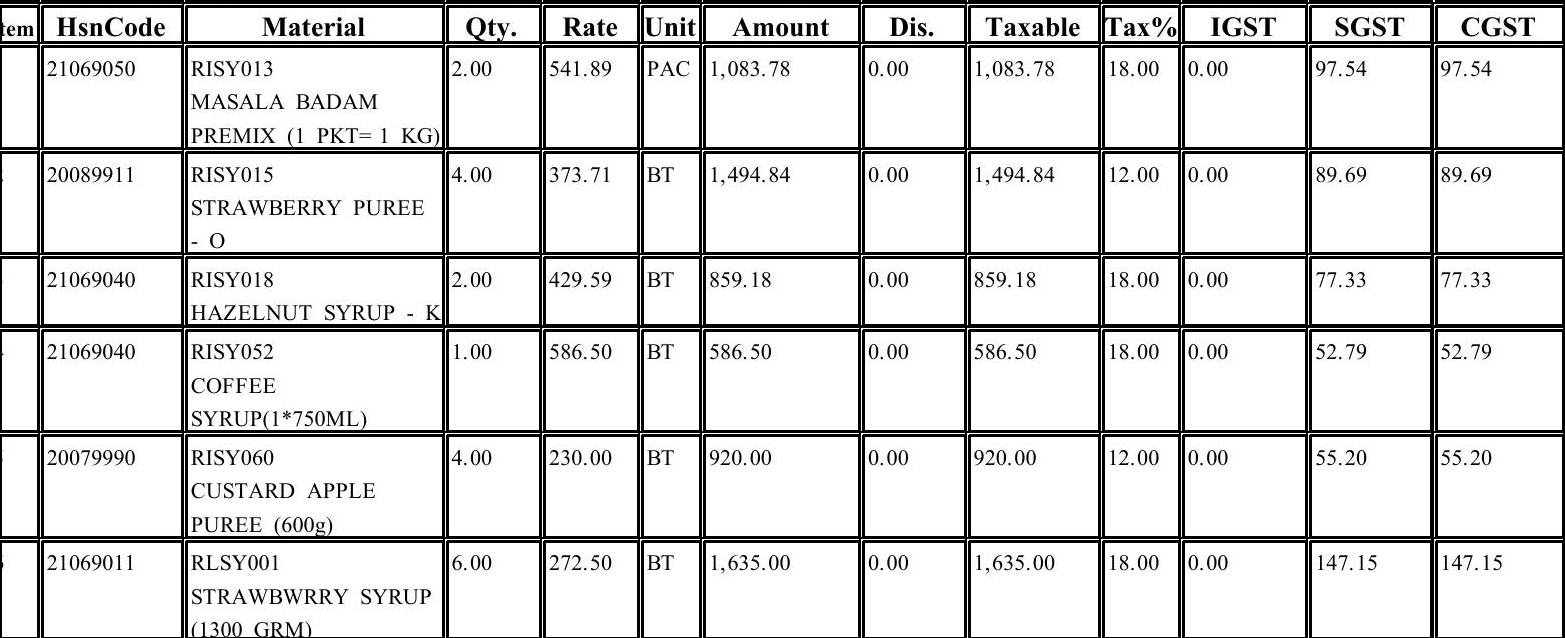

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
      0  1          2  3                                             4  5   \
0    tem       HsnCode                                         Material      
1             21069050      RISY013\nMASALA BADAM\nPREMIX (1 PKT= 1 KG)      
2             20089911                   RISYO15\nSTRAWBERRY PUREE\n= 6      
3             21069040                      RISY018\nHAZELNUT SYRUP - K      
4             21069040                  RISY052\nCOFFEE\nSYRUP(1*750ML)      
5             20079990              RISY060\nCUSTARD APPLE\nPUREE (600)      
6             21069011            RLSY001\nSTRAWBWRRY SYRUP\n(1300 GRM)      

       6  7   

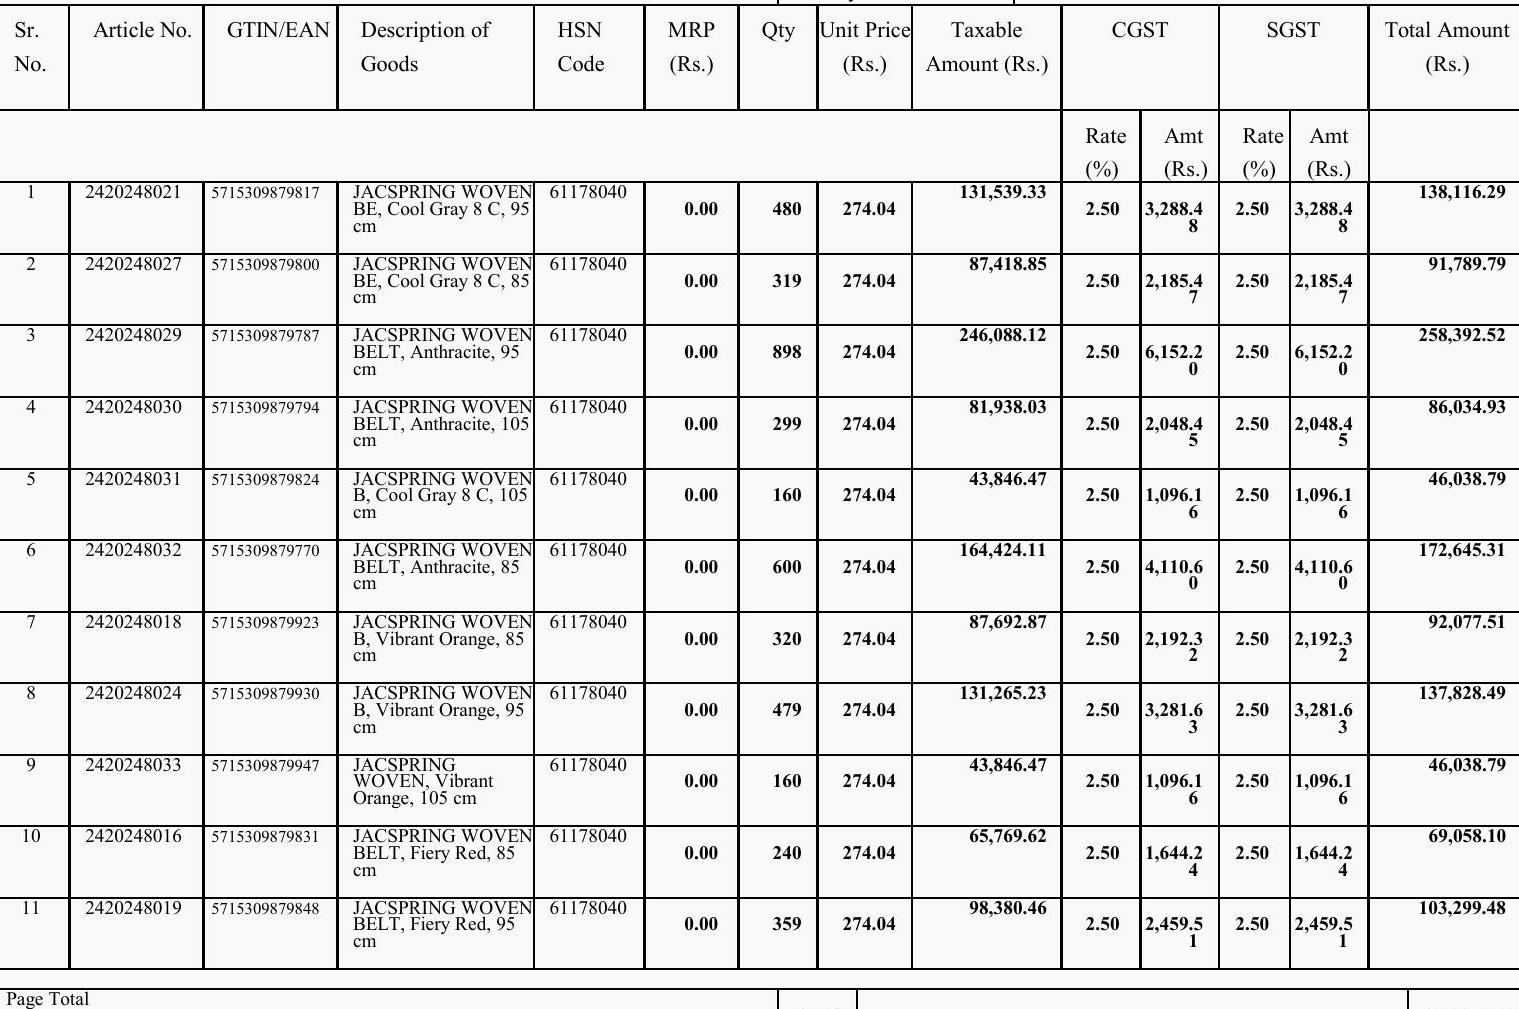

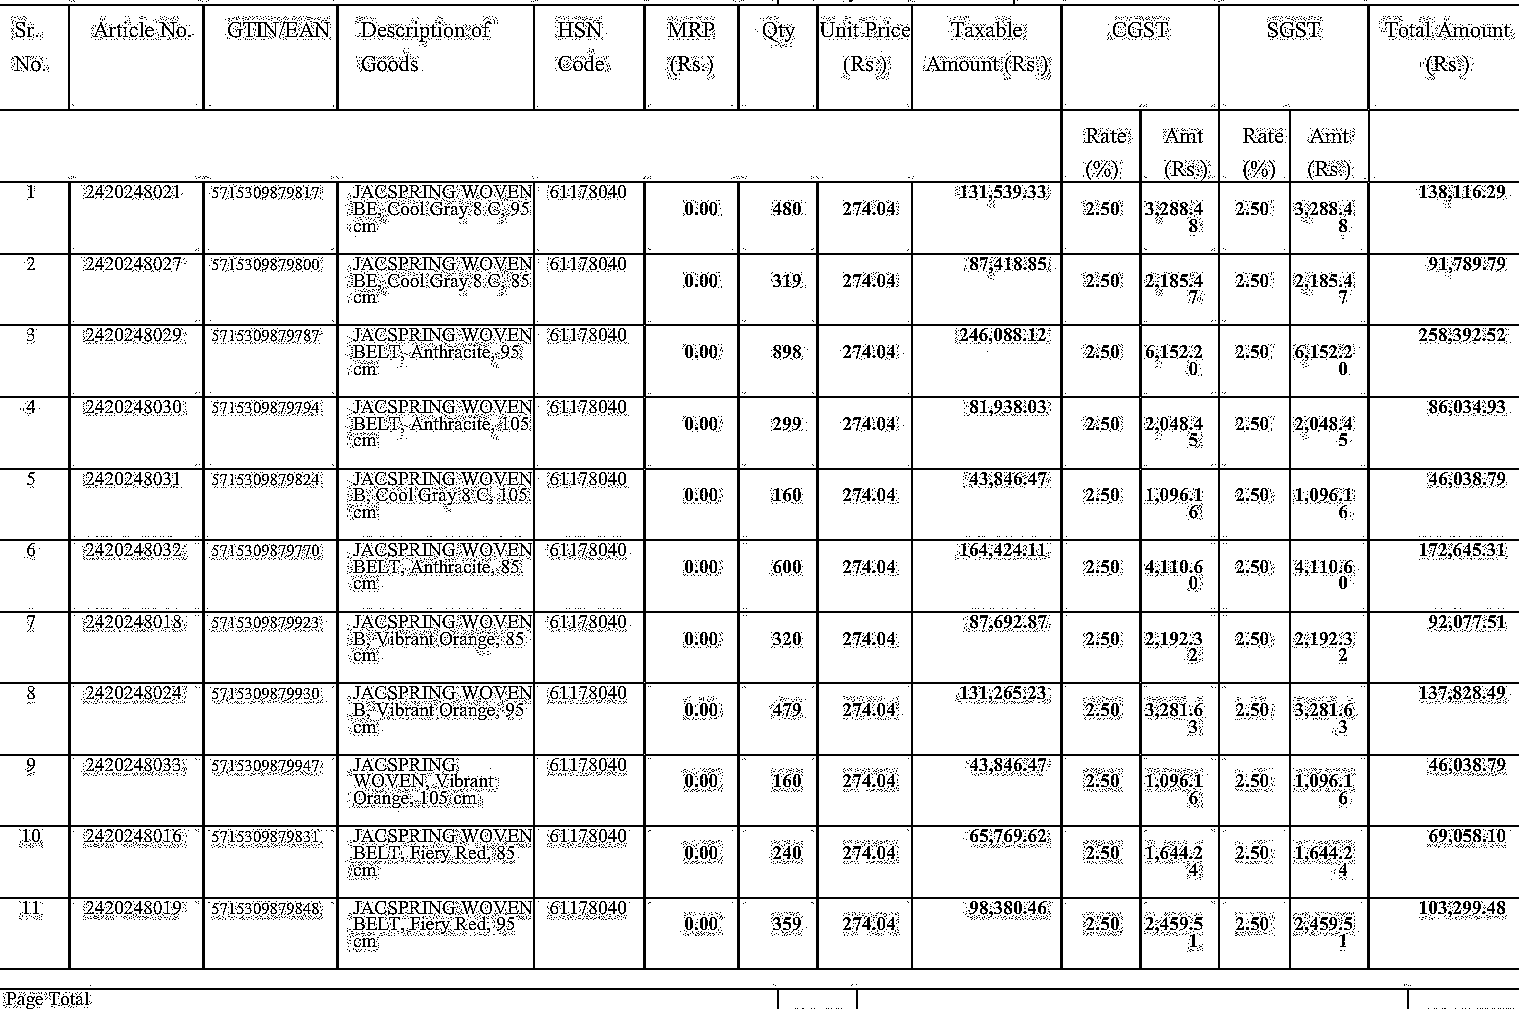

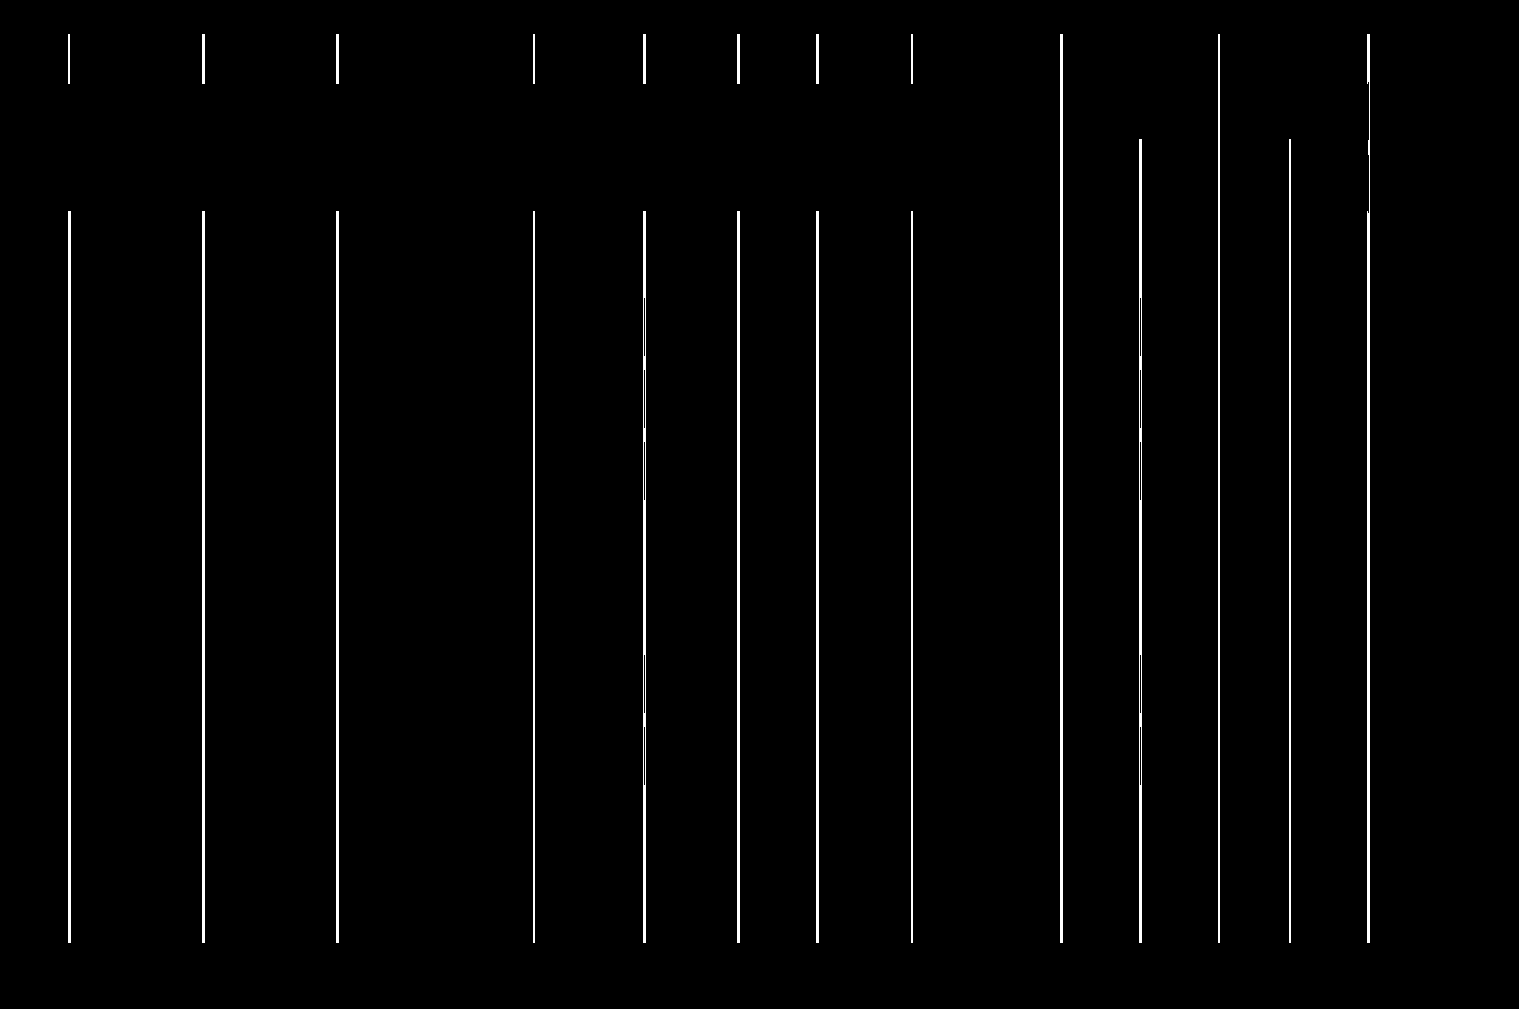

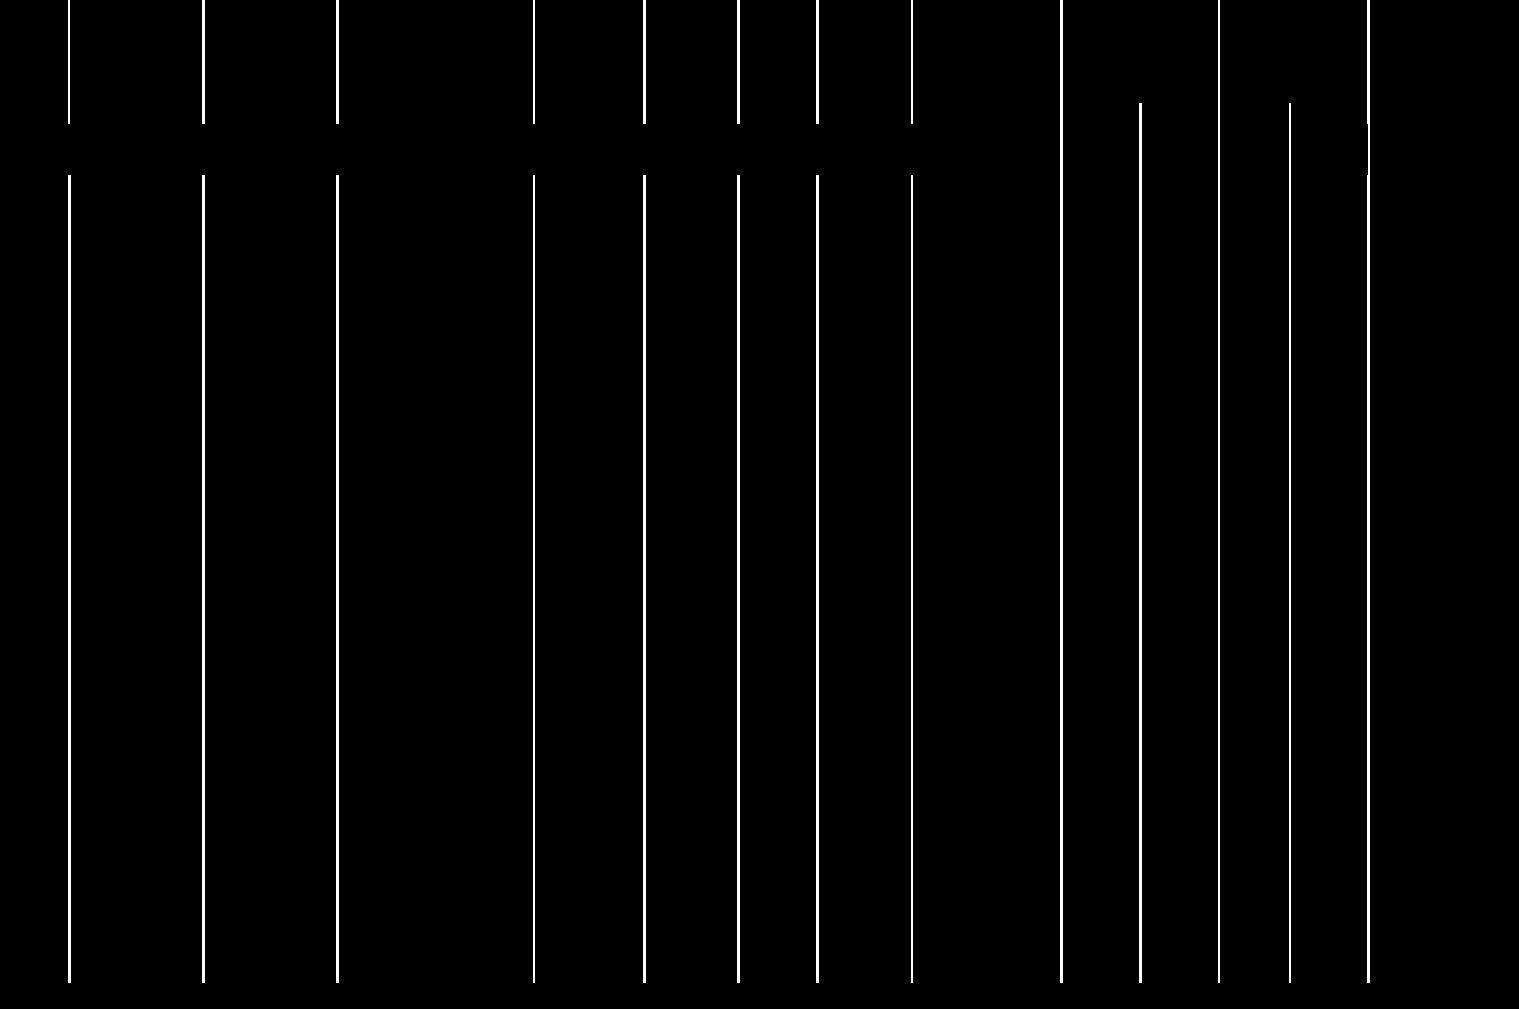

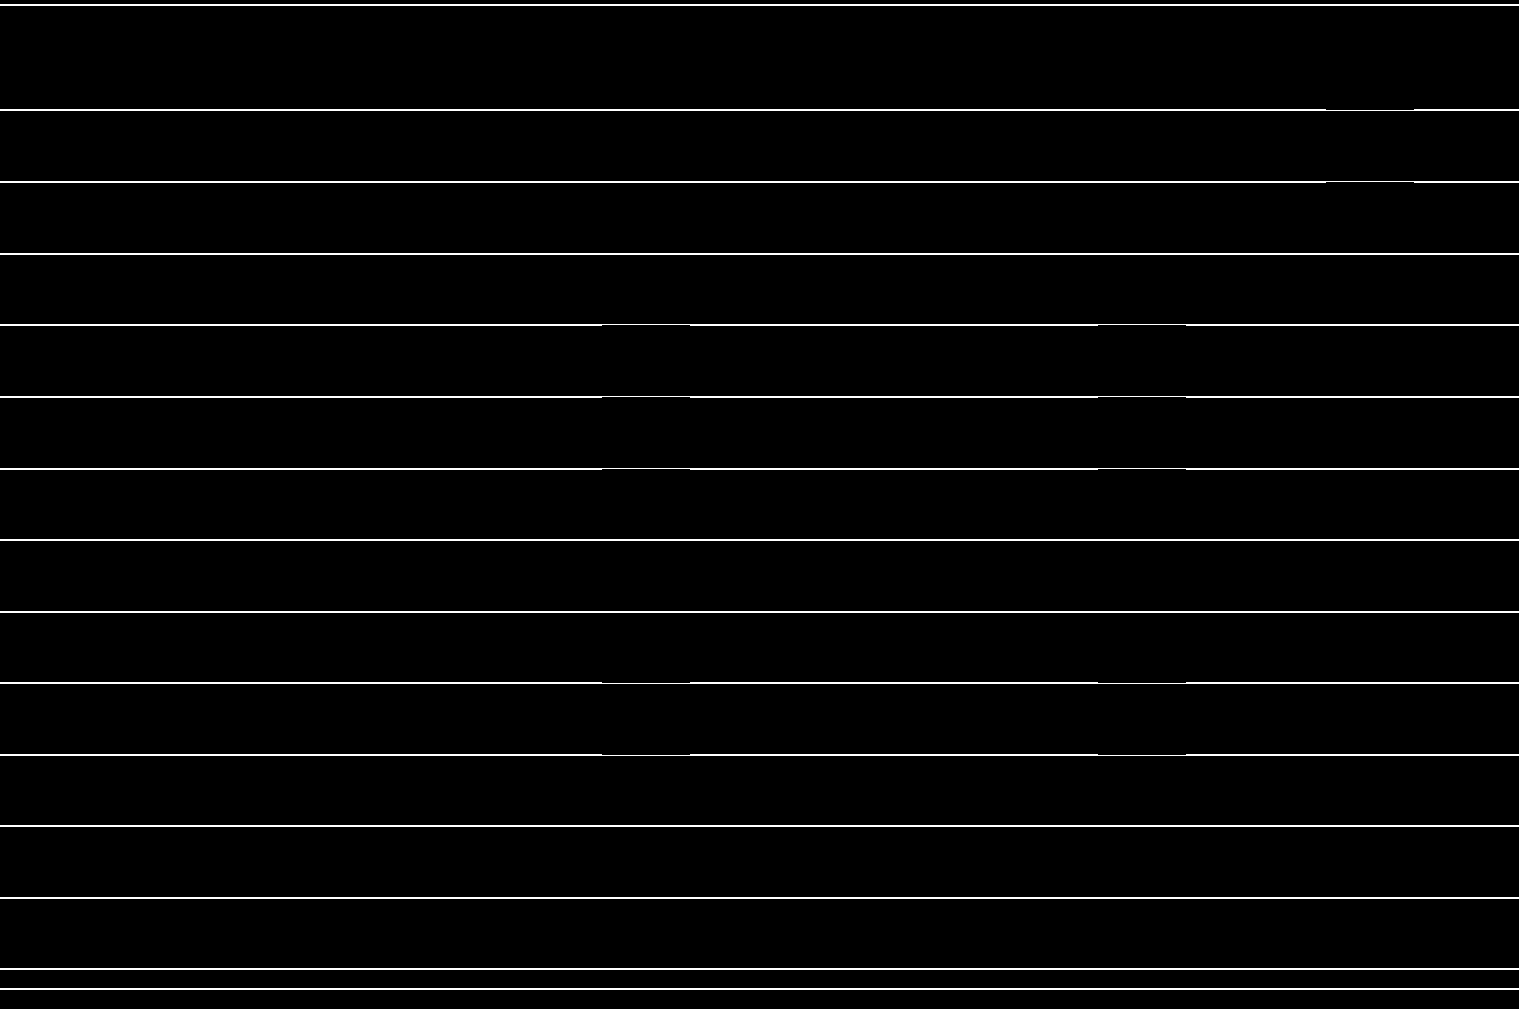

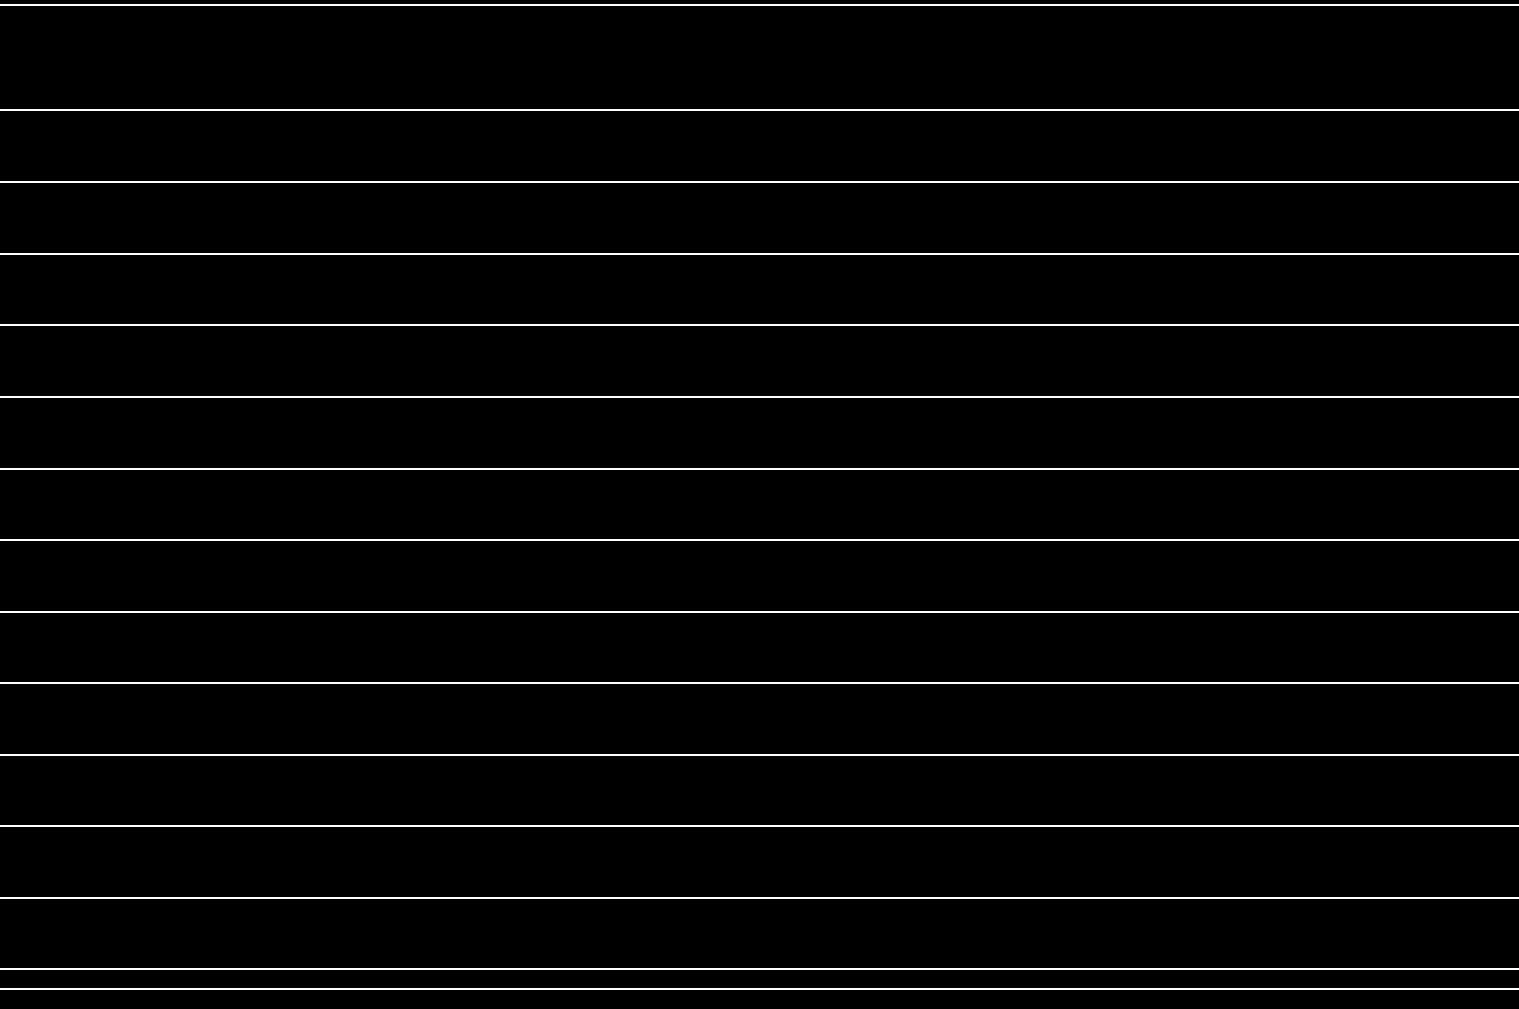

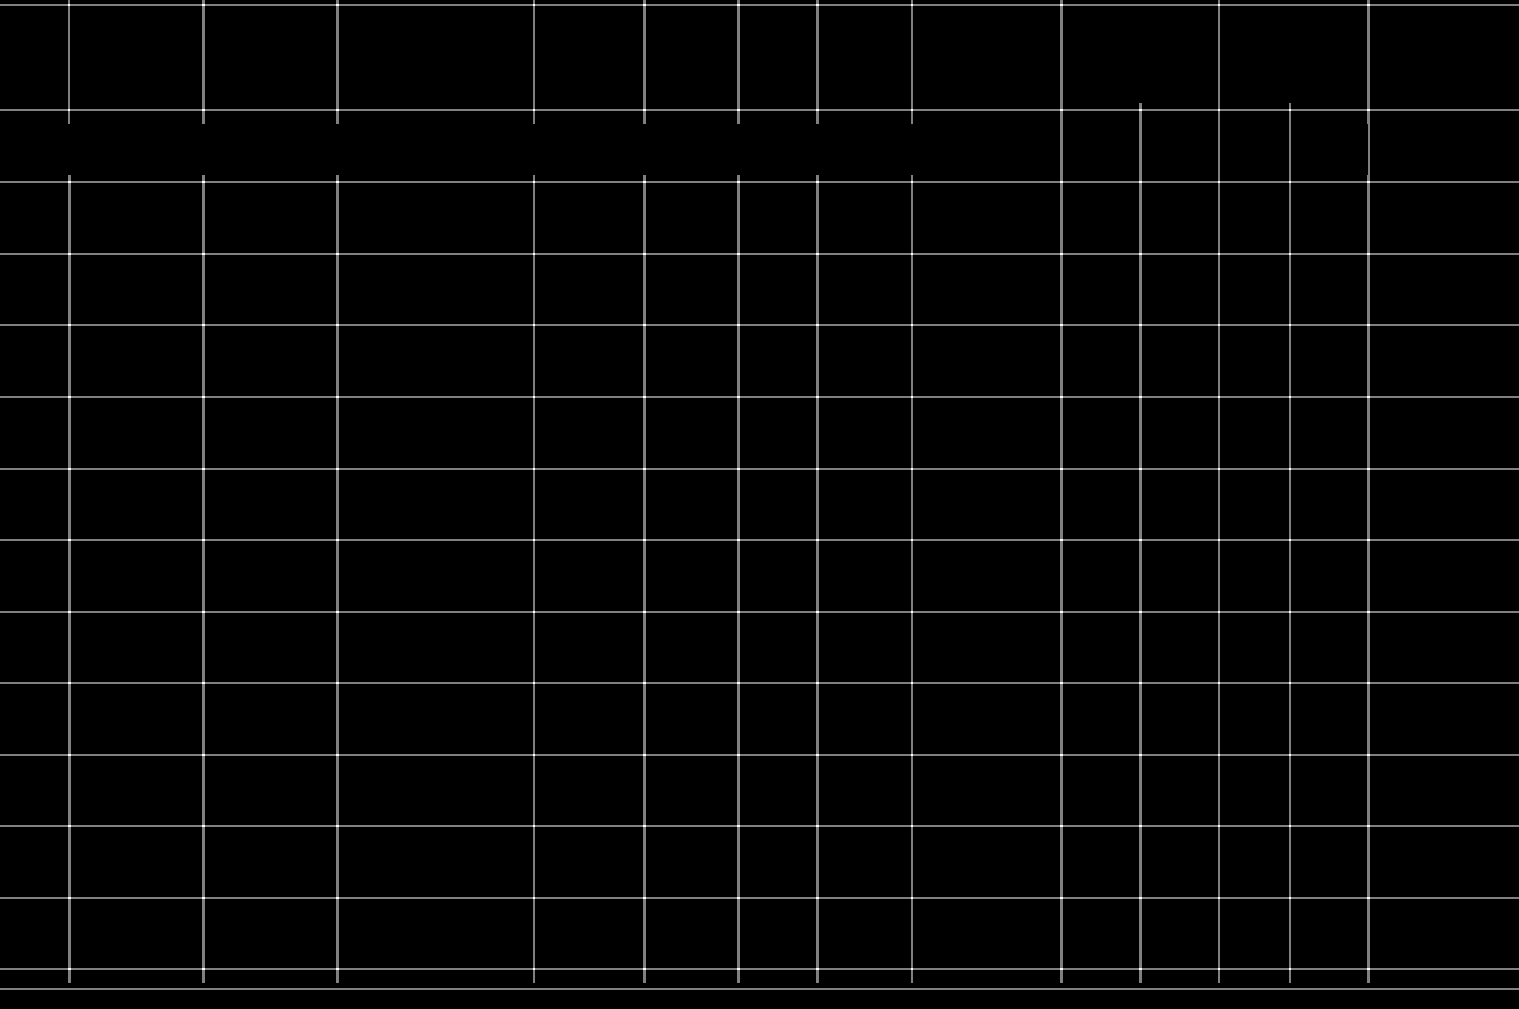

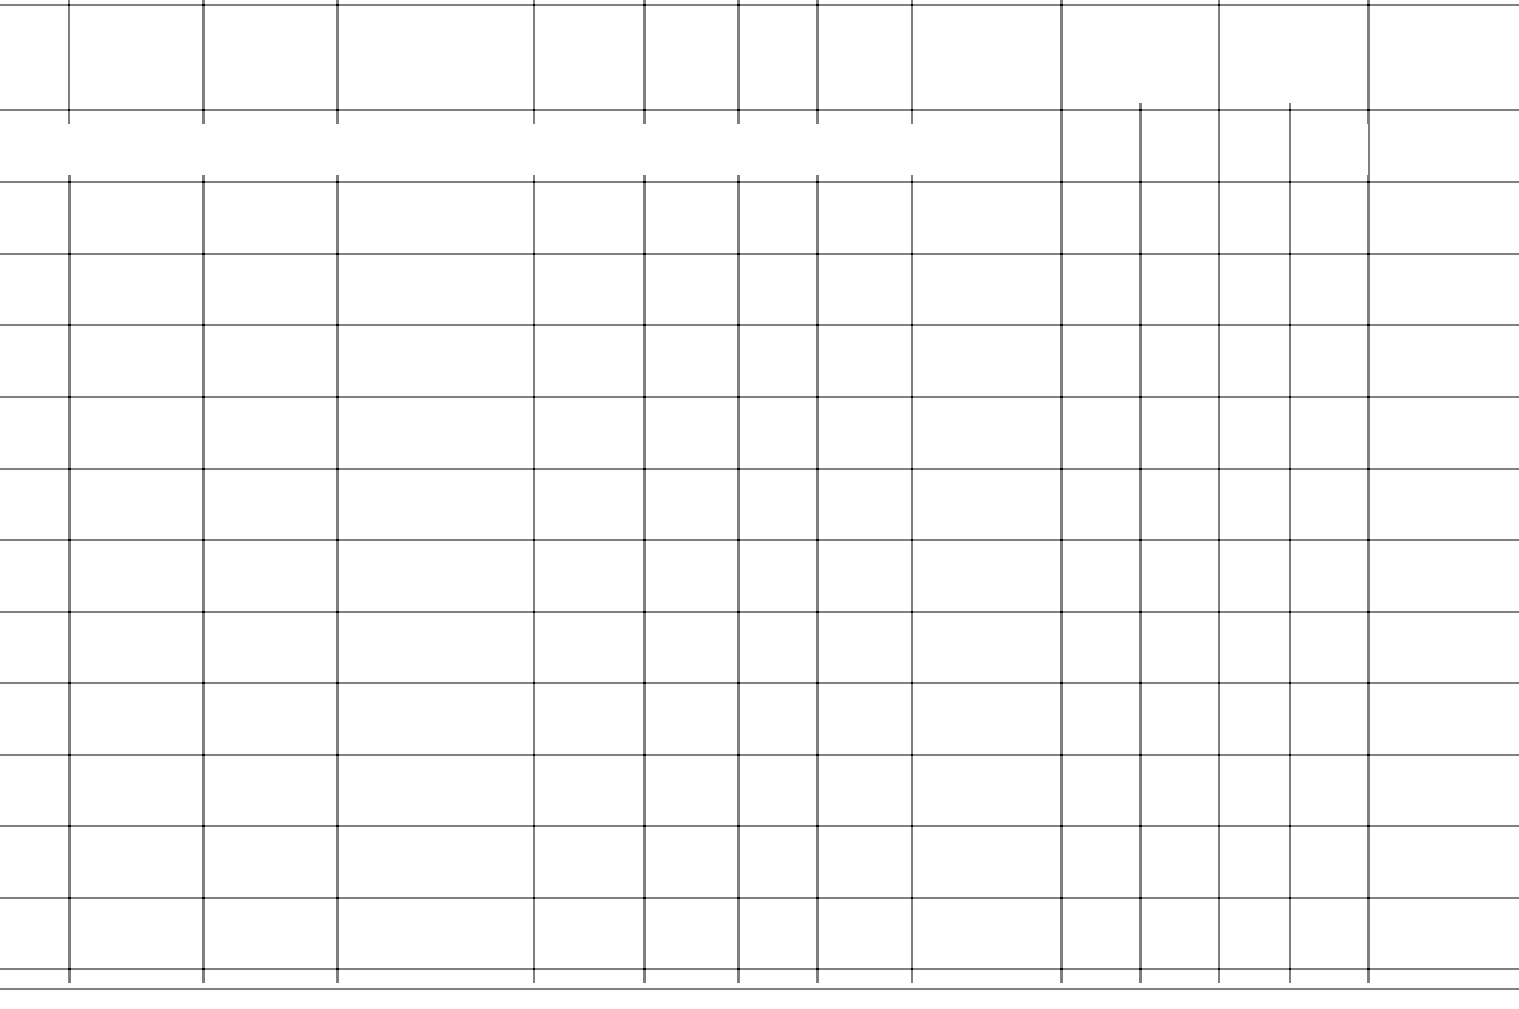

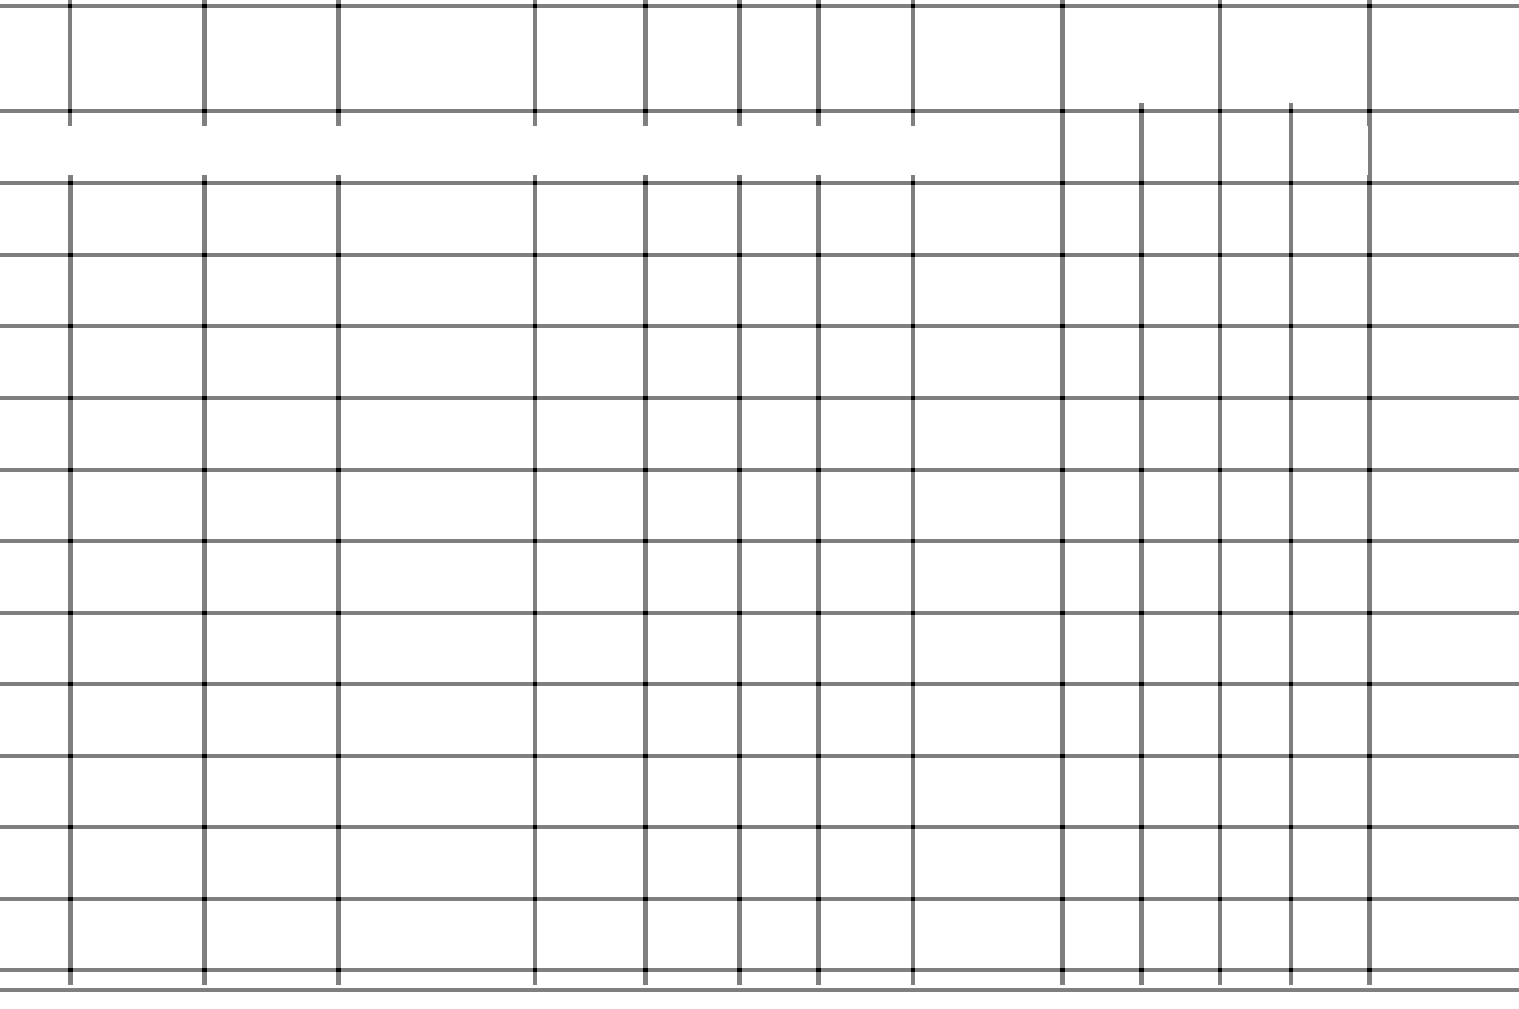

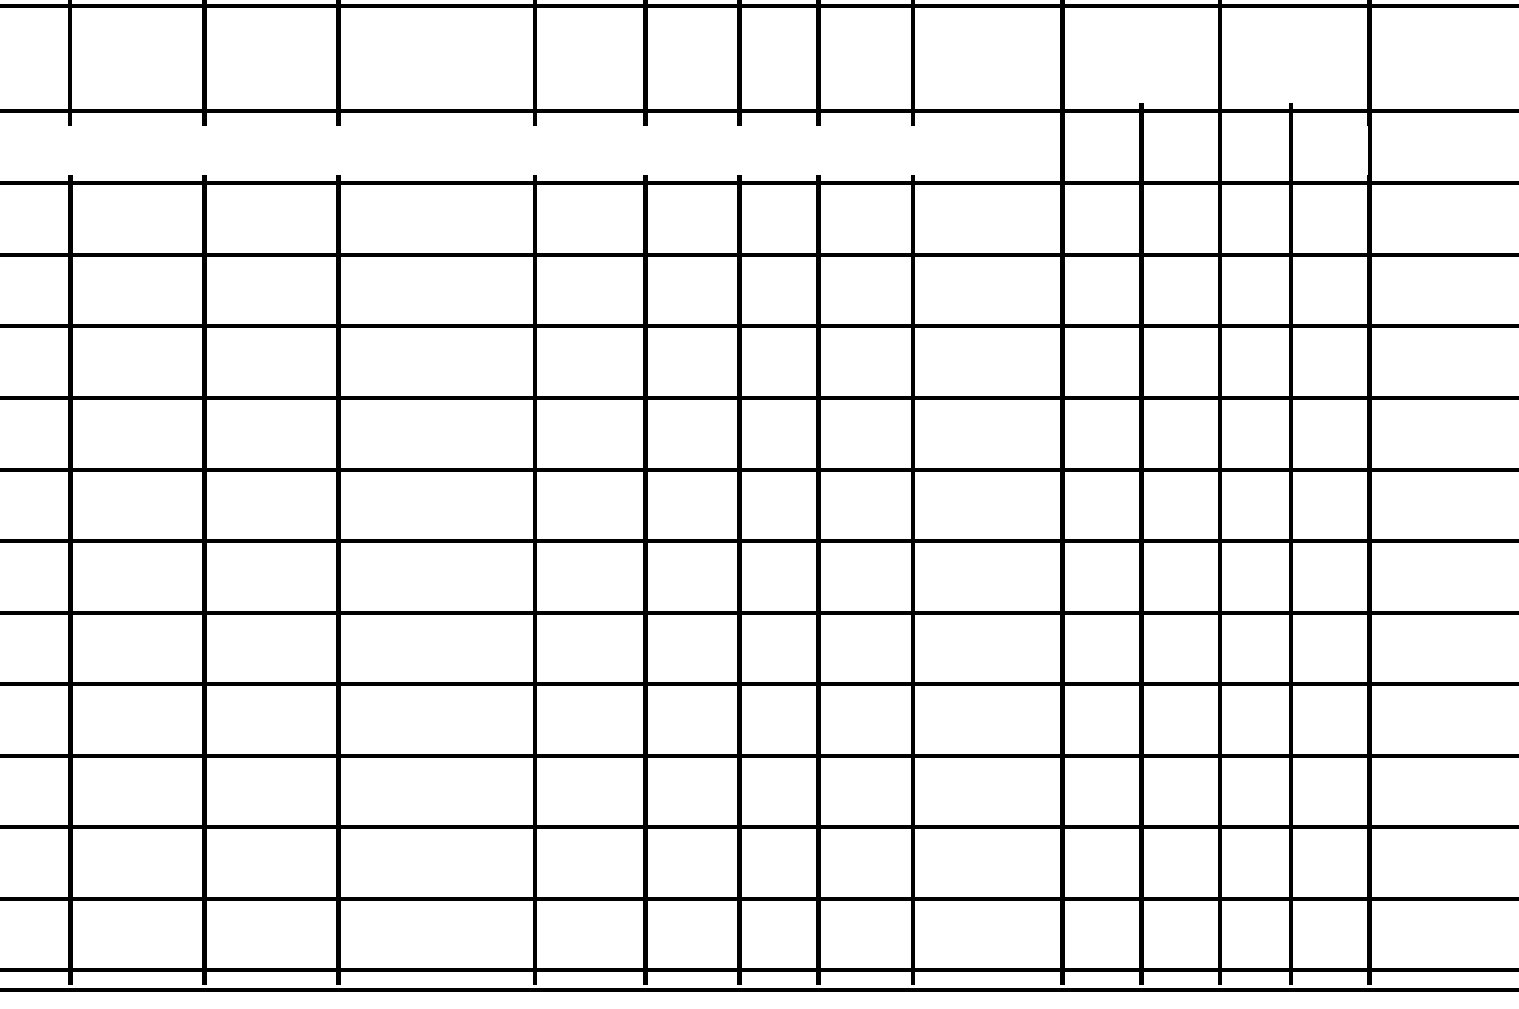

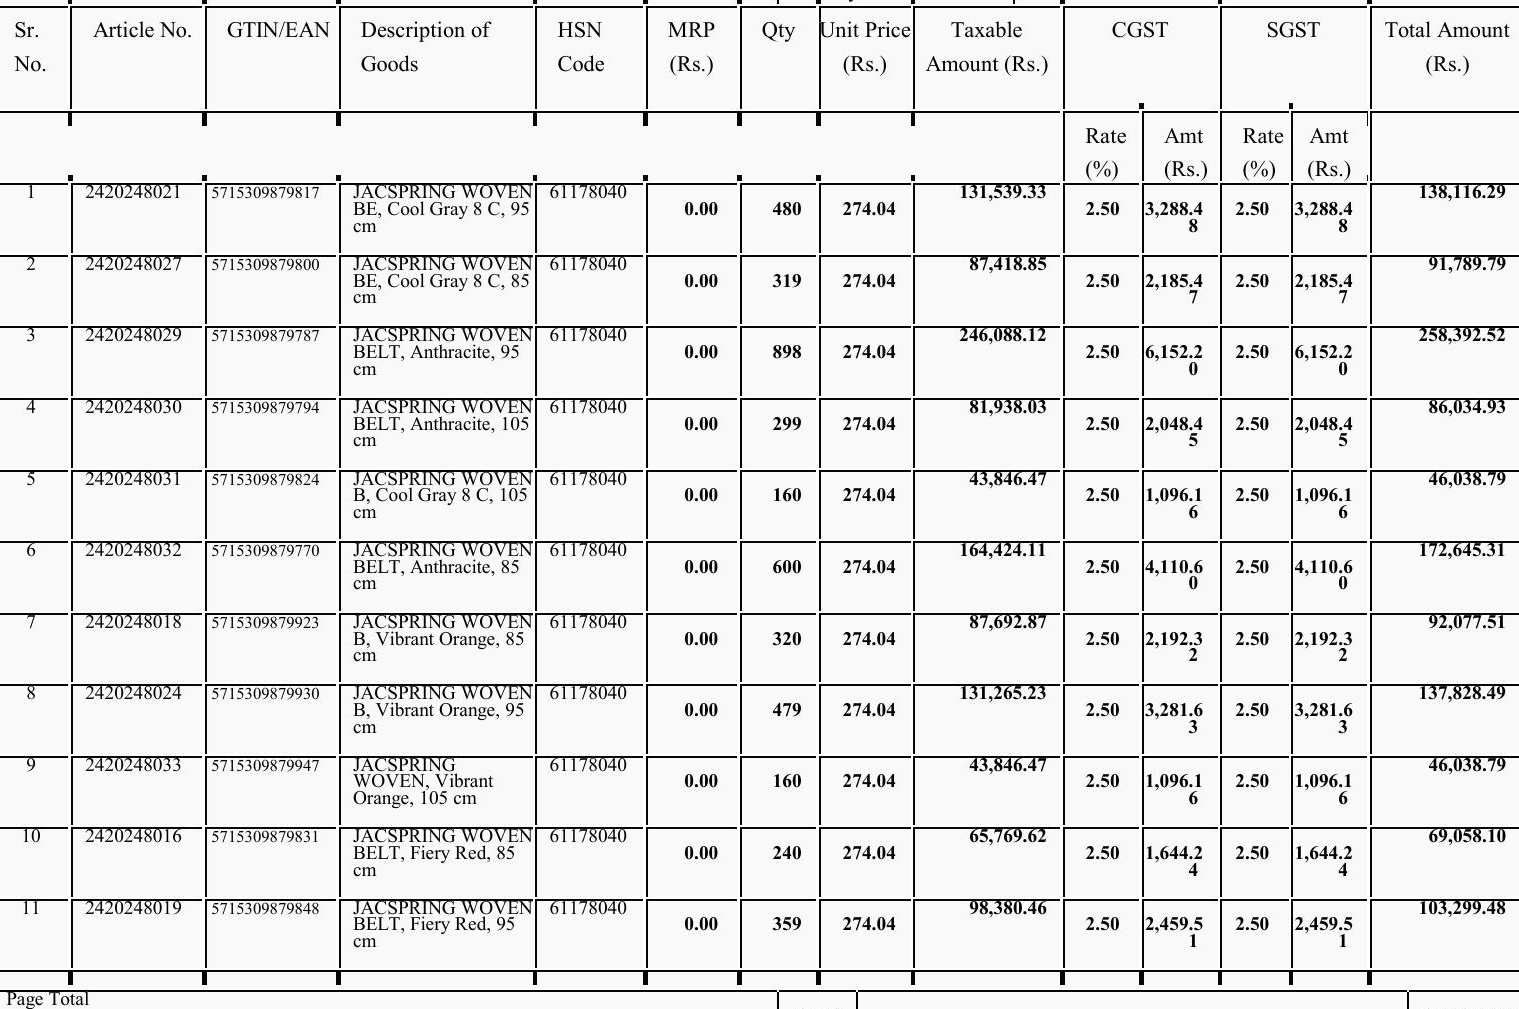

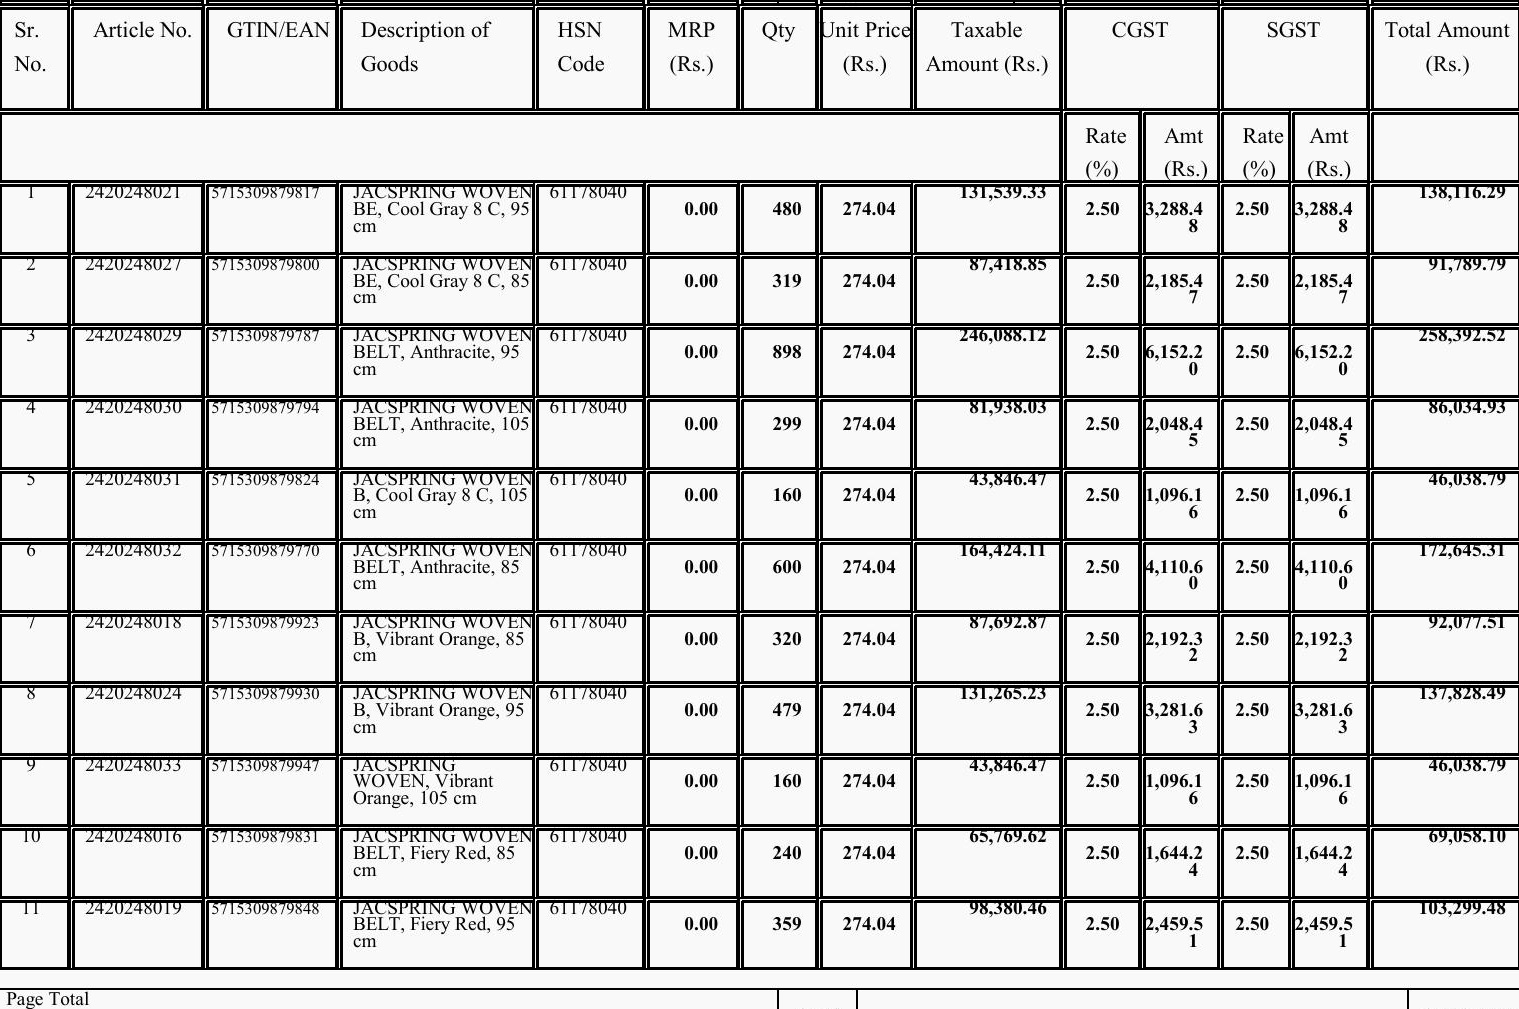

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
       0  1               2  3               4  5   \
0     Sr.        Article No.           GTIN/EAN      
1                                                    
2                242024802 1      5715309879817      
3                242024802 /      5715309879800      
4                 2420248029      5715309879787      
5                24202480350      5715309879794      
6                2420

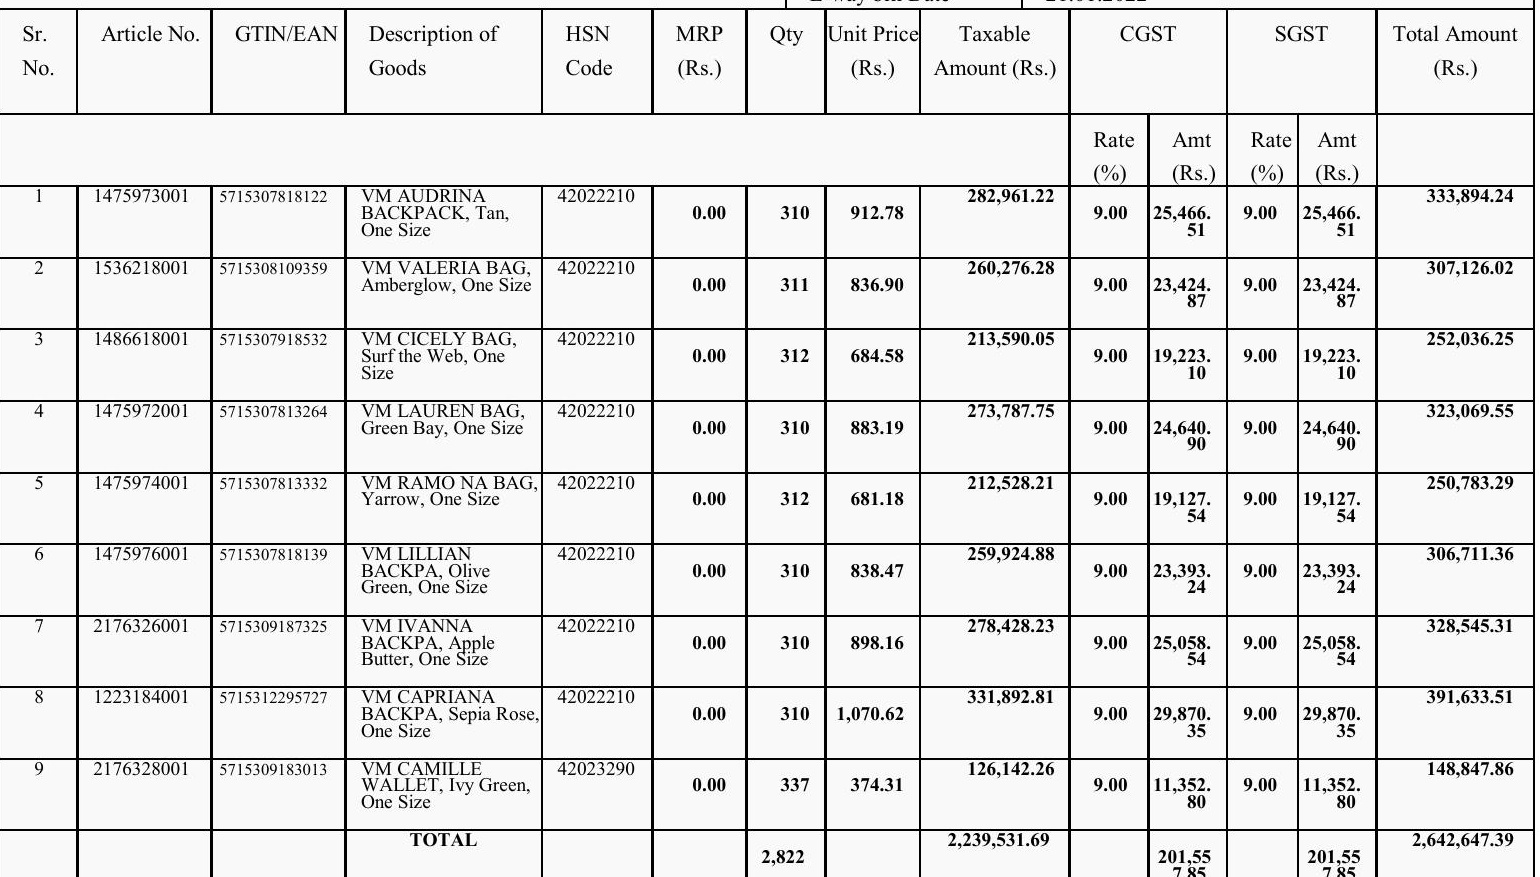

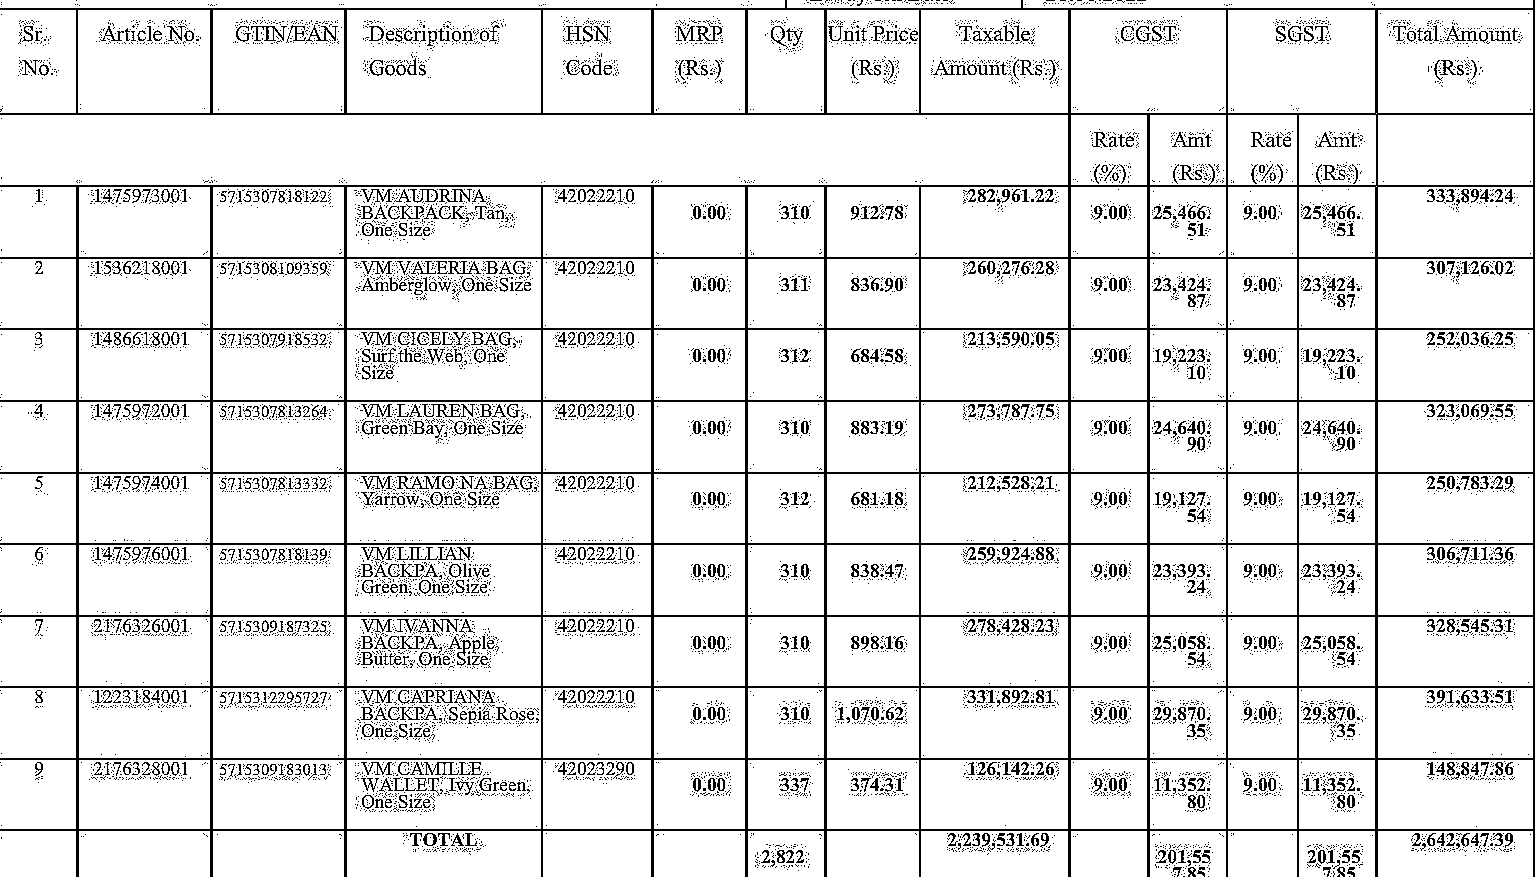

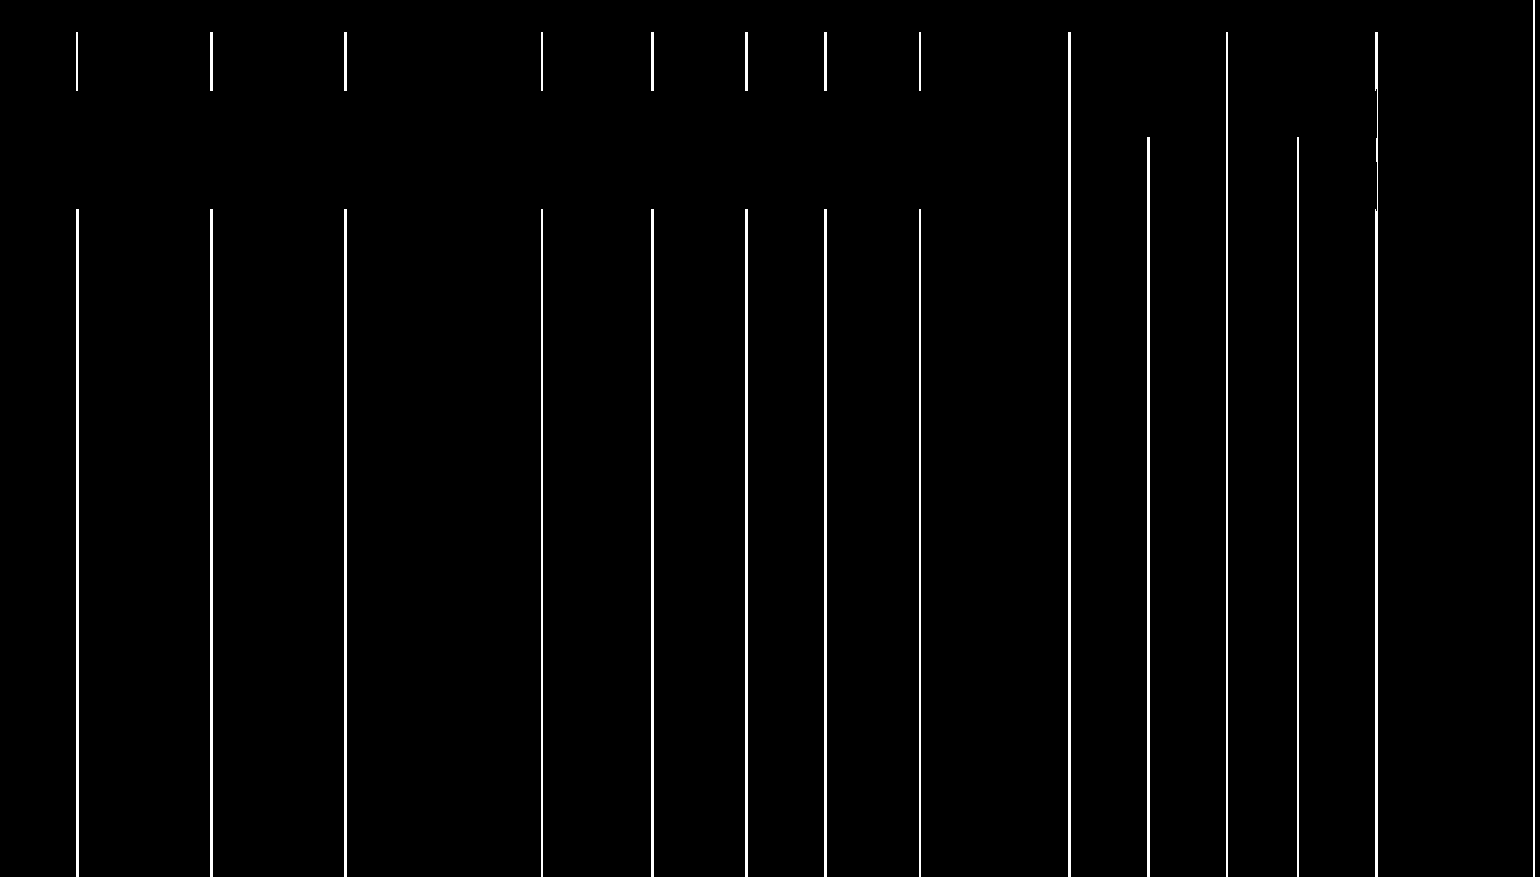

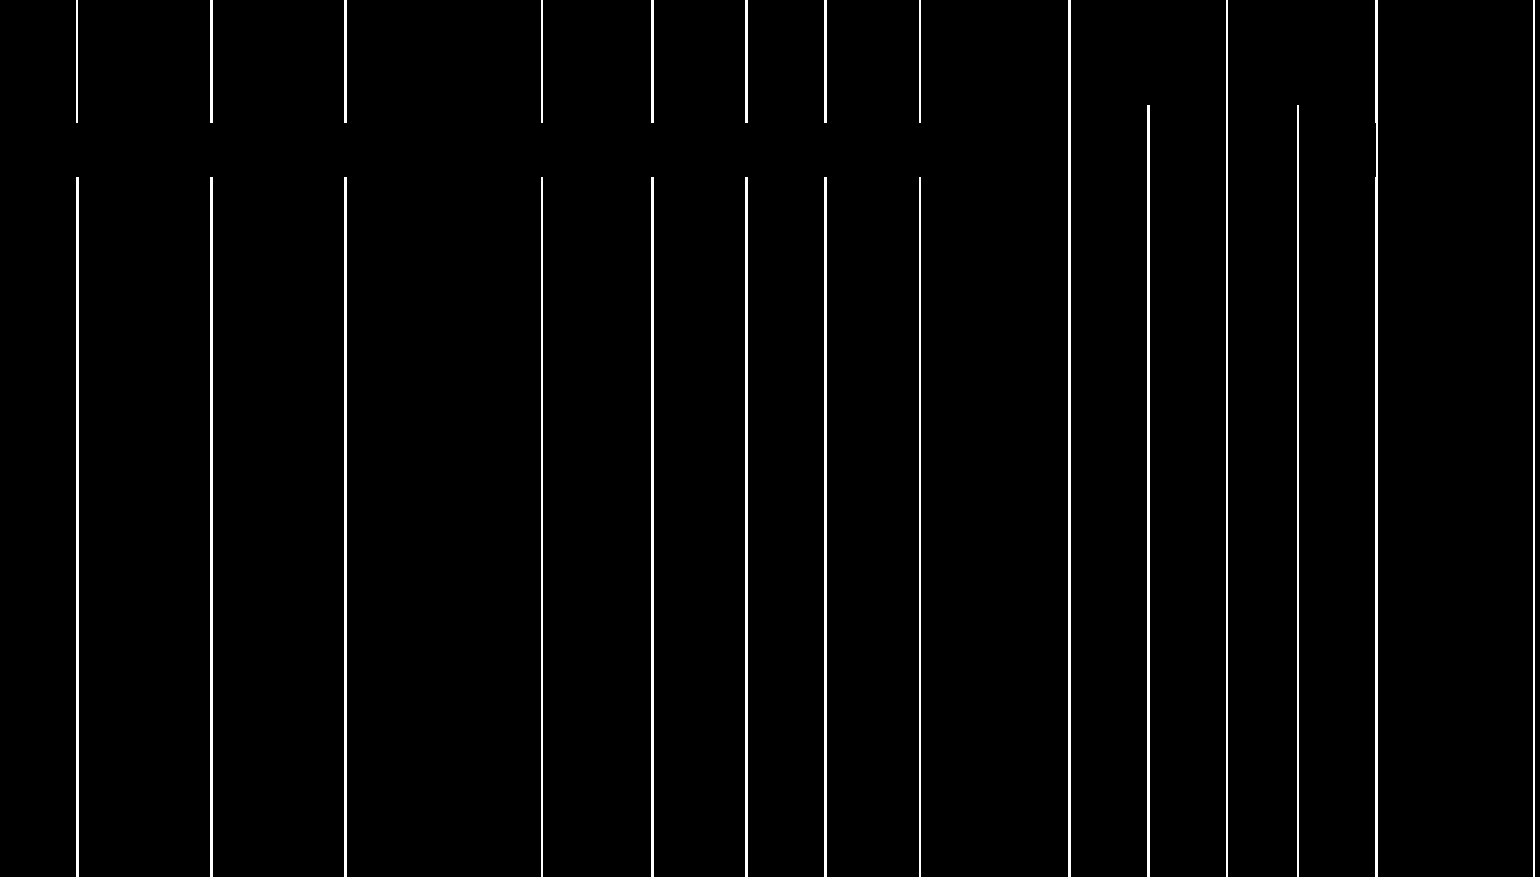

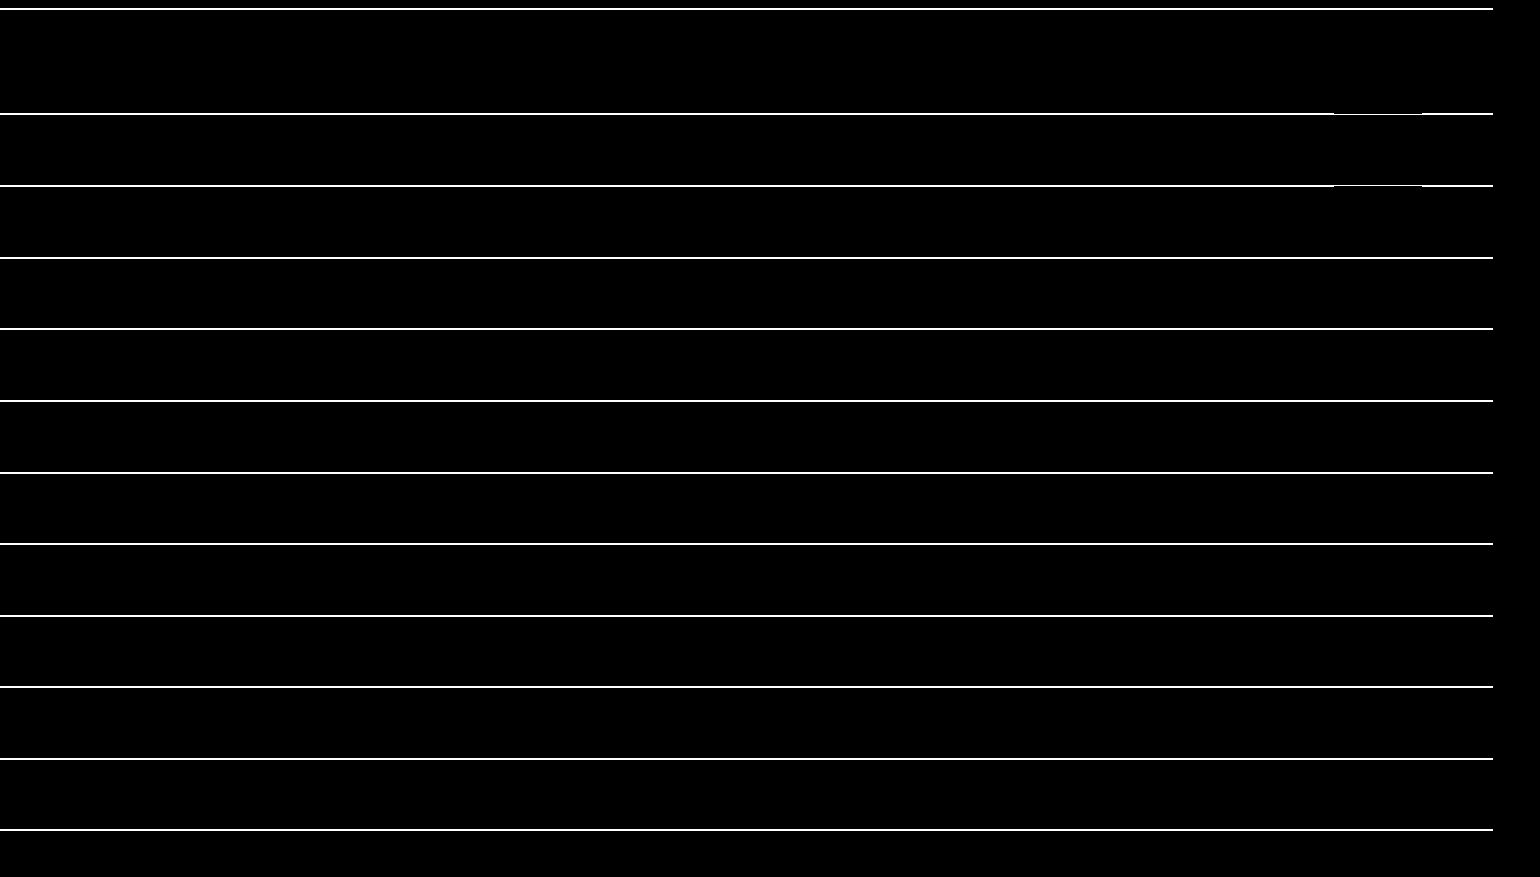

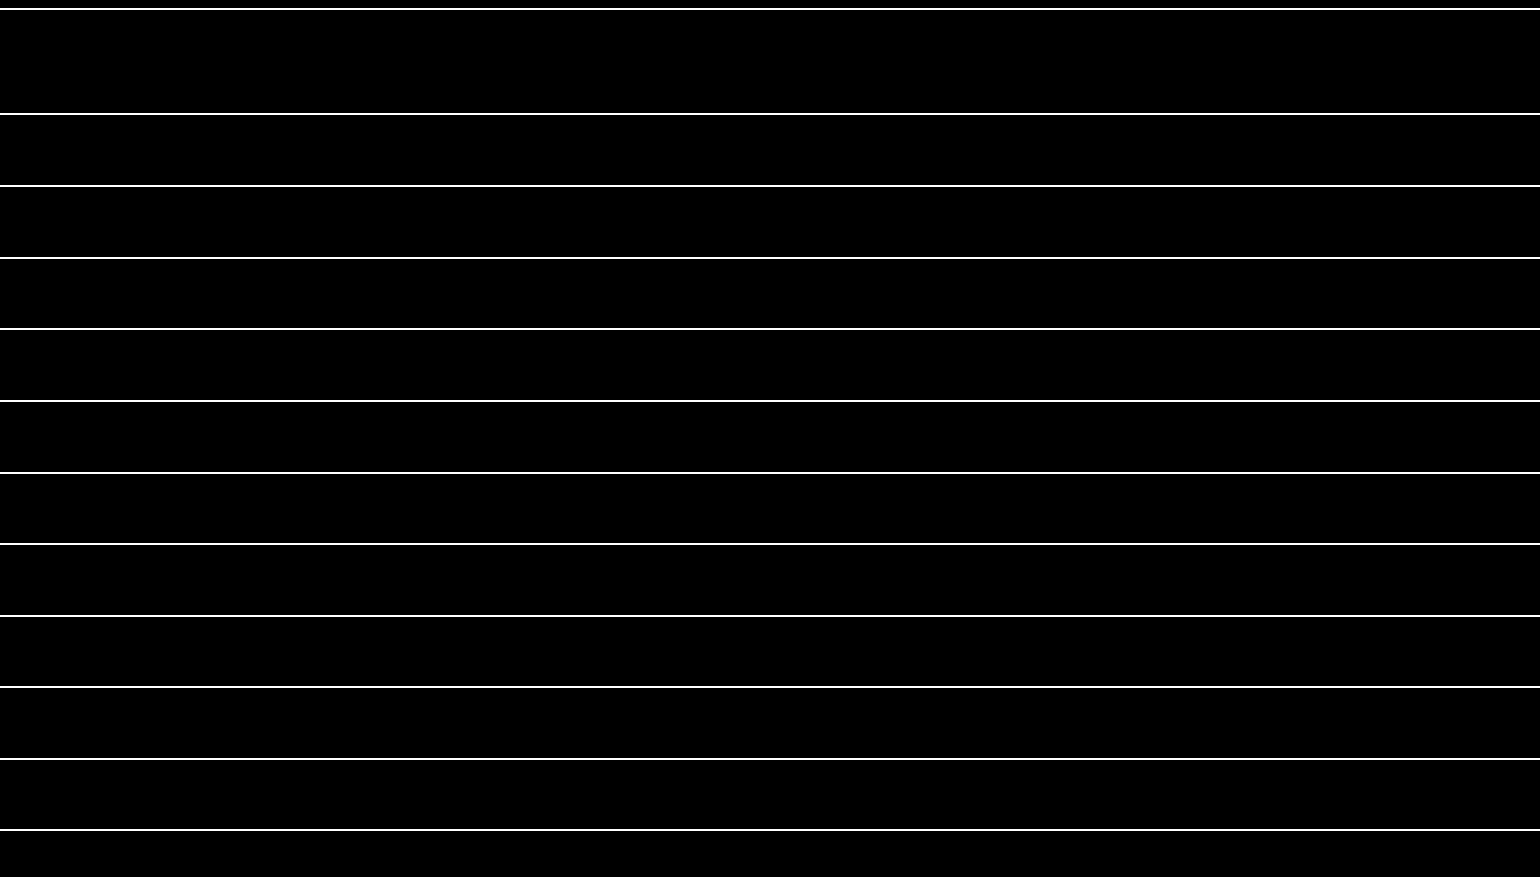

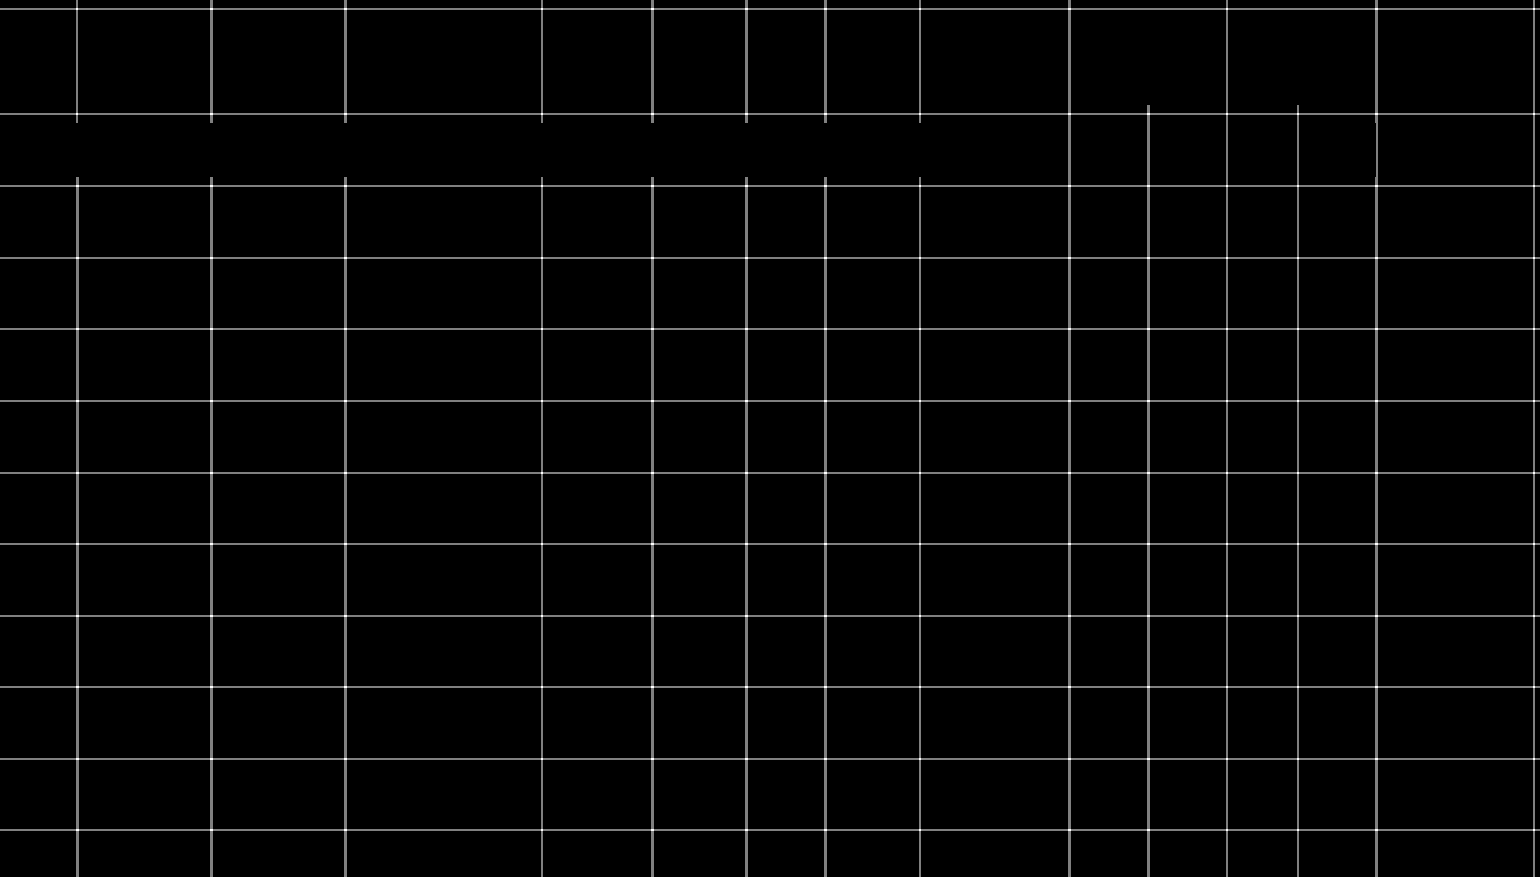

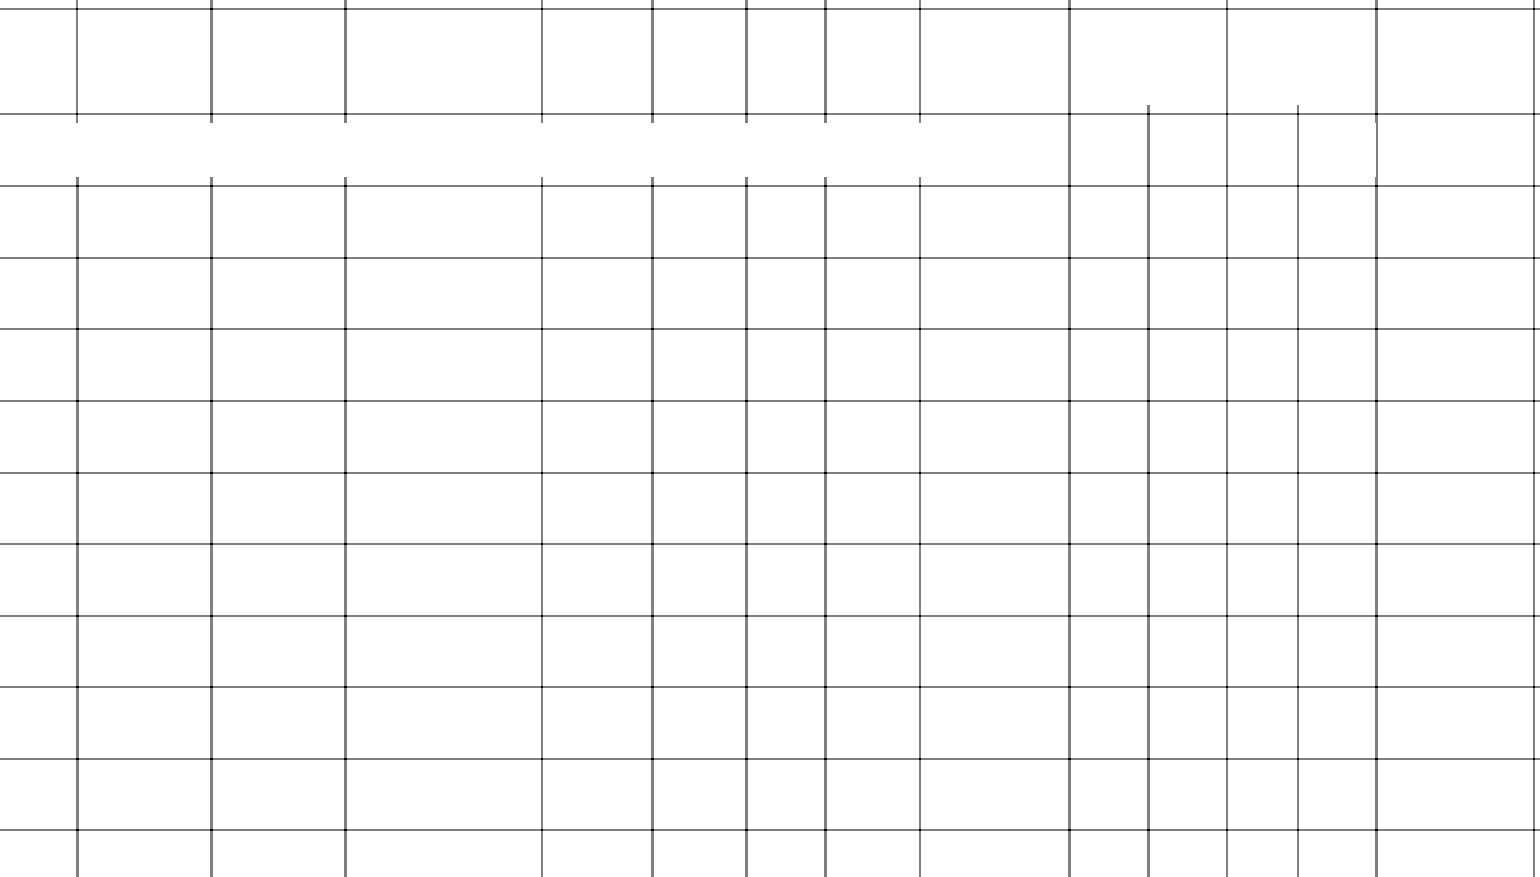

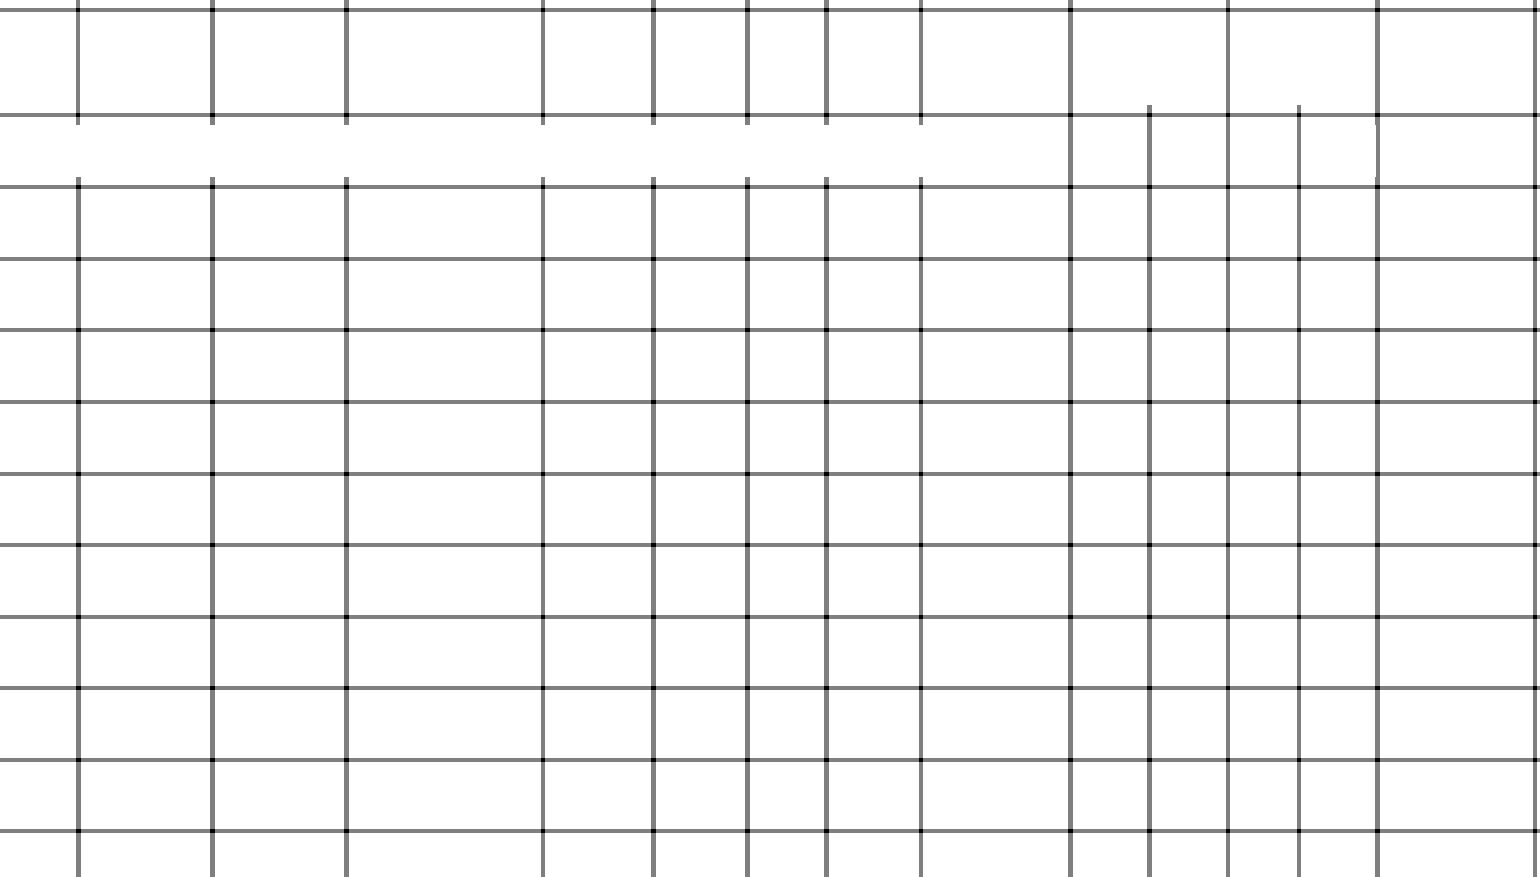

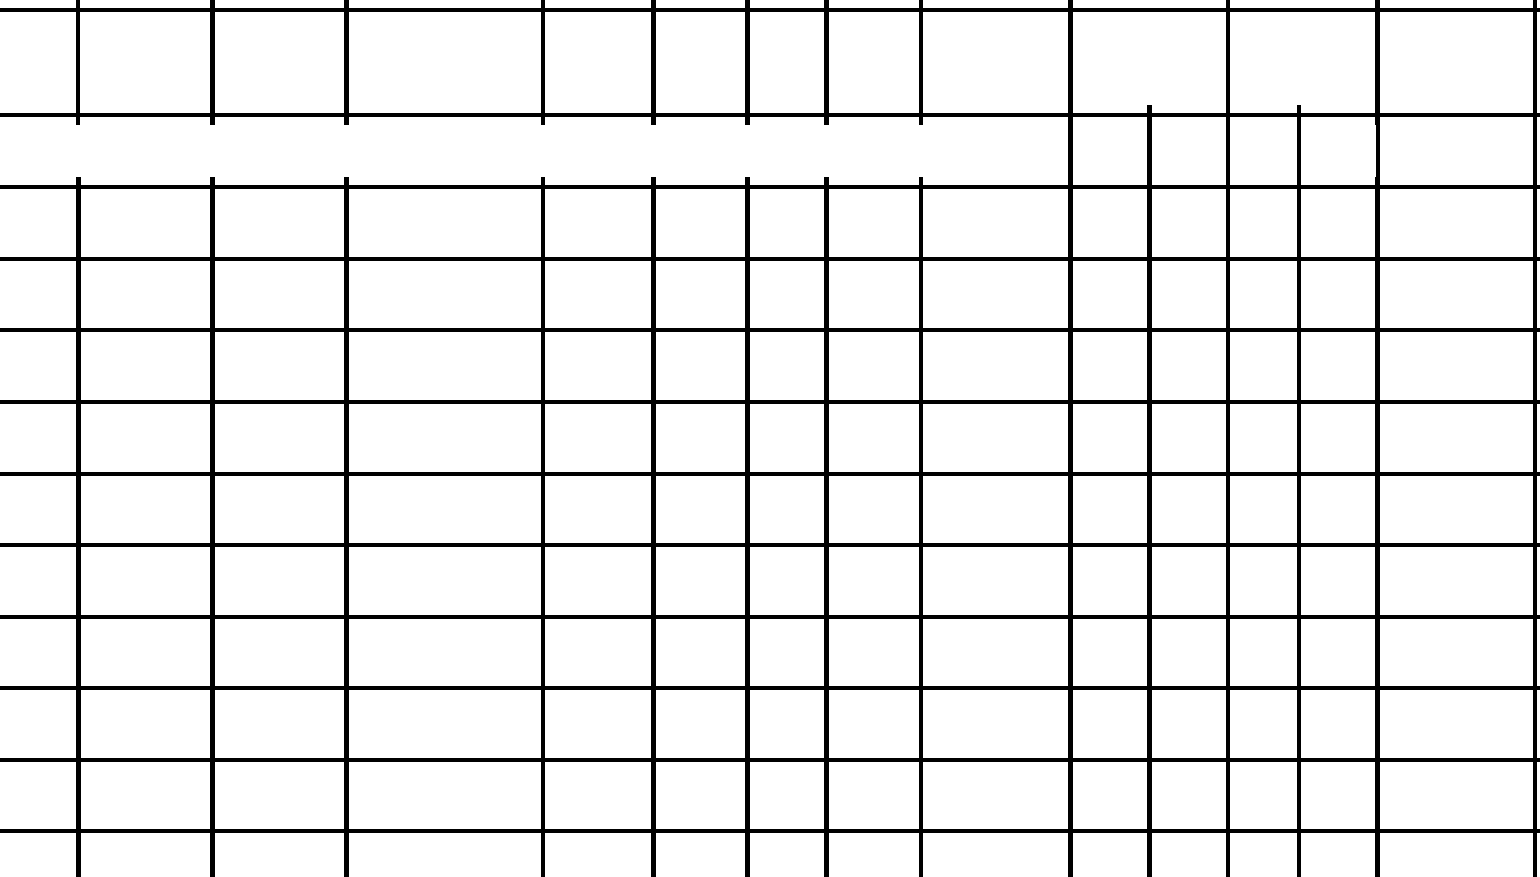

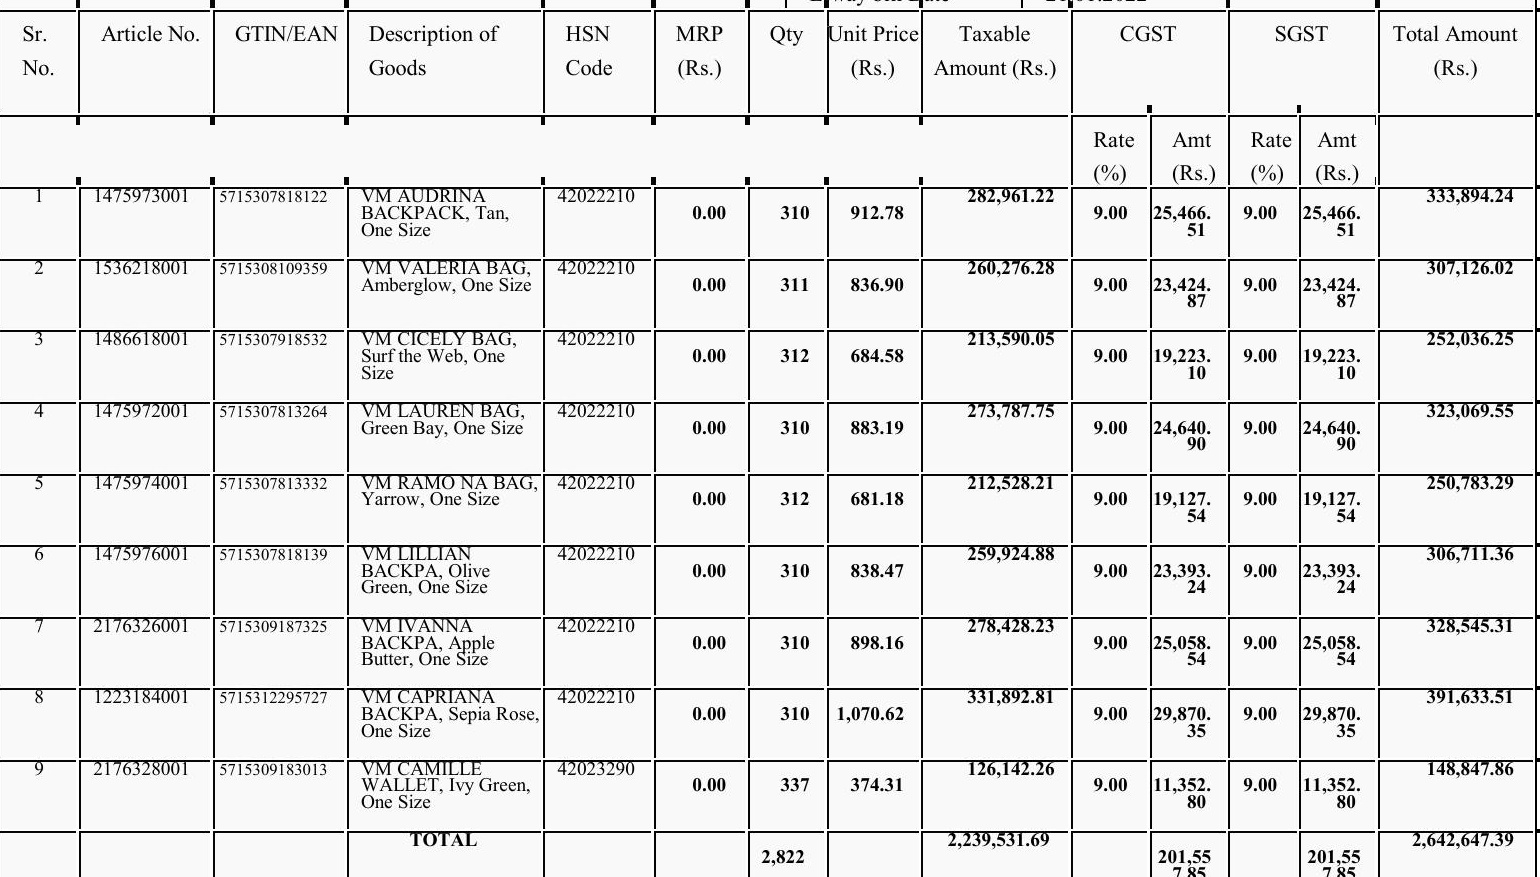

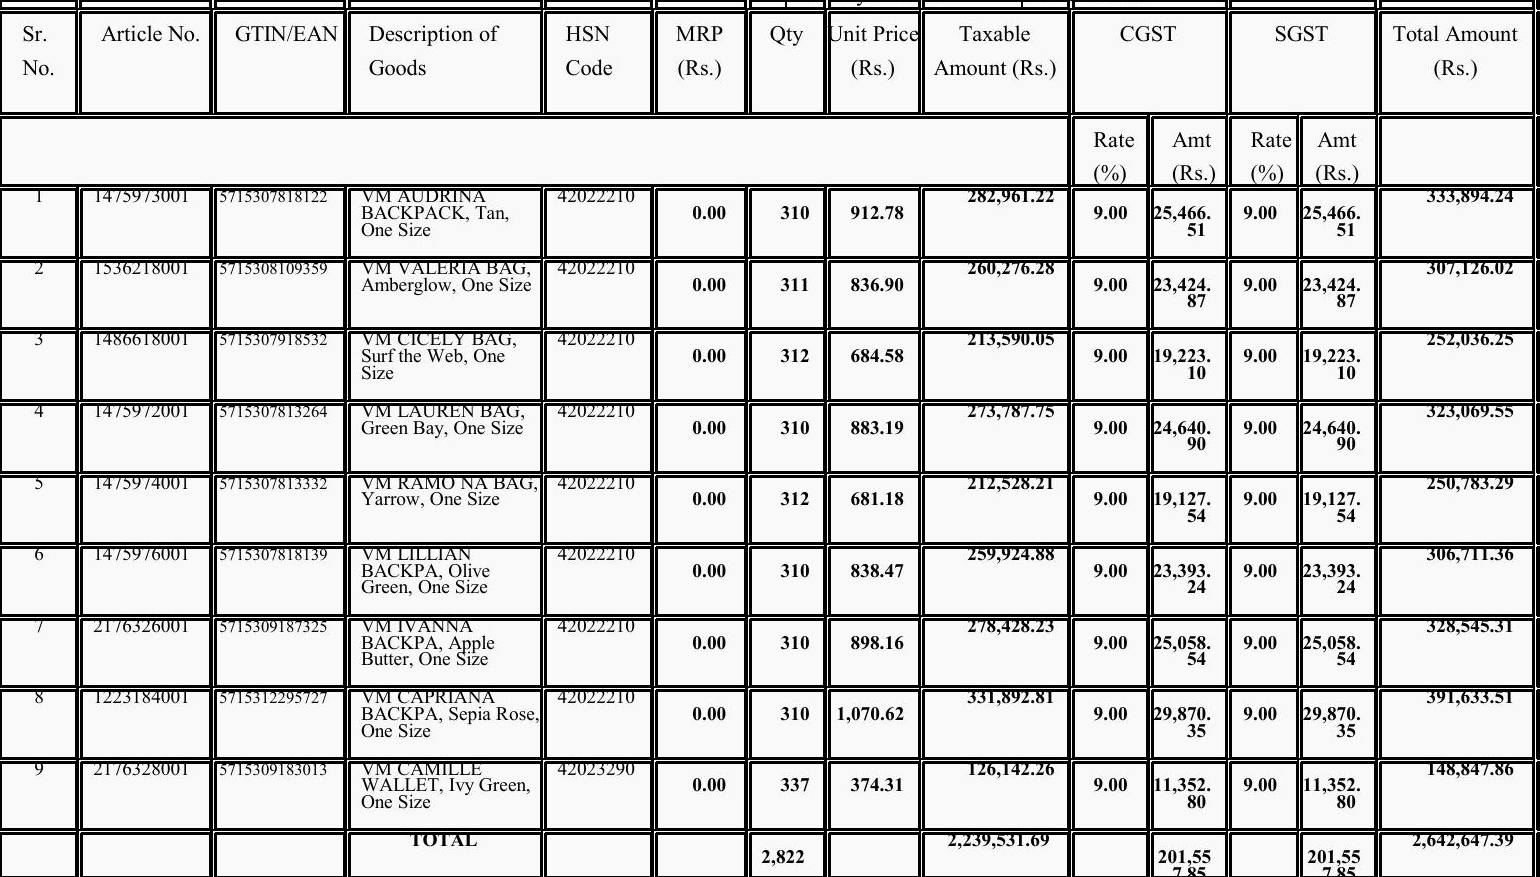

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
yo
        0  1               2  3                                   4  5   \
0      Sr.        Article No.                               GTIN/EAN      
1                                             \n\n             \n\n       
2                  14/99/5001                          5715307818122      
3                  1336218001                          5715308109359      
4                  14866130

In [ ]:
for img_fl in os.listdir(CROPPED_TABLE_FOLDER):
  bordered_table = cv2.imread(CROPPED_TABLE_FOLDER + img_fl)
  list_table_boxes = []

  table_list = [bordered_table]

  for table in table_list:
      finalboxes, output_img = tsrl.recognize_structure(table)
      list_table_boxes.append(finalboxes)
  out = output_to_csv(list_table_boxes[0], bordered_table)
  for col in out.columns:
    out[col] = out[col].replace(' ', np.nan)
  out = out.dropna(how = 'all', axis=1)
  out.to_csv(CROPPED_TABLE_CSV +img_fl.replace(".jpg",".csv"))

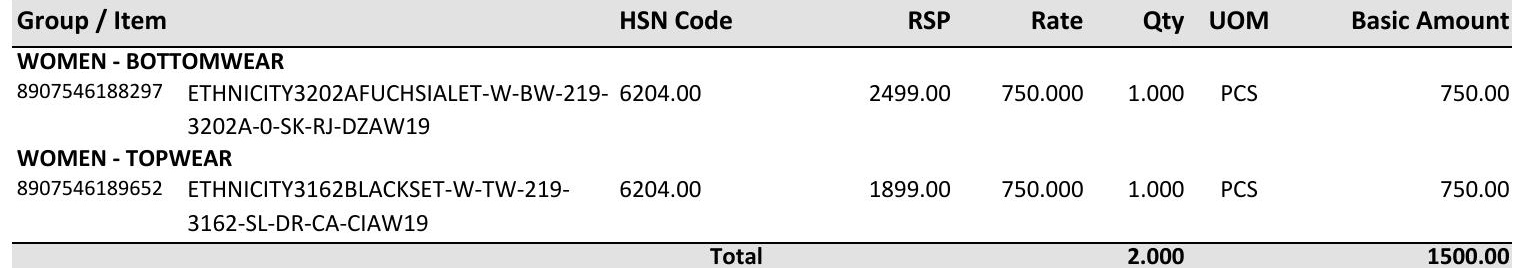

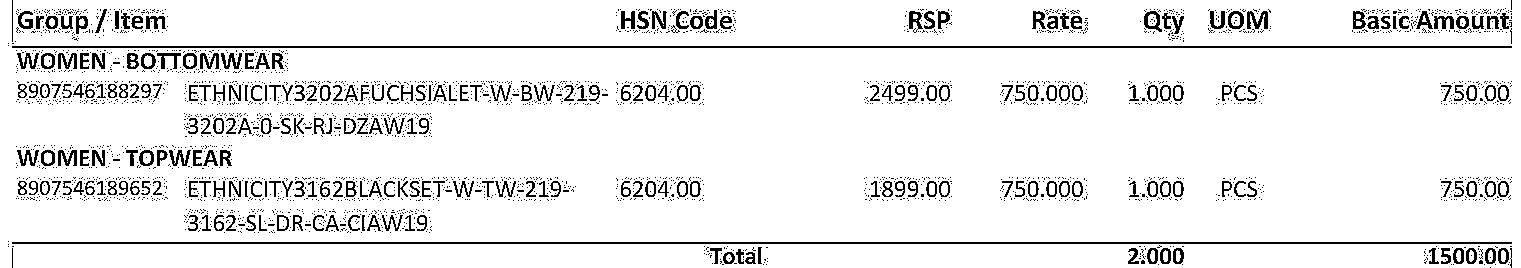

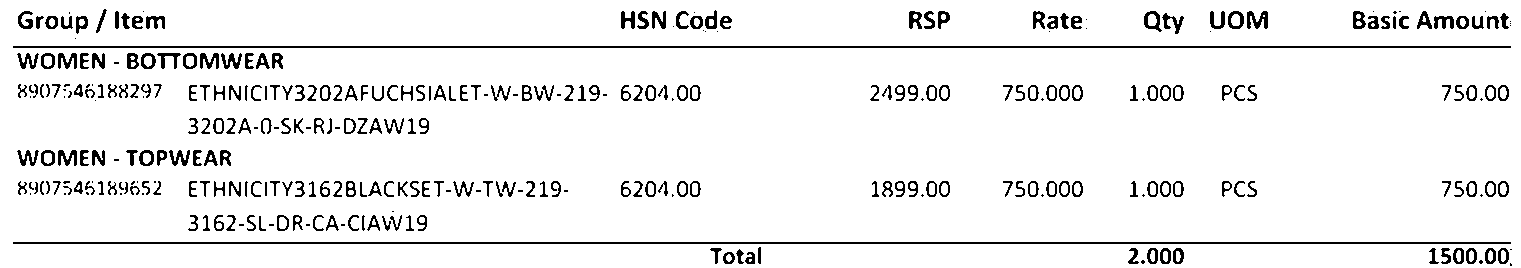

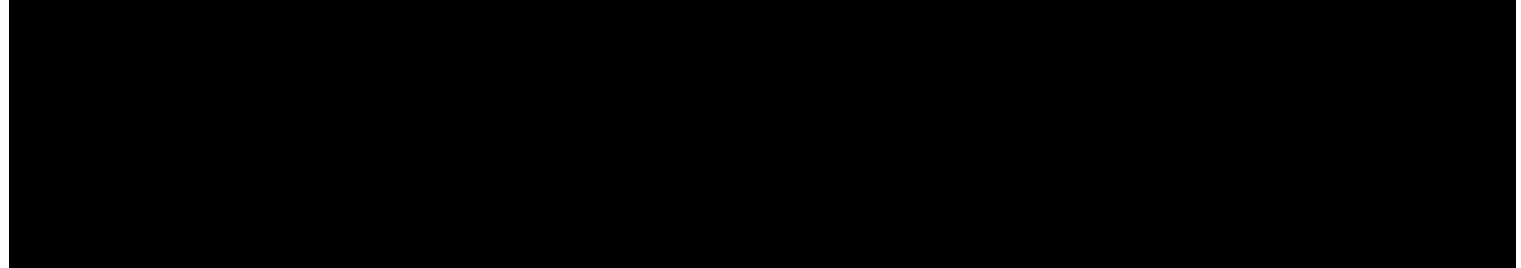

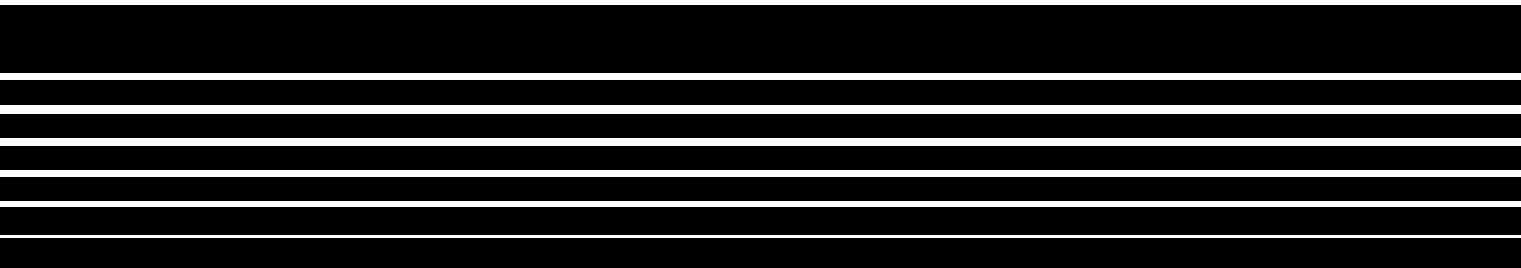

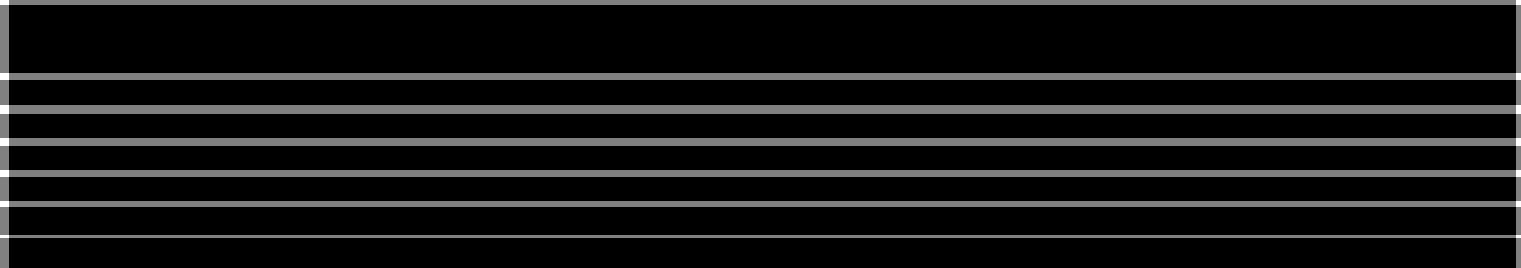

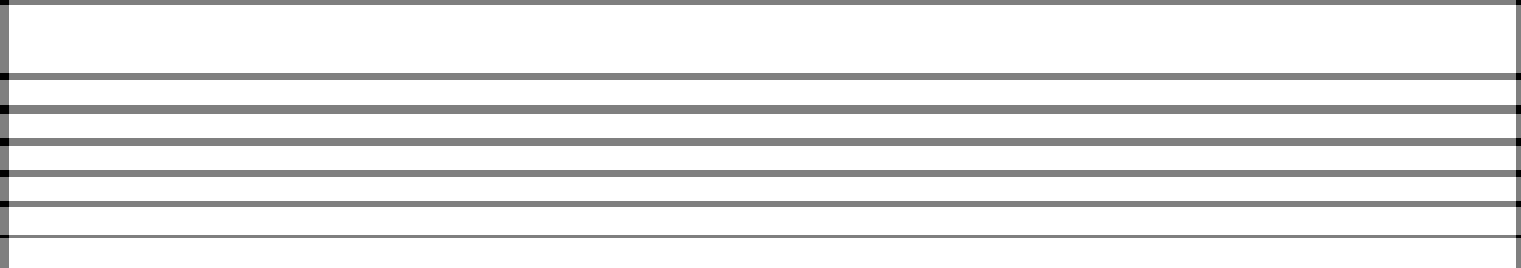

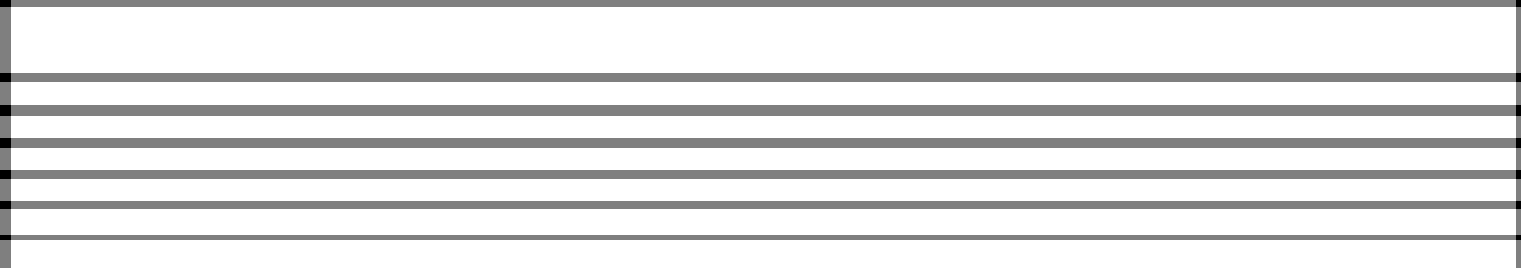

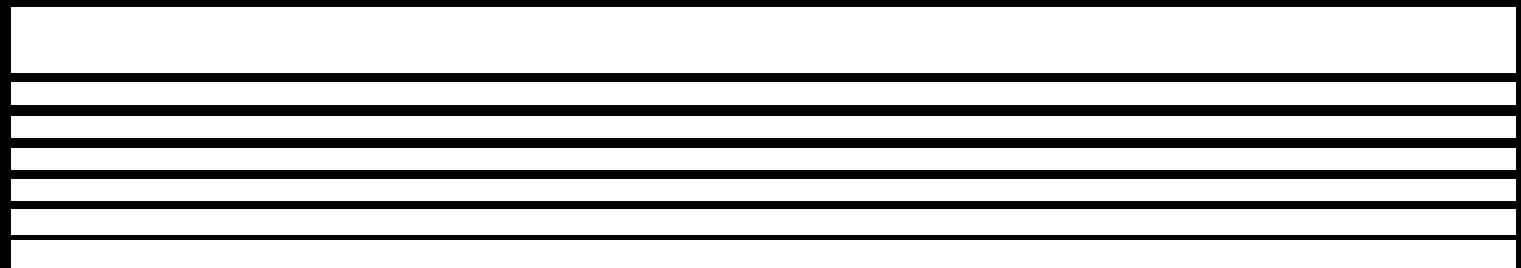

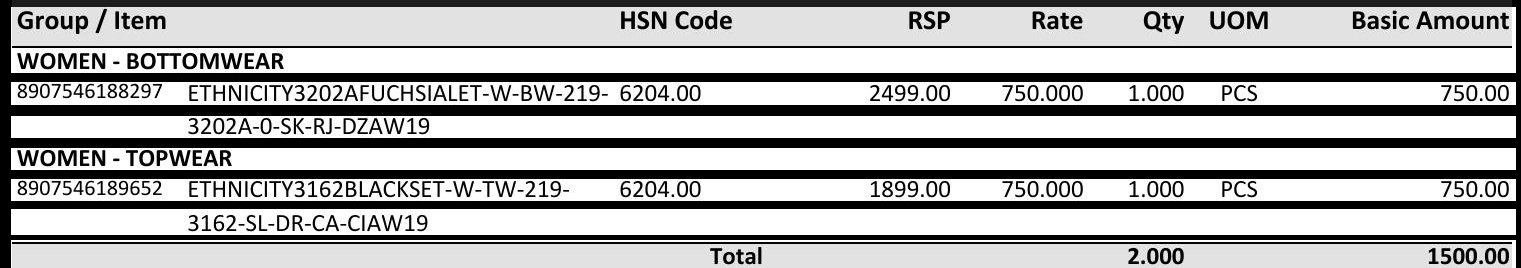

IndexError: ignored

In [26]:
for img_fl in os.listdir(CROPPED_TABLE_FOLDER):
  bordered_table = cv2.imread(CROPPED_TABLE_FOLDER + img_fl)
  list_table_boxes = []

  table_list = [bordered_table]

  for table in table_list:
      finalboxes, output_img = tsrwol.recognize_structure(table)
      list_table_boxes.append(finalboxes)
  out = output_to_csv(list_table_boxes[0], bordered_table)
  out.to_csv(CROPPED_TABLE_CSV +img_fl.replace(".jpg",".csv"))

In [ ]:
for img_fl in os.listdir(CROPPED_TABLE_FOLDER):
  bordered_table = cv2.imread(CROPPED_TABLE_FOLDER + img_fl)
  list_table_boxes = []

  table_list = [bordered_table]

  for table in table_list:
      finalboxes, output_img = tsrlwol.recognize_structure(table)
      list_table_boxes.append(finalboxes)
  out = output_to_csv(list_table_boxes[0], bordered_table)
  out.to_csv(CROPPED_TABLE_CSV +img_fl.replace(".jpg",".csv"))